# General Setup

In [134]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn
import torch.nn.functional as F
import torchvision
import pickle
import os
from pathlib import Path

import utils
from importlib import reload
reload(utils)
utils.set_namespace('04-resnet')

# Tiny Image Net Setup

In [4]:
train_dl, valid_dl, test_dl, classes = utils.make_tiny_imagenet_dataloaders()
len(train_dl.dataset), len(valid_dl.dataset), len(test_dl.dataset), len(classes)

(90000, 10000, 10000, 200)

# Tiny Image Net models

In [3]:
class ResNet18Transfer(nn.Module):
    def __init__(self):
        super().__init__()
        self.pretrained = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.DEFAULT).to(utils.device)
        self.pretrained.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(512, 200)
        )

    def forward(self, x):
        x = self.pretrained(x)
        return x

In [4]:
# utils.delete_model('resnet-18-transfer-02')
model1 = utils.register_model(
    'resnet-18-transfer-02', 
    ResNet18Transfer(), 
    'Fresh transfer learning from ResNet18 by overriding the last fc layer, batch size 64')
model1.setup(optimizer_cls=torch.optim.Adam, optimizer_args=dict(lr=1e-5), loss_fn_cls=torch.nn.CrossEntropyLoss)

Loaded model resnet-18-transfer-02 from checkpoint. epoch=14, step=19698. train_loss=1.4097, train_accuracy=0.6539, val_loss=1.9941, val_accuracy=0.5214
resnet-18-transfer-02 registered.
Trainable params: 11.3 M. Untrainable params: 0.00. Buffers: 12.0 k.
Skipped compilation


{'model_name': 'resnet-18-transfer-02',
 'description': 'Fresh transfer learning from ResNet18 by overriding the last fc layer, batch size 64',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.adam.Adam'>,
 'optimizer_args': {'lr': 1e-05},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': None,
 'epoch': 14,
 'step': 19698,
 'metrics': {'train_loss': 1.4097231893751356,
             'train_accuracy': 0.6539,
             'val_loss': 1.9940666374206544,
             'val_accuracy': 0.5214}}

Initial val_loss: 5.9215


100%|██████████| 157/157 [00:01<00:00, 91.02it/s] 


Epoch 1/1000: train_loss=5.3889, train_accuracy=0.0295, val_loss=4.4145, val_accuracy=0.1478
Saved checkpoint for resnet-18-transfer-02. epoch=1, step=1407. train_loss=5.3889, train_accuracy=0.0295, val_loss=4.4145, val_accuracy=0.1478


100%|██████████| 157/157 [00:01<00:00, 93.96it/s] 


Epoch 2/1000: train_loss=4.2590, train_accuracy=0.1359, val_loss=3.4682, val_accuracy=0.2830
Saved checkpoint for resnet-18-transfer-02. epoch=2, step=2814. train_loss=4.2590, train_accuracy=0.1359, val_loss=3.4682, val_accuracy=0.2830


100%|██████████| 157/157 [00:01<00:00, 88.81it/s]


Epoch 3/1000: train_loss=3.5215, train_accuracy=0.2446, val_loss=2.9550, val_accuracy=0.3626
Saved checkpoint for resnet-18-transfer-02. epoch=3, step=4221. train_loss=3.5215, train_accuracy=0.2446, val_loss=2.9550, val_accuracy=0.3626


100%|██████████| 157/157 [00:01<00:00, 91.79it/s] 


Epoch 4/1000: train_loss=3.0543, train_accuracy=0.3219, val_loss=2.6366, val_accuracy=0.4076
Saved checkpoint for resnet-18-transfer-02. epoch=4, step=5628. train_loss=3.0543, train_accuracy=0.3219, val_loss=2.6366, val_accuracy=0.4076


100%|██████████| 157/157 [00:01<00:00, 92.23it/s] 


Epoch 5/1000: train_loss=2.7321, train_accuracy=0.3784, val_loss=2.4481, val_accuracy=0.4367
Saved checkpoint for resnet-18-transfer-02. epoch=5, step=7035. train_loss=2.7321, train_accuracy=0.3784, val_loss=2.4481, val_accuracy=0.4367


100%|██████████| 157/157 [00:01<00:00, 89.81it/s] 


Epoch 6/1000: train_loss=2.4881, train_accuracy=0.4241, val_loss=2.3104, val_accuracy=0.4619
Saved checkpoint for resnet-18-transfer-02. epoch=6, step=8442. train_loss=2.4881, train_accuracy=0.4241, val_loss=2.3104, val_accuracy=0.4619


100%|██████████| 157/157 [00:01<00:00, 88.20it/s] 


Epoch 7/1000: train_loss=2.2917, train_accuracy=0.4645, val_loss=2.2187, val_accuracy=0.4804
Saved checkpoint for resnet-18-transfer-02. epoch=7, step=9849. train_loss=2.2917, train_accuracy=0.4645, val_loss=2.2187, val_accuracy=0.4804


100%|██████████| 157/157 [00:01<00:00, 87.36it/s] 


Epoch 8/1000: train_loss=2.1263, train_accuracy=0.4993, val_loss=2.1484, val_accuracy=0.4880
Saved checkpoint for resnet-18-transfer-02. epoch=8, step=11256. train_loss=2.1263, train_accuracy=0.4993, val_loss=2.1484, val_accuracy=0.4880


100%|██████████| 157/157 [00:01<00:00, 90.00it/s] 


Epoch 9/1000: train_loss=1.9798, train_accuracy=0.5288, val_loss=2.1039, val_accuracy=0.4973
Saved checkpoint for resnet-18-transfer-02. epoch=9, step=12663. train_loss=1.9798, train_accuracy=0.5288, val_loss=2.1039, val_accuracy=0.4973


100%|██████████| 157/157 [00:01<00:00, 90.29it/s] 


Epoch 10/1000: train_loss=1.8534, train_accuracy=0.5544, val_loss=2.0638, val_accuracy=0.5050
Saved checkpoint for resnet-18-transfer-02. epoch=10, step=14070. train_loss=1.8534, train_accuracy=0.5544, val_loss=2.0638, val_accuracy=0.5050


100%|██████████| 157/157 [00:01<00:00, 91.23it/s] 


Epoch 11/1000: train_loss=1.7318, train_accuracy=0.5811, val_loss=2.0416, val_accuracy=0.5102
Saved checkpoint for resnet-18-transfer-02. epoch=11, step=15477. train_loss=1.7318, train_accuracy=0.5811, val_loss=2.0416, val_accuracy=0.5102


100%|██████████| 157/157 [00:01<00:00, 89.32it/s] 


Epoch 12/1000: train_loss=1.6170, train_accuracy=0.6085, val_loss=2.0201, val_accuracy=0.5166
Saved checkpoint for resnet-18-transfer-02. epoch=12, step=16884. train_loss=1.6170, train_accuracy=0.6085, val_loss=2.0201, val_accuracy=0.5166


100%|██████████| 157/157 [00:01<00:00, 89.12it/s] 


Epoch 13/1000: train_loss=1.5114, train_accuracy=0.6328, val_loss=2.0047, val_accuracy=0.5196
Saved checkpoint for resnet-18-transfer-02. epoch=13, step=18291. train_loss=1.5114, train_accuracy=0.6328, val_loss=2.0047, val_accuracy=0.5196


100%|██████████| 157/157 [00:02<00:00, 72.21it/s]


Epoch 14/1000: train_loss=1.4097, train_accuracy=0.6539, val_loss=1.9941, val_accuracy=0.5214
Saved checkpoint for resnet-18-transfer-02. epoch=14, step=19698. train_loss=1.4097, train_accuracy=0.6539, val_loss=1.9941, val_accuracy=0.5214


100%|██████████| 157/157 [00:01<00:00, 88.42it/s] 


Epoch 15/1000: train_loss=1.3121, train_accuracy=0.6777, val_loss=2.0054, val_accuracy=0.5217


100%|██████████| 157/157 [00:01<00:00, 87.52it/s] 


Epoch 16/1000: train_loss=1.2181, train_accuracy=0.7006, val_loss=2.0024, val_accuracy=0.5250


100%|██████████| 157/157 [00:01<00:00, 95.26it/s] 


Epoch 17/1000: train_loss=1.1340, train_accuracy=0.7214, val_loss=2.0072, val_accuracy=0.5217


100%|██████████| 157/157 [00:01<00:00, 92.16it/s] 


Epoch 18/1000: train_loss=1.0443, train_accuracy=0.7442, val_loss=2.0086, val_accuracy=0.5222
Loaded model resnet-18-transfer-02 from checkpoint. epoch=14, step=19698. train_loss=1.4097, train_accuracy=0.6539, val_loss=1.9941, val_accuracy=0.5214


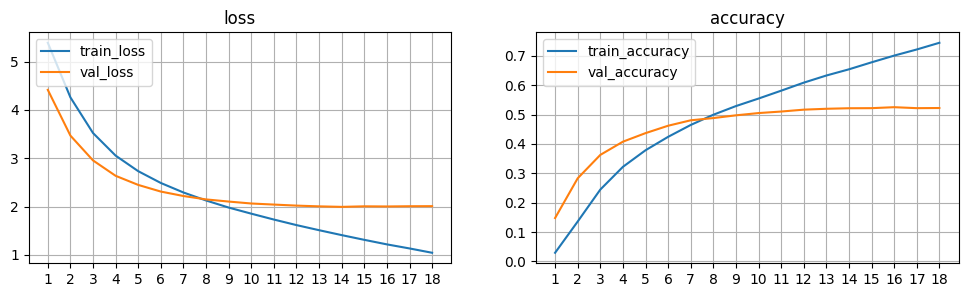

In [44]:
hist = model1.train(train_dl, valid_dl, epochs=1000, patience=4, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [152]:
model1.load_checkpoint()
model1.evaluate(test_dl, metrics=[utils.metric_accuracy])

Loaded model resnet-18-transfer-02 from checkpoint. epoch=14, step=19698. train_loss=1.4097, train_accuracy=0.6539, val_loss=1.9941, val_accuracy=0.5214


{'loss': 1.992439828491211, 'accuracy': 0.522}

In [149]:
def mc_accuracy(model, dataloader, n_samples=10):
    model.eval()
    def enable_dropout(m):
        if type(m) == torch.nn.Dropout:
            m.train()
        if type(m) == torch.nn.BatchNorm2d:
            m.train()

    model.apply(enable_dropout)
    with torch.no_grad():
        correct = 0
        total = 0
        for x, y_true in dataloader:
            x, y_true = x.to(utils.device), y_true.to(utils.device)
            predictions = []
            for _ in range(n_samples):
                y_pred_mc = model(x).argmax(dim=1)
                predictions.append(y_pred_mc)
            predictions = torch.stack(predictions, dim=1)
            y_pred = predictions.mode(dim=1).values
            correct += (y_pred == y_true).sum().item()
            total += y_pred.size(0)
        model.eval()
        return correct / total

    
mc_accuracy(model1.model, test_dl, 10)

0.0524

In [49]:
print(len(train_dl), len(train_dl.dataset), next(iter(train_dl))[0].shape, next(iter(train_dl))[1].shape)
print(len(valid_dl), len(valid_dl.dataset), next(iter(valid_dl))[0].shape, next(iter(valid_dl))[1].shape)
print(len(test_dl), len(test_dl.dataset), next(iter(test_dl))[0].shape, next(iter(valid_dl))[1].shape)

1407 90000 torch.Size([64, 3, 64, 64]) torch.Size([64])
157 10000 torch.Size([64, 3, 64, 64]) torch.Size([64])
157 10000 torch.Size([64, 3, 64, 64]) torch.Size([64])


Best loss: 1.9436


100%|██████████| 157/157 [00:01<00:00, 90.32it/s] 


Epoch 1/1000: train_loss=0.9958, train_accuracy=0.7613, val_loss=1.8266, val_accuracy=0.5504
Saved checkpoint for resnet-18-transfer-01. epoch=3, step=4221. train_loss=0.9958, train_accuracy=0.7613, val_loss=1.8266, val_accuracy=0.5504


100%|██████████| 157/157 [00:01<00:00, 90.79it/s] 


Epoch 2/1000: train_loss=0.8289, train_accuracy=0.8053, val_loss=1.8345, val_accuracy=0.5484


100%|██████████| 157/157 [00:01<00:00, 85.75it/s]


Epoch 3/1000: train_loss=0.7195, train_accuracy=0.8356, val_loss=1.8377, val_accuracy=0.5520


100%|██████████| 157/157 [00:01<00:00, 85.45it/s]


Epoch 4/1000: train_loss=0.6249, train_accuracy=0.8630, val_loss=1.8620, val_accuracy=0.5475


100%|██████████| 157/157 [00:01<00:00, 88.30it/s]


Epoch 5/1000: train_loss=0.5402, train_accuracy=0.8870, val_loss=1.8862, val_accuracy=0.5464
Loaded model resnet-18-transfer-01 from checkpoint. epoch=3, step=4221. train_loss=0.9958, train_accuracy=0.7613, val_loss=1.8266, val_accuracy=0.5504


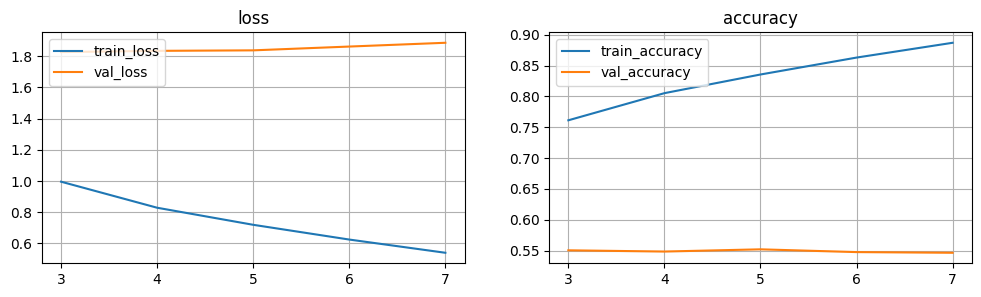

In [20]:
model1.compile(optimizer_cls=torch.optim.Adam, optimizier_args=dict(lr=1e-5, weight_decay=5e-4), loss_fn_cls=torch.nn.CrossEntropyLoss)
hist = model1.train(train_dl, valid_dl, epochs=1000, patience=4, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [22]:
model1.evaluate(test_dl, metrics=[utils.metric_accuracy])

{'loss': 1.8424995349884032, 'accuracy': 0.5477}

---

tensor([0])
('n01443537', 'goldfish, Carassius auratus')


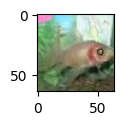

In [14]:
x, y = next(iter(valid_dl))
x, y = x[:1], y[:1]

fig, ax = plt.subplots(figsize=(1, 1))
ax.imshow(np.transpose(x.squeeze(), [1, 2, 0]))
print(y)
print(classes[y])

In [15]:
model1.model(x.to(utils.device)).topk(5)

torch.return_types.topk(
values=tensor([[3.4151, 3.2630, 2.5056, 1.8423, 1.5935]], device='cuda:0',
       grad_fn=<TopkBackward0>),
indices=tensor([[43,  0, 42, 28, 14]], device='cuda:0'))

In [16]:
train_dl, valid_dl, test_dl, classes = utils.make_cifar_dataloaders()

In [179]:
class ResNet18Transfer2(nn.Module):
    def __init__(self):
        super().__init__()
        self.pretrained = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.DEFAULT).to(utils.device)
        for mod in self.pretrained.parameters():
            mod.requires_grad = False
        self.pretrained.fc = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Linear(256, 200)
        )

    def forward(self, x):
        x = self.pretrained(x)
        return x

In [194]:
model2 = utils.register_model(
    'resnet-18-transfer-03',
    ResNet18Transfer2(),
    'Attempt to lock the pretraining weights all together and just trin the final classifier'
).setup(
    loss_fn_cls=nn.CrossEntropyLoss, 
    optimizer_cls=torch.optim.Adam, 
    optimizer_args=dict(lr=1e-4, weight_decay=5e-4)
)

Skipping load: checkpoint file does not exist
resnet-18-transfer-03 registered.
Trainable params: 183 k. Untrainable params: 11.2 M. Buffers: 12.0 k.


In [195]:
hist = model2.train(train_dl, valid_dl, epochs=1000, patience=4, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

Initial val_loss: 5.4134


100%|██████████| 157/157 [00:01<00:00, 93.22it/s] 


Epoch 1/1000: train_loss=4.3381, train_accuracy=0.1499, val_loss=3.5361, val_accuracy=0.2508
Saved checkpoint for resnet-18-transfer-03. epoch=1, step=1407. train_loss=4.3381, train_accuracy=0.1499, val_loss=3.5361, val_accuracy=0.2508


100%|██████████| 157/157 [00:01<00:00, 91.05it/s] 


Epoch 2/1000: train_loss=3.3689, train_accuracy=0.2758, val_loss=3.2183, val_accuracy=0.2894
Saved checkpoint for resnet-18-transfer-03. epoch=2, step=2814. train_loss=3.3689, train_accuracy=0.2758, val_loss=3.2183, val_accuracy=0.2894


100%|██████████| 157/157 [00:01<00:00, 91.11it/s] 


Epoch 3/1000: train_loss=3.1483, train_accuracy=0.3033, val_loss=3.1496, val_accuracy=0.3042
Saved checkpoint for resnet-18-transfer-03. epoch=3, step=4221. train_loss=3.1483, train_accuracy=0.3033, val_loss=3.1496, val_accuracy=0.3042


100%|██████████| 157/157 [00:01<00:00, 88.90it/s]


Epoch 4/1000: train_loss=3.0375, train_accuracy=0.3235, val_loss=3.0693, val_accuracy=0.3134
Saved checkpoint for resnet-18-transfer-03. epoch=4, step=5628. train_loss=3.0375, train_accuracy=0.3235, val_loss=3.0693, val_accuracy=0.3134


100%|██████████| 157/157 [00:01<00:00, 88.34it/s]


Epoch 5/1000: train_loss=2.9655, train_accuracy=0.3325, val_loss=3.0064, val_accuracy=0.3270
Saved checkpoint for resnet-18-transfer-03. epoch=5, step=7035. train_loss=2.9655, train_accuracy=0.3325, val_loss=3.0064, val_accuracy=0.3270


100%|██████████| 157/157 [00:01<00:00, 91.23it/s] 


Epoch 6/1000: train_loss=2.9165, train_accuracy=0.3426, val_loss=3.0026, val_accuracy=0.3314
Saved checkpoint for resnet-18-transfer-03. epoch=6, step=8442. train_loss=2.9165, train_accuracy=0.3426, val_loss=3.0026, val_accuracy=0.3314


100%|██████████| 157/157 [00:01<00:00, 89.12it/s]


Epoch 7/1000: train_loss=2.8712, train_accuracy=0.3502, val_loss=2.9626, val_accuracy=0.3294
Saved checkpoint for resnet-18-transfer-03. epoch=7, step=9849. train_loss=2.8712, train_accuracy=0.3502, val_loss=2.9626, val_accuracy=0.3294


100%|██████████| 157/157 [00:01<00:00, 90.39it/s]


Epoch 8/1000: train_loss=2.8379, train_accuracy=0.3561, val_loss=2.9564, val_accuracy=0.3317
Saved checkpoint for resnet-18-transfer-03. epoch=8, step=11256. train_loss=2.8379, train_accuracy=0.3561, val_loss=2.9564, val_accuracy=0.3317


100%|██████████| 157/157 [00:01<00:00, 89.76it/s] 


Epoch 9/1000: train_loss=2.8083, train_accuracy=0.3610, val_loss=2.9523, val_accuracy=0.3345
Saved checkpoint for resnet-18-transfer-03. epoch=9, step=12663. train_loss=2.8083, train_accuracy=0.3610, val_loss=2.9523, val_accuracy=0.3345


100%|██████████| 157/157 [00:01<00:00, 88.67it/s]


Epoch 10/1000: train_loss=2.7808, train_accuracy=0.3657, val_loss=2.9360, val_accuracy=0.3360
Saved checkpoint for resnet-18-transfer-03. epoch=10, step=14070. train_loss=2.7808, train_accuracy=0.3657, val_loss=2.9360, val_accuracy=0.3360


100%|██████████| 157/157 [00:01<00:00, 90.92it/s] 


Epoch 11/1000: train_loss=2.7608, train_accuracy=0.3684, val_loss=2.9249, val_accuracy=0.3379
Saved checkpoint for resnet-18-transfer-03. epoch=11, step=15477. train_loss=2.7608, train_accuracy=0.3684, val_loss=2.9249, val_accuracy=0.3379


100%|██████████| 157/157 [00:01<00:00, 89.20it/s] 


Epoch 12/1000: train_loss=2.7414, train_accuracy=0.3717, val_loss=2.9046, val_accuracy=0.3413
Saved checkpoint for resnet-18-transfer-03. epoch=12, step=16884. train_loss=2.7414, train_accuracy=0.3717, val_loss=2.9046, val_accuracy=0.3413


100%|██████████| 157/157 [00:01<00:00, 89.36it/s]


Epoch 13/1000: train_loss=2.7193, train_accuracy=0.3759, val_loss=2.9097, val_accuracy=0.3418


100%|██████████| 157/157 [00:01<00:00, 90.94it/s]


Epoch 14/1000: train_loss=2.7044, train_accuracy=0.3795, val_loss=2.9139, val_accuracy=0.3419


100%|██████████| 157/157 [00:01<00:00, 88.62it/s] 


Epoch 15/1000: train_loss=2.6920, train_accuracy=0.3805, val_loss=2.9264, val_accuracy=0.3403


100%|██████████| 157/157 [00:01<00:00, 91.55it/s] 


Epoch 16/1000: train_loss=2.6709, train_accuracy=0.3836, val_loss=2.8966, val_accuracy=0.3447
Saved checkpoint for resnet-18-transfer-03. epoch=16, step=22512. train_loss=2.6709, train_accuracy=0.3836, val_loss=2.8966, val_accuracy=0.3447


100%|██████████| 157/157 [00:01<00:00, 87.74it/s] 


Epoch 17/1000: train_loss=2.6613, train_accuracy=0.3852, val_loss=2.8964, val_accuracy=0.3457
Saved checkpoint for resnet-18-transfer-03. epoch=17, step=23919. train_loss=2.6613, train_accuracy=0.3852, val_loss=2.8964, val_accuracy=0.3457


100%|██████████| 157/157 [00:01<00:00, 86.72it/s]


Epoch 18/1000: train_loss=2.6480, train_accuracy=0.3889, val_loss=2.9030, val_accuracy=0.3469


100%|██████████| 157/157 [00:01<00:00, 89.75it/s] 


Epoch 19/1000: train_loss=2.6376, train_accuracy=0.3877, val_loss=2.9047, val_accuracy=0.3429


100%|██████████| 157/157 [00:01<00:00, 91.84it/s] 


Epoch 20/1000: train_loss=2.6238, train_accuracy=0.3906, val_loss=2.8830, val_accuracy=0.3453
Saved checkpoint for resnet-18-transfer-03. epoch=20, step=28140. train_loss=2.6238, train_accuracy=0.3906, val_loss=2.8830, val_accuracy=0.3453


100%|██████████| 157/157 [00:01<00:00, 80.72it/s]


Epoch 21/1000: train_loss=2.6124, train_accuracy=0.3934, val_loss=2.8887, val_accuracy=0.3488


100%|██████████| 157/157 [00:01<00:00, 81.37it/s]


Epoch 22/1000: train_loss=2.6012, train_accuracy=0.3955, val_loss=2.8729, val_accuracy=0.3521
Saved checkpoint for resnet-18-transfer-03. epoch=22, step=30954. train_loss=2.6012, train_accuracy=0.3955, val_loss=2.8729, val_accuracy=0.3521


100%|██████████| 157/157 [00:01<00:00, 80.94it/s]


Epoch 23/1000: train_loss=2.5915, train_accuracy=0.3957, val_loss=2.8828, val_accuracy=0.3481


100%|██████████| 157/157 [00:01<00:00, 80.38it/s]


Epoch 24/1000: train_loss=2.5839, train_accuracy=0.3984, val_loss=2.8981, val_accuracy=0.3439


100%|██████████| 157/157 [00:01<00:00, 80.82it/s]


Epoch 25/1000: train_loss=2.5728, train_accuracy=0.4021, val_loss=2.9013, val_accuracy=0.3465


100%|██████████| 157/157 [00:01<00:00, 82.05it/s]


Epoch 26/1000: train_loss=2.5643, train_accuracy=0.4004, val_loss=2.8852, val_accuracy=0.3482
Loaded model resnet-18-transfer-03 from checkpoint. epoch=22, step=30954. train_loss=2.6012, train_accuracy=0.3955, val_loss=2.8729, val_accuracy=0.3521


defaultdict(<function utils.ModelLifecycle.train.<locals>.<lambda>()>,
            {'epoch': [1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19,
              20,
              21,
              22,
              23,
              24,
              25,
              26],
             'train_loss': [4.338131961356269,
              3.3689190430111355,
              3.1483296953413222,
              3.037520084762573,
              2.9654608659532333,
              2.9164591538323297,
              2.871222444491916,
              2.837895664638943,
              2.8083410218556724,
              2.780778081554837,
              2.76084144299825,
              2.7414157112969293,
              2.719252714496189,
            

In [199]:
for param in model2.model.parameters():
    param.requires_grad = True

model2.print_params(False)

Trainable params: 11.4 M. Untrainable params: 0.00. Buffers: 12.0 k.


Initial val_loss: 2.8729


100%|██████████| 157/157 [00:01<00:00, 89.95it/s] 


Epoch 1/1000: train_loss=2.2965, train_accuracy=0.4484, val_loss=2.3697, val_accuracy=0.4327
Saved checkpoint for resnet-18-transfer-03. epoch=23, step=32361. train_loss=2.2965, train_accuracy=0.4484, val_loss=2.3697, val_accuracy=0.4327


100%|██████████| 157/157 [00:01<00:00, 91.41it/s] 


Epoch 2/1000: train_loss=1.9602, train_accuracy=0.5145, val_loss=2.2515, val_accuracy=0.4543
Saved checkpoint for resnet-18-transfer-03. epoch=24, step=33768. train_loss=1.9602, train_accuracy=0.5145, val_loss=2.2515, val_accuracy=0.4543


100%|██████████| 157/157 [00:01<00:00, 89.68it/s] 


Epoch 3/1000: train_loss=1.7432, train_accuracy=0.5621, val_loss=2.1761, val_accuracy=0.4734
Saved checkpoint for resnet-18-transfer-03. epoch=25, step=35175. train_loss=1.7432, train_accuracy=0.5621, val_loss=2.1761, val_accuracy=0.4734


100%|██████████| 157/157 [00:01<00:00, 88.86it/s]


Epoch 4/1000: train_loss=1.5664, train_accuracy=0.6022, val_loss=2.1414, val_accuracy=0.4815
Saved checkpoint for resnet-18-transfer-03. epoch=26, step=36582. train_loss=1.5664, train_accuracy=0.6022, val_loss=2.1414, val_accuracy=0.4815


100%|██████████| 157/157 [00:01<00:00, 88.48it/s]


Epoch 5/1000: train_loss=1.4053, train_accuracy=0.6413, val_loss=2.1152, val_accuracy=0.4905
Saved checkpoint for resnet-18-transfer-03. epoch=27, step=37989. train_loss=1.4053, train_accuracy=0.6413, val_loss=2.1152, val_accuracy=0.4905


100%|██████████| 157/157 [00:01<00:00, 87.12it/s]


Epoch 6/1000: train_loss=1.2609, train_accuracy=0.6772, val_loss=2.1075, val_accuracy=0.4941
Saved checkpoint for resnet-18-transfer-03. epoch=28, step=39396. train_loss=1.2609, train_accuracy=0.6772, val_loss=2.1075, val_accuracy=0.4941


100%|██████████| 157/157 [00:01<00:00, 89.69it/s] 


Epoch 7/1000: train_loss=1.1274, train_accuracy=0.7142, val_loss=2.1128, val_accuracy=0.4972


100%|██████████| 157/157 [00:01<00:00, 90.26it/s] 


Epoch 8/1000: train_loss=1.0016, train_accuracy=0.7473, val_loss=2.1160, val_accuracy=0.4980


100%|██████████| 157/157 [00:01<00:00, 86.67it/s]


Epoch 9/1000: train_loss=0.8865, train_accuracy=0.7805, val_loss=2.1356, val_accuracy=0.4961


100%|██████████| 157/157 [00:01<00:00, 85.98it/s]


Epoch 10/1000: train_loss=0.7788, train_accuracy=0.8106, val_loss=2.1590, val_accuracy=0.4973
Loaded model resnet-18-transfer-03 from checkpoint. epoch=28, step=39396. train_loss=1.2609, train_accuracy=0.6772, val_loss=2.1075, val_accuracy=0.4941


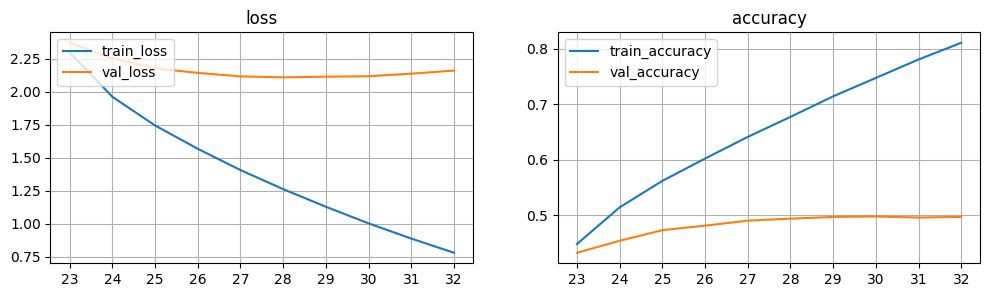

In [200]:
model2.compile(
    loss_fn_cls=nn.CrossEntropyLoss, 
    optimizer_cls=torch.optim.Adam, 
    optimizer_args=dict(lr=1e-5, weight_decay=5e-4)
)
hist = model2.train(train_dl, valid_dl, epochs=1000, patience=4, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [9]:
train_dl, valid_dl, test_dl, classes = utils.make_cifar_dataloaders()

Files already downloaded and verified
Files already downloaded and verified


TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [249]:
class ResNet18Transfer3(nn.Module):
    def __init__(self):
        super().__init__()
        self.pretrained = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.DEFAULT).to(utils.device)
        self.pretrained.fc = nn.Linear(512, 100)

    def forward(self, x):
        x = self.pretrained(x)
        return x

In [250]:
# utils.delete_model('resnet-18-transfer-02')
model4 = utils.register_model(
    'resnet-18-transfer-04', 
    ResNet18Transfer3(), 
    'CIFAR-100: Fresh transfer learning from ResNet18 by overriding the last fc layer, batch size 64')
model4.setup(optimizer_cls=torch.optim.Adam, optimizer_args=dict(lr=1e-5), loss_fn_cls=torch.nn.CrossEntropyLoss)

Skipping load: checkpoint file does not exist
resnet-18-transfer-04 registered.
Trainable params: 11.2 M. Untrainable params: 0.00. Buffers: 6.00 k.
Compiled


{'model_name': 'resnet-18-transfer-04',
 'description': 'CIFAR-100: Fresh transfer learning from ResNet18 by overriding the last fc layer, batch '
                'size 64',
 'persisted': False,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.adam.Adam'>,
 'optimizer_args': {'lr': 1e-05},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': {},
 'epoch': 0,
 'step': 0,
 'metrics': {}}

Initial val_loss: 4.6850


100%|██████████| 79/79 [00:00<00:00, 83.71it/s] 


Epoch 1/1000: train_loss=4.4102, train_accuracy=0.0666, val_loss=3.9414, val_accuracy=0.1440
Saved checkpoint for resnet-18-transfer-04. epoch=1, step=704. train_loss=4.4102, train_accuracy=0.0666, val_loss=3.9414, val_accuracy=0.1440


100%|██████████| 79/79 [00:00<00:00, 88.53it/s] 


Epoch 2/1000: train_loss=3.6140, train_accuracy=0.1987, val_loss=3.3155, val_accuracy=0.2404
Saved checkpoint for resnet-18-transfer-04. epoch=2, step=1408. train_loss=3.6140, train_accuracy=0.1987, val_loss=3.3155, val_accuracy=0.2404


100%|██████████| 79/79 [00:00<00:00, 95.77it/s] 


Epoch 3/1000: train_loss=3.0784, train_accuracy=0.2842, val_loss=2.9255, val_accuracy=0.3074
Saved checkpoint for resnet-18-transfer-04. epoch=3, step=2112. train_loss=3.0784, train_accuracy=0.2842, val_loss=2.9255, val_accuracy=0.3074


100%|██████████| 79/79 [00:00<00:00, 98.18it/s] 


Epoch 4/1000: train_loss=2.7289, train_accuracy=0.3410, val_loss=2.6648, val_accuracy=0.3494
Saved checkpoint for resnet-18-transfer-04. epoch=4, step=2816. train_loss=2.7289, train_accuracy=0.3410, val_loss=2.6648, val_accuracy=0.3494


100%|██████████| 79/79 [00:00<00:00, 93.45it/s] 


Epoch 5/1000: train_loss=2.4713, train_accuracy=0.3884, val_loss=2.4864, val_accuracy=0.3756
Saved checkpoint for resnet-18-transfer-04. epoch=5, step=3520. train_loss=2.4713, train_accuracy=0.3884, val_loss=2.4864, val_accuracy=0.3756


100%|██████████| 79/79 [00:00<00:00, 85.88it/s]


Epoch 6/1000: train_loss=2.2872, train_accuracy=0.4219, val_loss=2.3627, val_accuracy=0.3990
Saved checkpoint for resnet-18-transfer-04. epoch=6, step=4224. train_loss=2.2872, train_accuracy=0.4219, val_loss=2.3627, val_accuracy=0.3990


100%|██████████| 79/79 [00:00<00:00, 89.93it/s] 


Epoch 7/1000: train_loss=2.1350, train_accuracy=0.4510, val_loss=2.2709, val_accuracy=0.4188
Saved checkpoint for resnet-18-transfer-04. epoch=7, step=4928. train_loss=2.1350, train_accuracy=0.4510, val_loss=2.2709, val_accuracy=0.4188


100%|██████████| 79/79 [00:00<00:00, 90.32it/s] 


Epoch 8/1000: train_loss=2.0031, train_accuracy=0.4790, val_loss=2.2033, val_accuracy=0.4324
Saved checkpoint for resnet-18-transfer-04. epoch=8, step=5632. train_loss=2.0031, train_accuracy=0.4790, val_loss=2.2033, val_accuracy=0.4324


100%|██████████| 79/79 [00:00<00:00, 99.99it/s] 


Epoch 9/1000: train_loss=1.8813, train_accuracy=0.5086, val_loss=2.1462, val_accuracy=0.4430
Saved checkpoint for resnet-18-transfer-04. epoch=9, step=6336. train_loss=1.8813, train_accuracy=0.5086, val_loss=2.1462, val_accuracy=0.4430


100%|██████████| 79/79 [00:00<00:00, 98.01it/s] 


Epoch 10/1000: train_loss=1.7759, train_accuracy=0.5302, val_loss=2.0983, val_accuracy=0.4504
Saved checkpoint for resnet-18-transfer-04. epoch=10, step=7040. train_loss=1.7759, train_accuracy=0.5302, val_loss=2.0983, val_accuracy=0.4504


100%|██████████| 79/79 [00:00<00:00, 98.73it/s] 


Epoch 11/1000: train_loss=1.6792, train_accuracy=0.5520, val_loss=2.0571, val_accuracy=0.4576
Saved checkpoint for resnet-18-transfer-04. epoch=11, step=7744. train_loss=1.6792, train_accuracy=0.5520, val_loss=2.0571, val_accuracy=0.4576


100%|██████████| 79/79 [00:00<00:00, 93.10it/s] 


Epoch 12/1000: train_loss=1.5947, train_accuracy=0.5743, val_loss=2.0322, val_accuracy=0.4656
Saved checkpoint for resnet-18-transfer-04. epoch=12, step=8448. train_loss=1.5947, train_accuracy=0.5743, val_loss=2.0322, val_accuracy=0.4656


100%|██████████| 79/79 [00:00<00:00, 88.92it/s] 


Epoch 13/1000: train_loss=1.5109, train_accuracy=0.5939, val_loss=2.0126, val_accuracy=0.4760
Saved checkpoint for resnet-18-transfer-04. epoch=13, step=9152. train_loss=1.5109, train_accuracy=0.5939, val_loss=2.0126, val_accuracy=0.4760


100%|██████████| 79/79 [00:00<00:00, 100.91it/s]


Epoch 14/1000: train_loss=1.4301, train_accuracy=0.6160, val_loss=1.9977, val_accuracy=0.4772
Saved checkpoint for resnet-18-transfer-04. epoch=14, step=9856. train_loss=1.4301, train_accuracy=0.6160, val_loss=1.9977, val_accuracy=0.4772


100%|██████████| 79/79 [00:00<00:00, 93.10it/s] 


Epoch 15/1000: train_loss=1.3574, train_accuracy=0.6332, val_loss=1.9758, val_accuracy=0.4798
Saved checkpoint for resnet-18-transfer-04. epoch=15, step=10560. train_loss=1.3574, train_accuracy=0.6332, val_loss=1.9758, val_accuracy=0.4798


100%|██████████| 79/79 [00:00<00:00, 92.03it/s] 


Epoch 16/1000: train_loss=1.2913, train_accuracy=0.6504, val_loss=1.9661, val_accuracy=0.4884
Saved checkpoint for resnet-18-transfer-04. epoch=16, step=11264. train_loss=1.2913, train_accuracy=0.6504, val_loss=1.9661, val_accuracy=0.4884


100%|██████████| 79/79 [00:00<00:00, 108.77it/s]


Epoch 17/1000: train_loss=1.2123, train_accuracy=0.6734, val_loss=1.9618, val_accuracy=0.4934
Saved checkpoint for resnet-18-transfer-04. epoch=17, step=11968. train_loss=1.2123, train_accuracy=0.6734, val_loss=1.9618, val_accuracy=0.4934


100%|██████████| 79/79 [00:00<00:00, 101.85it/s]


Epoch 18/1000: train_loss=1.1547, train_accuracy=0.6875, val_loss=1.9702, val_accuracy=0.4898


100%|██████████| 79/79 [00:00<00:00, 99.18it/s] 


Epoch 19/1000: train_loss=1.0949, train_accuracy=0.7052, val_loss=1.9680, val_accuracy=0.4950


100%|██████████| 79/79 [00:00<00:00, 90.80it/s] 


Epoch 20/1000: train_loss=1.0337, train_accuracy=0.7204, val_loss=1.9503, val_accuracy=0.5056
Saved checkpoint for resnet-18-transfer-04. epoch=20, step=14080. train_loss=1.0337, train_accuracy=0.7204, val_loss=1.9503, val_accuracy=0.5056


100%|██████████| 79/79 [00:00<00:00, 95.40it/s] 


Epoch 21/1000: train_loss=0.9743, train_accuracy=0.7387, val_loss=1.9621, val_accuracy=0.4936


100%|██████████| 79/79 [00:00<00:00, 95.87it/s] 


Epoch 22/1000: train_loss=0.9207, train_accuracy=0.7546, val_loss=1.9585, val_accuracy=0.4956


100%|██████████| 79/79 [00:00<00:00, 105.68it/s]


Epoch 23/1000: train_loss=0.8685, train_accuracy=0.7675, val_loss=1.9762, val_accuracy=0.5042


100%|██████████| 79/79 [00:00<00:00, 89.24it/s] 


Epoch 24/1000: train_loss=0.8159, train_accuracy=0.7813, val_loss=1.9855, val_accuracy=0.5048
Loaded model resnet-18-transfer-04 from checkpoint. epoch=20, step=14080. train_loss=1.0337, train_accuracy=0.7204, val_loss=1.9503, val_accuracy=0.5056


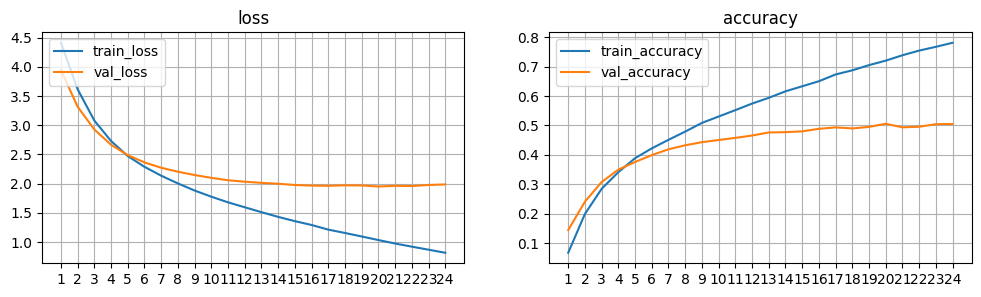

In [251]:
hist = model4.train(train_dl, valid_dl, epochs=1000, patience=4, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [252]:
model4.evaluate(test_dl, metrics=[utils.metric_accuracy])

{'loss': 1.9788435085296632, 'accuracy': 0.4936}

---
# CIFAR100 Setup

In [54]:
train_dl, valid_dl, test_dl, classes = utils.make_cifar_dataloaders()

Files already downloaded and verified
Files already downloaded and verified


In [55]:
class BasicBlock(nn.Module):
    """Basic Block for resnet 18 and resnet 34

    """

    #BasicBlock and BottleNeck block
    #have different output size
    #we use class attribute expansion
    #to distinct
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        #residual function
        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels * BasicBlock.expansion, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels * BasicBlock.expansion)
        )

        #shortcut
        self.shortcut = nn.Sequential()

        #the shortcut output dimension is not the same with residual function
        #use 1*1 convolution to match the dimension
        if stride != 1 or in_channels != BasicBlock.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * BasicBlock.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * BasicBlock.expansion)
            )

    def forward(self, x):
        return nn.ReLU(inplace=True)(self.residual_function(x) + self.shortcut(x))

class BottleNeck(nn.Module):
    """Residual block for resnet over 50 layers

    """
    expansion = 4
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, stride=stride, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels * BottleNeck.expansion, kernel_size=1, bias=False),
            nn.BatchNorm2d(out_channels * BottleNeck.expansion),
        )

        self.shortcut = nn.Sequential()

        if stride != 1 or in_channels != out_channels * BottleNeck.expansion:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * BottleNeck.expansion, stride=stride, kernel_size=1, bias=False),
                nn.BatchNorm2d(out_channels * BottleNeck.expansion)
            )

    def forward(self, x):
        return nn.ReLU(inplace=True)(self.residual_function(x) + self.shortcut(x))

class ResNet(nn.Module):

    def __init__(self, block, num_block, num_classes=100):
        super().__init__()

        self.in_channels = 64

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True))
        #we use a different inputsize than the original paper
        #so conv2_x's stride is 1
        self.conv2_x = self._make_layer(block, 64, num_block[0], 1)
        self.conv3_x = self._make_layer(block, 128, num_block[1], 2)
        self.conv4_x = self._make_layer(block, 256, num_block[2], 2)
        self.conv5_x = self._make_layer(block, 512, num_block[3], 2)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        """make resnet layers(by layer i didnt mean this 'layer' was the
        same as a neuron netowork layer, ex. conv layer), one layer may
        contain more than one residual block

        Args:
            block: block type, basic block or bottle neck block
            out_channels: output depth channel number of this layer
            num_blocks: how many blocks per layer
            stride: the stride of the first block of this layer

        Return:
            return a resnet layer
        """

        # we have num_block blocks per layer, the first block
        # could be 1 or 2, other blocks would always be 1
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion

        return nn.Sequential(*layers)

    def forward(self, x):
        output = self.conv1(x)
        output = self.conv2_x(output)
        output = self.conv3_x(output)
        output = self.conv4_x(output)
        output = self.conv5_x(output)
        output = self.avg_pool(output)
        output = output.view(output.size(0), -1)
        output = self.fc(output)

        return output

def resnet18():
    """ return a ResNet 18 object
    """
    return ResNet(BasicBlock, [2, 2, 2, 2])

# CIFAR100 models: Before reference

In [254]:
# utils.delete_model('resnet-18-transfer-02')
model5 = utils.register_model(
    'resnet-18-transfer-05', 
    resnet18(), 
    'CIFAR-100: Copied from pytorch-cifar100 reference repo')
model5.setup(optimizer_cls=torch.optim.Adam, loss_fn_cls=torch.nn.CrossEntropyLoss)

Skipping load: checkpoint file does not exist
resnet-18-transfer-05 registered.
Trainable params: 11.2 M. Untrainable params: 0.00. Buffers: 6.00 k.
Compiled


{'model_name': 'resnet-18-transfer-05',
 'description': 'CIFAR-100: Copied from pytorch-cifar100 reference repo',
 'persisted': False,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.adam.Adam'>,
 'optimizer_args': {},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': {},
 'epoch': 0,
 'step': 0,
 'metrics': {}}

Initial val_loss: 4.6052


100%|██████████| 79/79 [00:01<00:00, 56.75it/s]


Epoch 1/1000: train_loss=3.7596, train_accuracy=0.1183, val_loss=3.5117, val_accuracy=0.1638
Saved checkpoint for resnet-18-transfer-05. epoch=1, step=704. train_loss=3.7596, train_accuracy=0.1183, val_loss=3.5117, val_accuracy=0.1638


100%|██████████| 79/79 [00:01<00:00, 56.82it/s]


Epoch 2/1000: train_loss=2.9544, train_accuracy=0.2556, val_loss=2.8971, val_accuracy=0.2636
Saved checkpoint for resnet-18-transfer-05. epoch=2, step=1408. train_loss=2.9544, train_accuracy=0.2556, val_loss=2.8971, val_accuracy=0.2636


100%|██████████| 79/79 [00:01<00:00, 55.33it/s]


Epoch 3/1000: train_loss=2.3666, train_accuracy=0.3716, val_loss=2.3429, val_accuracy=0.3792
Saved checkpoint for resnet-18-transfer-05. epoch=3, step=2112. train_loss=2.3666, train_accuracy=0.3716, val_loss=2.3429, val_accuracy=0.3792


100%|██████████| 79/79 [00:01<00:00, 56.63it/s]


Epoch 4/1000: train_loss=1.9375, train_accuracy=0.4688, val_loss=2.1542, val_accuracy=0.4330
Saved checkpoint for resnet-18-transfer-05. epoch=4, step=2816. train_loss=1.9375, train_accuracy=0.4688, val_loss=2.1542, val_accuracy=0.4330


100%|██████████| 79/79 [00:01<00:00, 55.89it/s]


Epoch 5/1000: train_loss=1.5827, train_accuracy=0.5541, val_loss=1.9568, val_accuracy=0.4878
Saved checkpoint for resnet-18-transfer-05. epoch=5, step=3520. train_loss=1.5827, train_accuracy=0.5541, val_loss=1.9568, val_accuracy=0.4878


100%|██████████| 79/79 [00:01<00:00, 55.94it/s]


Epoch 6/1000: train_loss=1.2529, train_accuracy=0.6348, val_loss=1.8945, val_accuracy=0.5088
Saved checkpoint for resnet-18-transfer-05. epoch=6, step=4224. train_loss=1.2529, train_accuracy=0.6348, val_loss=1.8945, val_accuracy=0.5088


100%|██████████| 79/79 [00:01<00:00, 56.43it/s]


Epoch 7/1000: train_loss=0.9176, train_accuracy=0.7238, val_loss=1.9030, val_accuracy=0.5192


100%|██████████| 79/79 [00:01<00:00, 55.75it/s]


Epoch 8/1000: train_loss=0.5770, train_accuracy=0.8208, val_loss=2.1922, val_accuracy=0.4964


100%|██████████| 79/79 [00:01<00:00, 56.91it/s]


Epoch 9/1000: train_loss=0.3573, train_accuracy=0.8880, val_loss=2.2673, val_accuracy=0.5076


100%|██████████| 79/79 [00:01<00:00, 56.48it/s]


Epoch 10/1000: train_loss=0.2041, train_accuracy=0.9397, val_loss=2.7494, val_accuracy=0.4916
Loaded model resnet-18-transfer-05 from checkpoint. epoch=6, step=4224. train_loss=1.2529, train_accuracy=0.6348, val_loss=1.8945, val_accuracy=0.5088


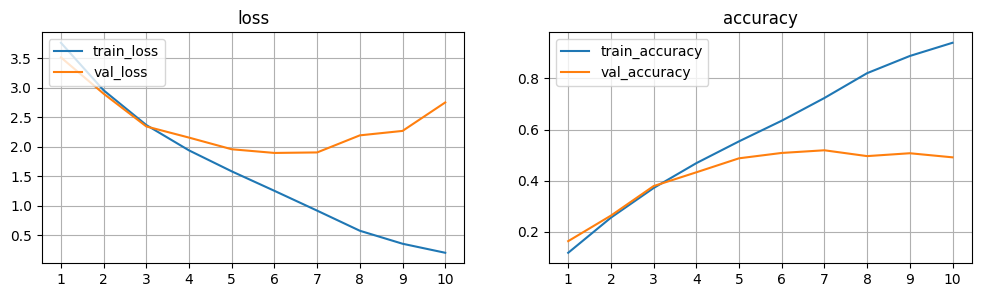

In [255]:
hist = model5.train(train_dl, valid_dl, epochs=1000, patience=4, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [256]:
model5.evaluate(test_dl, metrics=[utils.metric_accuracy])

{'loss': 1.8661871545791626, 'accuracy': 0.508}

In [288]:
# utils.delete_model('resnet-18-transfer-02')
model6 = utils.register_model(
    'resnet-18-transfer-06', 
    resnet18(), 
    'CIFAR-100: Copied from pytorch-cifar100 reference repo WITH WARMUP')
model6.setup(
    optimizer_cls=torch.optim.Adam, 
    optimizer_args=dict(weight_decay=5e-4),
    loss_fn_cls=torch.nn.CrossEntropyLoss, 
    scheduler_cls=torch.optim.lr_scheduler.StepLR, 
    scheduler_args=dict(step_size=6)
)

Loaded model resnet-18-transfer-06 from checkpoint. epoch=9, step=6336. train_loss=0.5943, train_accuracy=0.8389, val_loss=1.3159, val_accuracy=0.6208
resnet-18-transfer-06 registered.
Trainable params: 11.2 M. Untrainable params: 0.00. Buffers: 6.00 k.
Skipped compilation


{'model_name': 'resnet-18-transfer-06',
 'description': 'CIFAR-100: Copied from pytorch-cifar100 reference repo WITH WARMUP',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.adam.Adam'>,
 'optimizer_args': {'lr': 1e-05, 'weight_decay': 0.0005},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'torch.optim.lr_scheduler.StepLR'>,
 'scheduler_args': {'step_size': 6},
 'epoch': 9,
 'step': 6336,
 'metrics': {'train_loss': 0.5942501268174913,
             'train_accuracy': 0.8389111111111112,
             'val_loss': 1.315932618522644,
             'val_accuracy': 0.6208}}

Initial val_loss: 4.6055


100%|██████████| 79/79 [00:01<00:00, 55.91it/s]


Epoch 1/1000: train_loss=3.6245, train_accuracy=0.1454, val_loss=3.2425, val_accuracy=0.1986
Saved checkpoint for resnet-18-transfer-06. epoch=1, step=704. train_loss=3.6245, train_accuracy=0.1454, val_loss=3.2425, val_accuracy=0.1986


100%|██████████| 79/79 [00:01<00:00, 56.40it/s]


Epoch 2/1000: train_loss=2.7006, train_accuracy=0.3016, val_loss=2.5640, val_accuracy=0.3276
Saved checkpoint for resnet-18-transfer-06. epoch=2, step=1408. train_loss=2.7006, train_accuracy=0.3016, val_loss=2.5640, val_accuracy=0.3276


100%|██████████| 79/79 [00:01<00:00, 56.20it/s]


Epoch 3/1000: train_loss=2.2051, train_accuracy=0.4036, val_loss=2.3096, val_accuracy=0.3760
Saved checkpoint for resnet-18-transfer-06. epoch=3, step=2112. train_loss=2.2051, train_accuracy=0.4036, val_loss=2.3096, val_accuracy=0.3760


100%|██████████| 79/79 [00:01<00:00, 55.97it/s]


Epoch 4/1000: train_loss=1.9437, train_accuracy=0.4643, val_loss=2.0207, val_accuracy=0.4454
Saved checkpoint for resnet-18-transfer-06. epoch=4, step=2816. train_loss=1.9437, train_accuracy=0.4643, val_loss=2.0207, val_accuracy=0.4454


100%|██████████| 79/79 [00:01<00:00, 55.58it/s]


Epoch 5/1000: train_loss=1.7653, train_accuracy=0.5054, val_loss=2.0901, val_accuracy=0.4356


100%|██████████| 79/79 [00:01<00:00, 55.74it/s]


Epoch 6/1000: train_loss=1.6127, train_accuracy=0.5398, val_loss=1.9383, val_accuracy=0.4716
Saved checkpoint for resnet-18-transfer-06. epoch=6, step=4224. train_loss=1.6127, train_accuracy=0.5398, val_loss=1.9383, val_accuracy=0.4716


100%|██████████| 79/79 [00:01<00:00, 55.77it/s]


Epoch 7/1000: train_loss=1.4701, train_accuracy=0.5759, val_loss=1.7969, val_accuracy=0.5042
Saved checkpoint for resnet-18-transfer-06. epoch=7, step=4928. train_loss=1.4701, train_accuracy=0.5759, val_loss=1.7969, val_accuracy=0.5042


100%|██████████| 79/79 [00:01<00:00, 55.95it/s]


Epoch 8/1000: train_loss=0.8446, train_accuracy=0.7602, val_loss=1.3434, val_accuracy=0.6120
Saved checkpoint for resnet-18-transfer-06. epoch=8, step=5632. train_loss=0.8446, train_accuracy=0.7602, val_loss=1.3434, val_accuracy=0.6120


100%|██████████| 79/79 [00:01<00:00, 56.35it/s]


Epoch 9/1000: train_loss=0.5919, train_accuracy=0.8343, val_loss=1.3556, val_accuracy=0.6180


100%|██████████| 79/79 [00:01<00:00, 56.19it/s]


Epoch 10/1000: train_loss=0.3961, train_accuracy=0.8974, val_loss=1.4114, val_accuracy=0.6178


100%|██████████| 79/79 [00:01<00:00, 56.29it/s]


Epoch 11/1000: train_loss=0.2306, train_accuracy=0.9500, val_loss=1.4870, val_accuracy=0.6076


100%|██████████| 79/79 [00:01<00:00, 56.07it/s]


Epoch 12/1000: train_loss=0.1178, train_accuracy=0.9818, val_loss=1.5954, val_accuracy=0.5972


100%|██████████| 79/79 [00:01<00:00, 56.26it/s]


Epoch 13/1000: train_loss=0.0659, train_accuracy=0.9934, val_loss=1.6752, val_accuracy=0.5924


100%|██████████| 79/79 [00:01<00:00, 55.60it/s]


Epoch 14/1000: train_loss=0.0317, train_accuracy=0.9989, val_loss=1.6335, val_accuracy=0.6082


100%|██████████| 79/79 [00:01<00:00, 56.20it/s]


Epoch 15/1000: train_loss=0.0230, train_accuracy=0.9994, val_loss=1.6226, val_accuracy=0.6030


100%|██████████| 79/79 [00:01<00:00, 56.03it/s]


Epoch 16/1000: train_loss=0.0194, train_accuracy=0.9997, val_loss=1.6259, val_accuracy=0.6038
Loaded model resnet-18-transfer-06 from checkpoint. epoch=8, step=5632. train_loss=0.8446, train_accuracy=0.7602, val_loss=1.3434, val_accuracy=0.6120


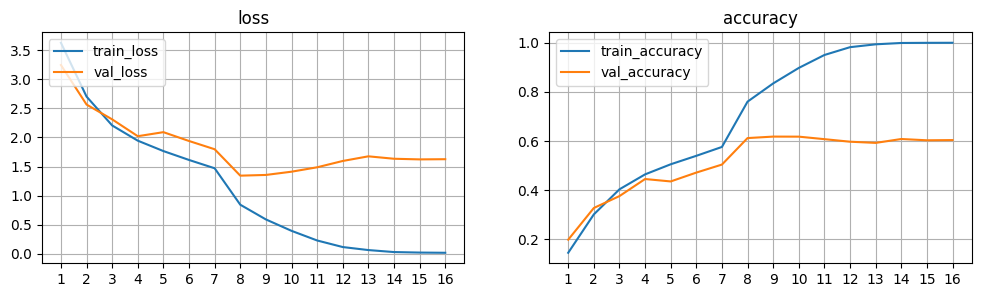

In [282]:
hist = model6.train(train_dl, valid_dl, epochs=1000, patience=8, warmup=1, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [283]:
model6.evaluate(test_dl, metrics=[utils.metric_accuracy])

{'loss': 1.3393178581237792, 'accuracy': 0.6179}

Initial val_loss: 1.3434


100%|██████████| 79/79 [00:01<00:00, 54.75it/s]


Epoch 1/1000: train_loss=0.5943, train_accuracy=0.8389, val_loss=1.3159, val_accuracy=0.6208
Saved checkpoint for resnet-18-transfer-06. epoch=9, step=6336. train_loss=0.5943, train_accuracy=0.8389, val_loss=1.3159, val_accuracy=0.6208


100%|██████████| 79/79 [00:01<00:00, 56.10it/s]


Epoch 2/1000: train_loss=0.5552, train_accuracy=0.8505, val_loss=1.3174, val_accuracy=0.6212


100%|██████████| 79/79 [00:01<00:00, 56.07it/s]


Epoch 3/1000: train_loss=0.5229, train_accuracy=0.8619, val_loss=1.3227, val_accuracy=0.6204


100%|██████████| 79/79 [00:01<00:00, 55.99it/s]


Epoch 4/1000: train_loss=0.4921, train_accuracy=0.8716, val_loss=1.3257, val_accuracy=0.6208


100%|██████████| 79/79 [00:01<00:00, 56.10it/s]


Epoch 5/1000: train_loss=0.4621, train_accuracy=0.8796, val_loss=1.3336, val_accuracy=0.6192


100%|██████████| 79/79 [00:01<00:00, 53.22it/s]


Epoch 6/1000: train_loss=0.4322, train_accuracy=0.8901, val_loss=1.3358, val_accuracy=0.6248


100%|██████████| 79/79 [00:01<00:00, 53.80it/s]


Epoch 7/1000: train_loss=0.4022, train_accuracy=0.9014, val_loss=1.3409, val_accuracy=0.6242


100%|██████████| 79/79 [00:01<00:00, 55.30it/s]


Epoch 8/1000: train_loss=0.3980, train_accuracy=0.9022, val_loss=1.3345, val_accuracy=0.6218


100%|██████████| 79/79 [00:01<00:00, 56.27it/s]


Epoch 9/1000: train_loss=0.3944, train_accuracy=0.9045, val_loss=1.3347, val_accuracy=0.6226
Loaded model resnet-18-transfer-06 from checkpoint. epoch=9, step=6336. train_loss=0.5943, train_accuracy=0.8389, val_loss=1.3159, val_accuracy=0.6208


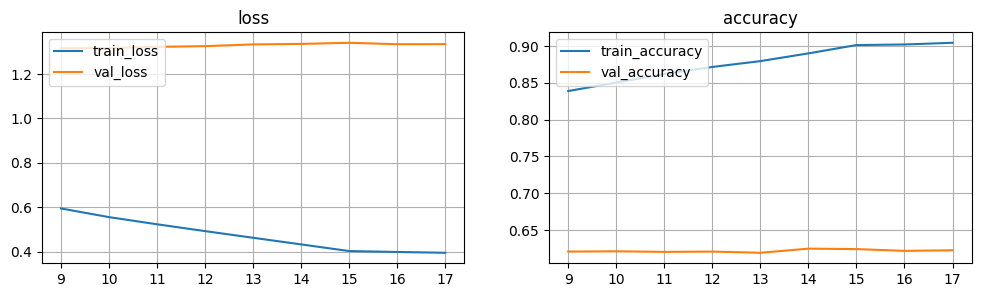

In [285]:
model6.compile(
    optimizer_cls=torch.optim.Adam, 
    optimizer_args=dict(lr=1e-5, weight_decay=5e-4),
    loss_fn_cls=torch.nn.CrossEntropyLoss, 
    scheduler_cls=torch.optim.lr_scheduler.StepLR, 
    scheduler_args=dict(step_size=6)
)
hist = model6.train(train_dl, valid_dl, epochs=1000, patience=8, warmup=0, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

Initial val_loss: 1.3159


100%|██████████| 79/79 [00:01<00:00, 56.26it/s]


Epoch 1/1000: train_loss=0.5585, train_accuracy=0.8530, val_loss=1.3153, val_accuracy=0.6192
Saved checkpoint for resnet-18-transfer-06. epoch=10, step=7040. train_loss=0.5585, train_accuracy=0.8530, val_loss=1.3153, val_accuracy=0.6192


100%|██████████| 79/79 [00:01<00:00, 56.13it/s]


Epoch 2/1000: train_loss=0.5589, train_accuracy=0.8522, val_loss=1.3200, val_accuracy=0.6210


100%|██████████| 79/79 [00:01<00:00, 56.05it/s]


Epoch 3/1000: train_loss=0.5589, train_accuracy=0.8526, val_loss=1.3156, val_accuracy=0.6202


100%|██████████| 79/79 [00:01<00:00, 55.76it/s]


Epoch 4/1000: train_loss=0.5574, train_accuracy=0.8529, val_loss=1.3223, val_accuracy=0.6214


100%|██████████| 79/79 [00:01<00:00, 55.71it/s]


Epoch 5/1000: train_loss=0.5574, train_accuracy=0.8534, val_loss=1.3170, val_accuracy=0.6198


100%|██████████| 79/79 [00:01<00:00, 55.04it/s]


Epoch 6/1000: train_loss=0.5572, train_accuracy=0.8522, val_loss=1.3152, val_accuracy=0.6208
Saved checkpoint for resnet-18-transfer-06. epoch=15, step=10560. train_loss=0.5572, train_accuracy=0.8522, val_loss=1.3152, val_accuracy=0.6208


100%|██████████| 79/79 [00:01<00:00, 54.46it/s]


Epoch 7/1000: train_loss=0.5554, train_accuracy=0.8541, val_loss=1.3171, val_accuracy=0.6198


100%|██████████| 79/79 [00:01<00:00, 55.72it/s]


Epoch 8/1000: train_loss=0.5569, train_accuracy=0.8528, val_loss=1.3162, val_accuracy=0.6222


100%|██████████| 79/79 [00:01<00:00, 56.41it/s]


Epoch 9/1000: train_loss=0.5559, train_accuracy=0.8522, val_loss=1.3145, val_accuracy=0.6222
Saved checkpoint for resnet-18-transfer-06. epoch=18, step=12672. train_loss=0.5559, train_accuracy=0.8522, val_loss=1.3145, val_accuracy=0.6222


100%|██████████| 79/79 [00:01<00:00, 55.22it/s]


Epoch 10/1000: train_loss=0.5563, train_accuracy=0.8533, val_loss=1.3160, val_accuracy=0.6184


100%|██████████| 79/79 [00:01<00:00, 55.06it/s]


Epoch 11/1000: train_loss=0.5543, train_accuracy=0.8543, val_loss=1.3152, val_accuracy=0.6198


100%|██████████| 79/79 [00:01<00:00, 56.24it/s]


Epoch 12/1000: train_loss=0.5559, train_accuracy=0.8528, val_loss=1.3171, val_accuracy=0.6216


100%|██████████| 79/79 [00:01<00:00, 57.24it/s]


Epoch 13/1000: train_loss=0.5581, train_accuracy=0.8510, val_loss=1.3224, val_accuracy=0.6172


100%|██████████| 79/79 [00:01<00:00, 56.37it/s]


Epoch 14/1000: train_loss=0.5559, train_accuracy=0.8525, val_loss=1.3156, val_accuracy=0.6200


100%|██████████| 79/79 [00:01<00:00, 56.20it/s]


Epoch 15/1000: train_loss=0.5561, train_accuracy=0.8533, val_loss=1.3178, val_accuracy=0.6190


100%|██████████| 79/79 [00:01<00:00, 55.99it/s]


Epoch 16/1000: train_loss=0.5569, train_accuracy=0.8518, val_loss=1.3173, val_accuracy=0.6182


100%|██████████| 79/79 [00:01<00:00, 55.37it/s]


Epoch 17/1000: train_loss=0.5556, train_accuracy=0.8542, val_loss=1.3168, val_accuracy=0.6222
Loaded model resnet-18-transfer-06 from checkpoint. epoch=18, step=12672. train_loss=0.5559, train_accuracy=0.8522, val_loss=1.3145, val_accuracy=0.6222


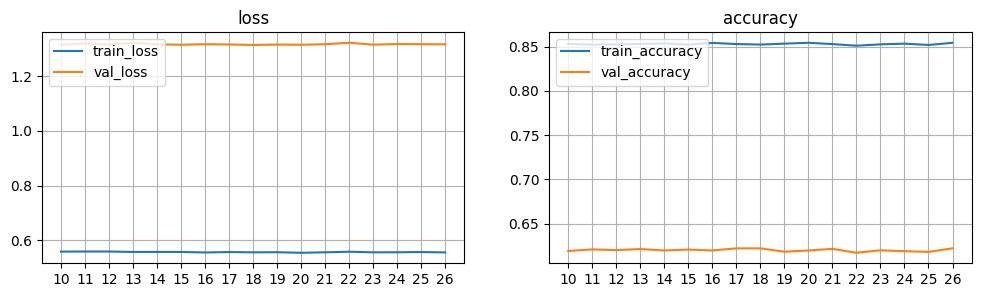

In [289]:
model6.compile(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(lr=1e-5, momentum=0.9, weight_decay=5e-4),
    loss_fn_cls=torch.nn.CrossEntropyLoss, 
    scheduler_cls=torch.optim.lr_scheduler.StepLR, 
    scheduler_args=dict(step_size=6)
)
hist = model6.train(train_dl, valid_dl, epochs=1000, patience=8, warmup=0, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [290]:
model6.evaluate(test_dl, metrics=[utils.metric_accuracy])

{'loss': 1.319042301750183, 'accuracy': 0.6237}

---

# CIFAR100 models: After reference

## Model 7

In [45]:
# utils.delete_model('resnet-18-transfer-02')
model7 = utils.register_model(
    'resnet-18-transfer-07', 
    resnet18(), 
    'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD instead of Adam'
).setup(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=0.1),
    loss_fn_cls=torch.nn.CrossEntropyLoss, 
)

Skipping load: checkpoint file does not exist
resnet-18-transfer-07 registered.
Trainable params: 11.2 M. Untrainable params: 0.00. Buffers: 6.00 k.
Compiled


Initial val_loss: 4.6057


100%|██████████| 79/79 [00:01<00:00, 50.82it/s]


Epoch 1/1000: train_loss=4.1608, train_accuracy=0.0657, val_loss=3.8727, val_accuracy=0.1124
Saved checkpoint for resnet-18-transfer-07. epoch=1, step=704. train_loss=4.1608, train_accuracy=0.0657, val_loss=3.8727, val_accuracy=0.1124


100%|██████████| 79/79 [00:01<00:00, 50.49it/s]


Epoch 2/1000: train_loss=3.5540, train_accuracy=0.1502, val_loss=3.3651, val_accuracy=0.1830
Saved checkpoint for resnet-18-transfer-07. epoch=2, step=1408. train_loss=3.5540, train_accuracy=0.1502, val_loss=3.3651, val_accuracy=0.1830


100%|██████████| 79/79 [00:01<00:00, 51.18it/s]


Epoch 3/1000: train_loss=3.0047, train_accuracy=0.2430, val_loss=2.7193, val_accuracy=0.2988
Saved checkpoint for resnet-18-transfer-07. epoch=3, step=2112. train_loss=3.0047, train_accuracy=0.2430, val_loss=2.7193, val_accuracy=0.2988


100%|██████████| 79/79 [00:01<00:00, 51.22it/s]


Epoch 4/1000: train_loss=2.5942, train_accuracy=0.3268, val_loss=2.6791, val_accuracy=0.3156
Saved checkpoint for resnet-18-transfer-07. epoch=4, step=2816. train_loss=2.5942, train_accuracy=0.3268, val_loss=2.6791, val_accuracy=0.3156


100%|██████████| 79/79 [00:01<00:00, 51.39it/s]


Epoch 5/1000: train_loss=2.3479, train_accuracy=0.3772, val_loss=2.4636, val_accuracy=0.3694
Saved checkpoint for resnet-18-transfer-07. epoch=5, step=3520. train_loss=2.3479, train_accuracy=0.3772, val_loss=2.4636, val_accuracy=0.3694


100%|██████████| 79/79 [00:01<00:00, 51.19it/s]


Epoch 6/1000: train_loss=2.1760, train_accuracy=0.4169, val_loss=2.3197, val_accuracy=0.4026
Saved checkpoint for resnet-18-transfer-07. epoch=6, step=4224. train_loss=2.1760, train_accuracy=0.4169, val_loss=2.3197, val_accuracy=0.4026


100%|██████████| 79/79 [00:01<00:00, 51.53it/s]


Epoch 7/1000: train_loss=2.0336, train_accuracy=0.4482, val_loss=2.4207, val_accuracy=0.3854


100%|██████████| 79/79 [00:01<00:00, 51.21it/s]


Epoch 8/1000: train_loss=1.9196, train_accuracy=0.4731, val_loss=2.4493, val_accuracy=0.3914


100%|██████████| 79/79 [00:01<00:00, 51.78it/s]


Epoch 9/1000: train_loss=1.8271, train_accuracy=0.4940, val_loss=2.1502, val_accuracy=0.4440
Saved checkpoint for resnet-18-transfer-07. epoch=9, step=6336. train_loss=1.8271, train_accuracy=0.4940, val_loss=2.1502, val_accuracy=0.4440


100%|██████████| 79/79 [00:01<00:00, 44.47it/s]


Epoch 10/1000: train_loss=1.7533, train_accuracy=0.5138, val_loss=3.0595, val_accuracy=0.3376


100%|██████████| 79/79 [00:01<00:00, 50.94it/s]


Epoch 11/1000: train_loss=1.6743, train_accuracy=0.5340, val_loss=2.2890, val_accuracy=0.4220


100%|██████████| 79/79 [00:01<00:00, 49.54it/s]


Epoch 12/1000: train_loss=1.6312, train_accuracy=0.5452, val_loss=2.2499, val_accuracy=0.4400


100%|██████████| 79/79 [00:01<00:00, 49.45it/s]


Epoch 13/1000: train_loss=1.5735, train_accuracy=0.5577, val_loss=2.2731, val_accuracy=0.4372


100%|██████████| 79/79 [00:01<00:00, 48.29it/s]


Epoch 14/1000: train_loss=1.5284, train_accuracy=0.5708, val_loss=2.4734, val_accuracy=0.4280


100%|██████████| 79/79 [00:01<00:00, 51.12it/s]


Epoch 15/1000: train_loss=1.5005, train_accuracy=0.5775, val_loss=2.3665, val_accuracy=0.4246


100%|██████████| 79/79 [00:01<00:00, 50.48it/s]


Epoch 16/1000: train_loss=1.4545, train_accuracy=0.5897, val_loss=2.3217, val_accuracy=0.4296


100%|██████████| 79/79 [00:01<00:00, 50.58it/s]


Epoch 17/1000: train_loss=1.4339, train_accuracy=0.5932, val_loss=2.3602, val_accuracy=0.4236


100%|██████████| 79/79 [00:01<00:00, 50.31it/s]


Epoch 18/1000: train_loss=1.4125, train_accuracy=0.6005, val_loss=2.6231, val_accuracy=0.4124


100%|██████████| 79/79 [00:01<00:00, 50.81it/s]


Epoch 19/1000: train_loss=1.3961, train_accuracy=0.6026, val_loss=2.4330, val_accuracy=0.4278
Loaded model resnet-18-transfer-07 from checkpoint. epoch=9, step=6336. train_loss=1.8271, train_accuracy=0.4940, val_loss=2.1502, val_accuracy=0.4440


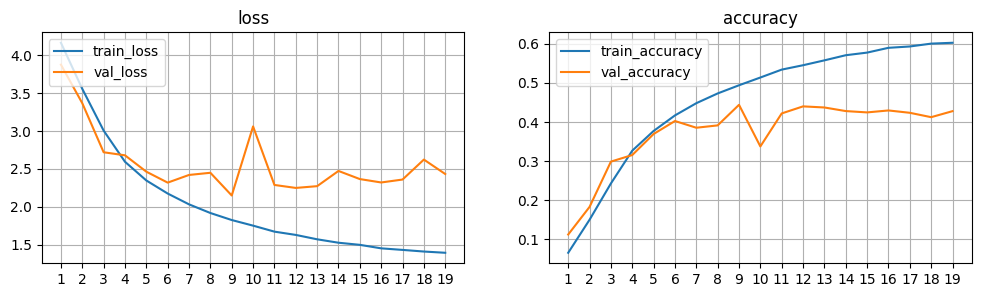

In [46]:
hist = model7.train(train_dl, valid_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [47]:
model7.compile(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=(0.1 / 5)),
    loss_fn_cls=torch.nn.CrossEntropyLoss,    
)

{'model_name': 'resnet-18-transfer-07',
 'description': 'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD instead of Adam',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.sgd.SGD'>,
 'optimizer_args': {'weight_decay': 0.0005, 'momentum': 0.9, 'lr': 0.02},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': {},
 'epoch': 9,
 'step': 6336,
 'metrics': {'train_loss': 1.827145548799303,
             'train_accuracy': 0.4939777777777778,
             'val_loss': 2.1501540924072264,
             'val_accuracy': 0.444}}

Initial val_loss: 2.1502


100%|██████████| 79/79 [00:01<00:00, 50.83it/s]


Epoch 1/1000: train_loss=0.9489, train_accuracy=0.7285, val_loss=1.6575, val_accuracy=0.5582
Saved checkpoint for resnet-18-transfer-07. epoch=10, step=7040. train_loss=0.9489, train_accuracy=0.7285, val_loss=1.6575, val_accuracy=0.5582


100%|██████████| 79/79 [00:01<00:00, 50.73it/s]


Epoch 2/1000: train_loss=0.5256, train_accuracy=0.8481, val_loss=1.8451, val_accuracy=0.5508


100%|██████████| 79/79 [00:01<00:00, 50.53it/s]


Epoch 3/1000: train_loss=0.2628, train_accuracy=0.9312, val_loss=2.1805, val_accuracy=0.5098


100%|██████████| 79/79 [00:01<00:00, 50.61it/s]


Epoch 4/1000: train_loss=0.1634, train_accuracy=0.9609, val_loss=2.2090, val_accuracy=0.5200


100%|██████████| 79/79 [00:01<00:00, 50.80it/s]


Epoch 5/1000: train_loss=0.1096, train_accuracy=0.9774, val_loss=2.2978, val_accuracy=0.5168


100%|██████████| 79/79 [00:01<00:00, 49.79it/s]


Epoch 6/1000: train_loss=0.1414, train_accuracy=0.9648, val_loss=2.4767, val_accuracy=0.4864


100%|██████████| 79/79 [00:01<00:00, 50.03it/s]


Epoch 7/1000: train_loss=0.4406, train_accuracy=0.8659, val_loss=2.5556, val_accuracy=0.4660


100%|██████████| 79/79 [00:01<00:00, 49.02it/s]


Epoch 8/1000: train_loss=0.3638, train_accuracy=0.8908, val_loss=2.4261, val_accuracy=0.4898


100%|██████████| 79/79 [00:01<00:00, 50.67it/s]


Epoch 9/1000: train_loss=0.1920, train_accuracy=0.9467, val_loss=2.4243, val_accuracy=0.4978


100%|██████████| 79/79 [00:01<00:00, 50.91it/s]


Epoch 10/1000: train_loss=0.1128, train_accuracy=0.9728, val_loss=2.4149, val_accuracy=0.5046


100%|██████████| 79/79 [00:01<00:00, 50.33it/s]


Epoch 11/1000: train_loss=0.0666, train_accuracy=0.9872, val_loss=2.2335, val_accuracy=0.5296
Loaded model resnet-18-transfer-07 from checkpoint. epoch=10, step=7040. train_loss=0.9489, train_accuracy=0.7285, val_loss=1.6575, val_accuracy=0.5582


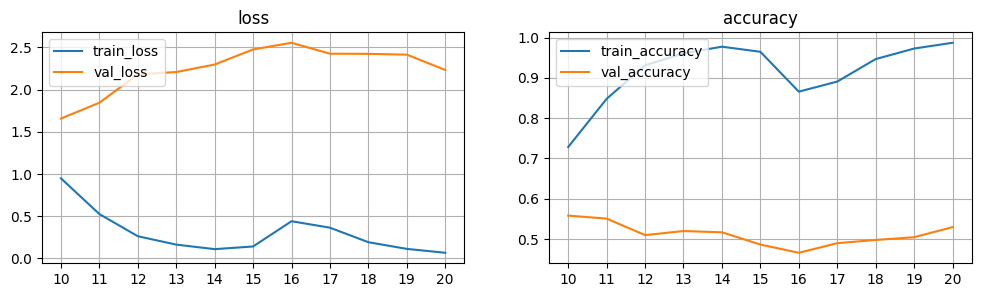

In [48]:
hist = model7.train(train_dl, valid_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [49]:
model7.compile(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=(0.1 / 5 ** 2)),
    loss_fn_cls=torch.nn.CrossEntropyLoss,    
)

{'model_name': 'resnet-18-transfer-07',
 'description': 'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD instead of Adam',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.sgd.SGD'>,
 'optimizer_args': {'weight_decay': 0.0005, 'momentum': 0.9, 'lr': 0.004},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': {},
 'epoch': 10,
 'step': 7040,
 'metrics': {'train_loss': 0.9489242745293511,
             'train_accuracy': 0.7285111111111111,
             'val_loss': 1.6575296592712403,
             'val_accuracy': 0.5582}}

Initial val_loss: 1.6575


100%|██████████| 79/79 [00:01<00:00, 50.51it/s]


Epoch 1/1000: train_loss=0.4419, train_accuracy=0.8868, val_loss=1.6327, val_accuracy=0.5754
Saved checkpoint for resnet-18-transfer-07. epoch=11, step=7744. train_loss=0.4419, train_accuracy=0.8868, val_loss=1.6327, val_accuracy=0.5754


100%|██████████| 79/79 [00:01<00:00, 48.30it/s]


Epoch 2/1000: train_loss=0.3191, train_accuracy=0.9259, val_loss=1.6891, val_accuracy=0.5656


100%|██████████| 79/79 [00:01<00:00, 50.26it/s]


Epoch 3/1000: train_loss=0.2264, train_accuracy=0.9553, val_loss=1.7403, val_accuracy=0.5618


100%|██████████| 79/79 [00:01<00:00, 50.11it/s]


Epoch 4/1000: train_loss=0.1596, train_accuracy=0.9761, val_loss=1.8080, val_accuracy=0.5604


100%|██████████| 79/79 [00:01<00:00, 50.15it/s]


Epoch 5/1000: train_loss=0.1078, train_accuracy=0.9895, val_loss=1.8756, val_accuracy=0.5582


100%|██████████| 79/79 [00:01<00:00, 50.66it/s]


Epoch 6/1000: train_loss=0.0744, train_accuracy=0.9960, val_loss=1.9186, val_accuracy=0.5496


100%|██████████| 79/79 [00:01<00:00, 50.80it/s]


Epoch 7/1000: train_loss=0.0538, train_accuracy=0.9984, val_loss=1.9452, val_accuracy=0.5468


100%|██████████| 79/79 [00:01<00:00, 49.45it/s]


Epoch 8/1000: train_loss=0.0424, train_accuracy=0.9990, val_loss=1.9678, val_accuracy=0.5476


100%|██████████| 79/79 [00:01<00:00, 49.31it/s]


Epoch 9/1000: train_loss=0.0340, train_accuracy=0.9997, val_loss=1.9708, val_accuracy=0.5502


100%|██████████| 79/79 [00:01<00:00, 49.20it/s]


Epoch 10/1000: train_loss=0.0275, train_accuracy=0.9999, val_loss=1.9858, val_accuracy=0.5502


100%|██████████| 79/79 [00:01<00:00, 48.41it/s]


Epoch 11/1000: train_loss=0.0241, train_accuracy=0.9999, val_loss=1.9922, val_accuracy=0.5476
Loaded model resnet-18-transfer-07 from checkpoint. epoch=11, step=7744. train_loss=0.4419, train_accuracy=0.8868, val_loss=1.6327, val_accuracy=0.5754


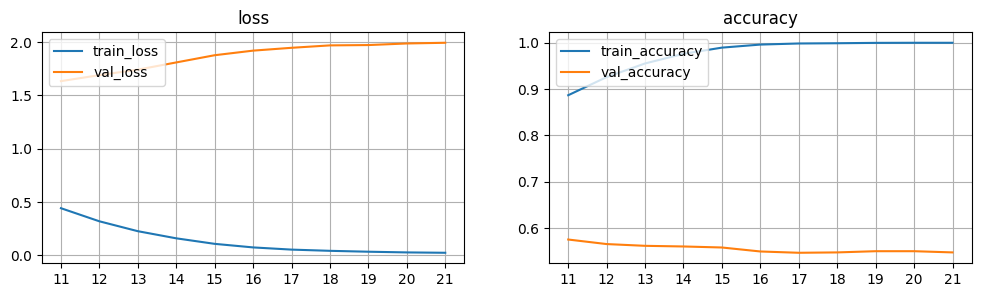

In [50]:
hist = model7.train(train_dl, valid_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [51]:
model7.compile(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=(0.1 / 5 ** 3)),
    loss_fn_cls=torch.nn.CrossEntropyLoss,    
)

{'model_name': 'resnet-18-transfer-07',
 'description': 'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD instead of Adam',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.sgd.SGD'>,
 'optimizer_args': {'weight_decay': 0.0005, 'momentum': 0.9, 'lr': 0.0008},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': {},
 'epoch': 11,
 'step': 7744,
 'metrics': {'train_loss': 0.44186562648349337,
             'train_accuracy': 0.8867555555555555,
             'val_loss': 1.632677191734314,
             'val_accuracy': 0.5754}}

Initial val_loss: 1.6327


100%|██████████| 79/79 [00:01<00:00, 49.90it/s]


Epoch 1/1000: train_loss=0.3223, train_accuracy=0.9266, val_loss=1.6451, val_accuracy=0.5764


100%|██████████| 79/79 [00:01<00:00, 49.17it/s]


Epoch 2/1000: train_loss=0.2994, train_accuracy=0.9354, val_loss=1.6510, val_accuracy=0.5766


100%|██████████| 79/79 [00:01<00:00, 49.84it/s]


Epoch 3/1000: train_loss=0.2791, train_accuracy=0.9418, val_loss=1.6701, val_accuracy=0.5718


100%|██████████| 79/79 [00:01<00:00, 48.36it/s]


Epoch 4/1000: train_loss=0.2617, train_accuracy=0.9462, val_loss=1.6710, val_accuracy=0.5724


100%|██████████| 79/79 [00:01<00:00, 48.64it/s]


Epoch 5/1000: train_loss=0.2428, train_accuracy=0.9530, val_loss=1.7049, val_accuracy=0.5654


100%|██████████| 79/79 [00:01<00:00, 49.82it/s]


Epoch 6/1000: train_loss=0.2257, train_accuracy=0.9589, val_loss=1.6979, val_accuracy=0.5638


100%|██████████| 79/79 [00:01<00:00, 50.06it/s]


Epoch 7/1000: train_loss=0.2103, train_accuracy=0.9627, val_loss=1.7220, val_accuracy=0.5624


100%|██████████| 79/79 [00:01<00:00, 49.86it/s]


Epoch 8/1000: train_loss=0.1958, train_accuracy=0.9679, val_loss=1.7347, val_accuracy=0.5632


100%|██████████| 79/79 [00:01<00:00, 48.87it/s]


Epoch 9/1000: train_loss=0.1817, train_accuracy=0.9713, val_loss=1.7427, val_accuracy=0.5646
Loaded model resnet-18-transfer-07 from checkpoint. epoch=11, step=7744. train_loss=0.4419, train_accuracy=0.8868, val_loss=1.6327, val_accuracy=0.5754


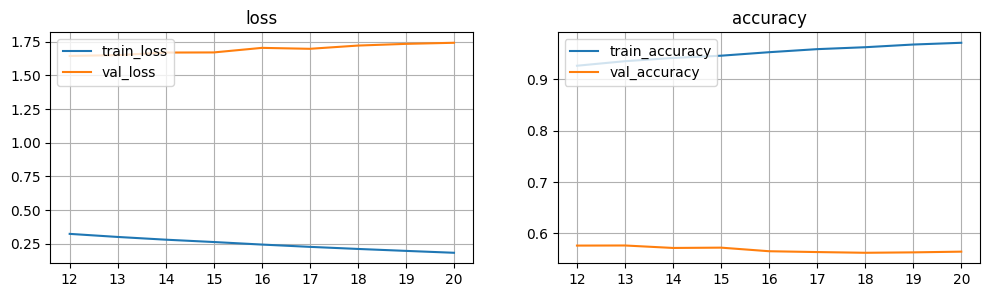

In [52]:
hist = model7.train(train_dl, valid_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [58]:
model7.evaluate(test_dl, metrics=[utils.metric_accuracy])

{'loss': 1.6148437004089355, 'accuracy': 0.5779}

## Model 8

In [59]:
model8 = utils.register_model(
    'resnet-18-transfer-08', 
    resnet18(), 
    'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD + his augmentation'
).setup(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=0.1),
    loss_fn_cls=torch.nn.CrossEntropyLoss, 
)

Skipping load: checkpoint file does not exist
resnet-18-transfer-08 registered.
Trainable params: 11.2 M. Untrainable params: 0.00. Buffers: 6.00 k.
Compiled


Initial val_loss: 4.6046


100%|██████████| 79/79 [00:01<00:00, 49.78it/s]


Epoch 1/1000: train_loss=4.0021, train_accuracy=0.0837, val_loss=3.7568, val_accuracy=0.1278
Saved checkpoint for resnet-18-transfer-08. epoch=1, step=704. train_loss=4.0021, train_accuracy=0.0837, val_loss=3.7568, val_accuracy=0.1278


100%|██████████| 79/79 [00:01<00:00, 49.30it/s]


Epoch 2/1000: train_loss=3.3890, train_accuracy=0.1754, val_loss=3.2405, val_accuracy=0.2038
Saved checkpoint for resnet-18-transfer-08. epoch=2, step=1408. train_loss=3.3890, train_accuracy=0.1754, val_loss=3.2405, val_accuracy=0.2038


100%|██████████| 79/79 [00:01<00:00, 49.46it/s]


Epoch 3/1000: train_loss=2.9270, train_accuracy=0.2590, val_loss=2.8116, val_accuracy=0.2918
Saved checkpoint for resnet-18-transfer-08. epoch=3, step=2112. train_loss=2.9270, train_accuracy=0.2590, val_loss=2.8116, val_accuracy=0.2918


100%|██████████| 79/79 [00:01<00:00, 47.31it/s]


Epoch 4/1000: train_loss=2.5771, train_accuracy=0.3278, val_loss=2.7933, val_accuracy=0.2966
Saved checkpoint for resnet-18-transfer-08. epoch=4, step=2816. train_loss=2.5771, train_accuracy=0.3278, val_loss=2.7933, val_accuracy=0.2966


100%|██████████| 79/79 [00:01<00:00, 50.40it/s]


Epoch 5/1000: train_loss=2.3339, train_accuracy=0.3812, val_loss=2.6082, val_accuracy=0.3438
Saved checkpoint for resnet-18-transfer-08. epoch=5, step=3520. train_loss=2.3339, train_accuracy=0.3812, val_loss=2.6082, val_accuracy=0.3438


100%|██████████| 79/79 [00:01<00:00, 49.50it/s]


Epoch 6/1000: train_loss=2.1441, train_accuracy=0.4194, val_loss=2.4482, val_accuracy=0.3822
Saved checkpoint for resnet-18-transfer-08. epoch=6, step=4224. train_loss=2.1441, train_accuracy=0.4194, val_loss=2.4482, val_accuracy=0.3822


100%|██████████| 79/79 [00:01<00:00, 50.45it/s]


Epoch 7/1000: train_loss=1.9906, train_accuracy=0.4562, val_loss=2.3102, val_accuracy=0.4078
Saved checkpoint for resnet-18-transfer-08. epoch=7, step=4928. train_loss=1.9906, train_accuracy=0.4562, val_loss=2.3102, val_accuracy=0.4078


100%|██████████| 79/79 [00:01<00:00, 49.30it/s]


Epoch 8/1000: train_loss=1.8769, train_accuracy=0.4854, val_loss=2.3719, val_accuracy=0.4040


100%|██████████| 79/79 [00:01<00:00, 49.12it/s]


Epoch 9/1000: train_loss=1.7931, train_accuracy=0.5029, val_loss=2.2695, val_accuracy=0.4224
Saved checkpoint for resnet-18-transfer-08. epoch=9, step=6336. train_loss=1.7931, train_accuracy=0.5029, val_loss=2.2695, val_accuracy=0.4224


100%|██████████| 79/79 [00:01<00:00, 50.05it/s]


Epoch 10/1000: train_loss=1.7136, train_accuracy=0.5216, val_loss=2.3560, val_accuracy=0.3932


100%|██████████| 79/79 [00:01<00:00, 49.92it/s]


Epoch 11/1000: train_loss=1.6460, train_accuracy=0.5400, val_loss=2.3409, val_accuracy=0.4166


100%|██████████| 79/79 [00:01<00:00, 49.66it/s]


Epoch 12/1000: train_loss=1.5856, train_accuracy=0.5554, val_loss=2.4376, val_accuracy=0.4166


100%|██████████| 79/79 [00:01<00:00, 48.51it/s]


Epoch 13/1000: train_loss=1.5436, train_accuracy=0.5681, val_loss=2.5500, val_accuracy=0.4074


100%|██████████| 79/79 [00:01<00:00, 49.54it/s]


Epoch 14/1000: train_loss=1.4978, train_accuracy=0.5786, val_loss=2.3584, val_accuracy=0.4156


100%|██████████| 79/79 [00:01<00:00, 49.30it/s]


Epoch 15/1000: train_loss=1.4675, train_accuracy=0.5825, val_loss=2.3599, val_accuracy=0.4266


100%|██████████| 79/79 [00:01<00:00, 49.66it/s]


Epoch 16/1000: train_loss=1.4308, train_accuracy=0.5925, val_loss=2.2613, val_accuracy=0.4380
Saved checkpoint for resnet-18-transfer-08. epoch=16, step=11264. train_loss=1.4308, train_accuracy=0.5925, val_loss=2.2613, val_accuracy=0.4380


100%|██████████| 79/79 [00:01<00:00, 49.29it/s]


Epoch 17/1000: train_loss=1.4079, train_accuracy=0.6018, val_loss=2.1292, val_accuracy=0.4544
Saved checkpoint for resnet-18-transfer-08. epoch=17, step=11968. train_loss=1.4079, train_accuracy=0.6018, val_loss=2.1292, val_accuracy=0.4544


100%|██████████| 79/79 [00:01<00:00, 49.62it/s]


Epoch 18/1000: train_loss=1.3826, train_accuracy=0.6068, val_loss=2.6371, val_accuracy=0.4078


100%|██████████| 79/79 [00:01<00:00, 48.93it/s]


Epoch 19/1000: train_loss=1.3656, train_accuracy=0.6110, val_loss=2.4511, val_accuracy=0.4390


100%|██████████| 79/79 [00:01<00:00, 50.03it/s]


Epoch 20/1000: train_loss=1.3369, train_accuracy=0.6167, val_loss=2.4155, val_accuracy=0.4362


100%|██████████| 79/79 [00:01<00:00, 48.92it/s]


Epoch 21/1000: train_loss=1.3263, train_accuracy=0.6187, val_loss=2.2497, val_accuracy=0.4612


100%|██████████| 79/79 [00:01<00:00, 48.54it/s]


Epoch 22/1000: train_loss=1.3242, train_accuracy=0.6210, val_loss=2.4283, val_accuracy=0.4266


100%|██████████| 79/79 [00:01<00:00, 48.94it/s]


Epoch 23/1000: train_loss=1.3033, train_accuracy=0.6251, val_loss=2.6658, val_accuracy=0.4112


100%|██████████| 79/79 [00:01<00:00, 49.19it/s]


Epoch 24/1000: train_loss=1.2910, train_accuracy=0.6293, val_loss=2.3500, val_accuracy=0.4530


100%|██████████| 79/79 [00:01<00:00, 50.05it/s]


Epoch 25/1000: train_loss=1.2814, train_accuracy=0.6329, val_loss=2.3842, val_accuracy=0.4324


100%|██████████| 79/79 [00:01<00:00, 49.16it/s]


Epoch 26/1000: train_loss=1.2782, train_accuracy=0.6314, val_loss=2.4619, val_accuracy=0.4282


100%|██████████| 79/79 [00:01<00:00, 49.76it/s]


Epoch 27/1000: train_loss=1.2626, train_accuracy=0.6370, val_loss=2.5653, val_accuracy=0.4170
Loaded model resnet-18-transfer-08 from checkpoint. epoch=17, step=11968. train_loss=1.4079, train_accuracy=0.6018, val_loss=2.1292, val_accuracy=0.4544


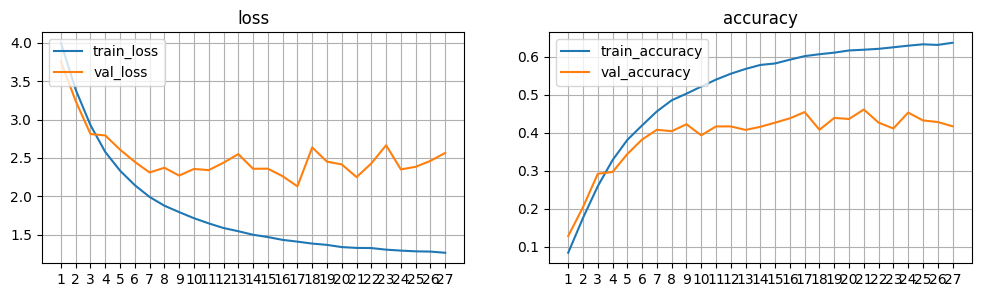

In [60]:
hist = model8.train(train_dl, valid_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [61]:
model8.compile(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=(0.1 / 5)),
    loss_fn_cls=torch.nn.CrossEntropyLoss,    
)

{'model_name': 'resnet-18-transfer-08',
 'description': 'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD + his augmentation',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.sgd.SGD'>,
 'optimizer_args': {'weight_decay': 0.0005, 'momentum': 0.9, 'lr': 0.02},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': {},
 'epoch': 17,
 'step': 11968,
 'metrics': {'train_loss': 1.4079333311504787,
             'train_accuracy': 0.6018222222222223,
             'val_loss': 2.1292476552963255,
             'val_accuracy': 0.4544}}

Initial val_loss: 2.1292


100%|██████████| 79/79 [00:01<00:00, 49.87it/s]


Epoch 1/1000: train_loss=0.5372, train_accuracy=0.8478, val_loss=1.5976, val_accuracy=0.5862
Saved checkpoint for resnet-18-transfer-08. epoch=18, step=12672. train_loss=0.5372, train_accuracy=0.8478, val_loss=1.5976, val_accuracy=0.5862


100%|██████████| 79/79 [00:01<00:00, 50.52it/s]


Epoch 2/1000: train_loss=0.1789, train_accuracy=0.9590, val_loss=1.7388, val_accuracy=0.5782


100%|██████████| 79/79 [00:01<00:00, 49.09it/s]


Epoch 3/1000: train_loss=0.0650, train_accuracy=0.9913, val_loss=1.7426, val_accuracy=0.5822


100%|██████████| 79/79 [00:01<00:00, 50.02it/s]


Epoch 4/1000: train_loss=0.0250, train_accuracy=0.9993, val_loss=1.7162, val_accuracy=0.5866


100%|██████████| 79/79 [00:01<00:00, 50.20it/s]


Epoch 5/1000: train_loss=0.0169, train_accuracy=0.9998, val_loss=1.7102, val_accuracy=0.5798


100%|██████████| 79/79 [00:01<00:00, 49.86it/s]


Epoch 6/1000: train_loss=0.0141, train_accuracy=1.0000, val_loss=1.6904, val_accuracy=0.5814


100%|██████████| 79/79 [00:01<00:00, 49.19it/s]


Epoch 7/1000: train_loss=0.0139, train_accuracy=0.9999, val_loss=1.6701, val_accuracy=0.5816


100%|██████████| 79/79 [00:01<00:00, 49.25it/s]


Epoch 8/1000: train_loss=0.0133, train_accuracy=0.9999, val_loss=1.6772, val_accuracy=0.5782


100%|██████████| 79/79 [00:01<00:00, 49.68it/s]


Epoch 9/1000: train_loss=0.0208, train_accuracy=0.9994, val_loss=1.7248, val_accuracy=0.5724


100%|██████████| 79/79 [00:01<00:00, 50.16it/s]


Epoch 10/1000: train_loss=0.0197, train_accuracy=0.9992, val_loss=1.7809, val_accuracy=0.5646


100%|██████████| 79/79 [00:01<00:00, 49.20it/s]


Epoch 11/1000: train_loss=0.4164, train_accuracy=0.8844, val_loss=2.4512, val_accuracy=0.4450
Loaded model resnet-18-transfer-08 from checkpoint. epoch=18, step=12672. train_loss=0.5372, train_accuracy=0.8478, val_loss=1.5976, val_accuracy=0.5862


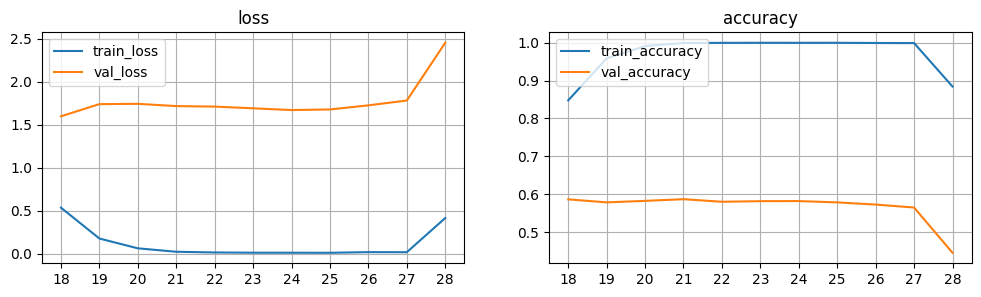

In [62]:
hist = model8.train(train_dl, valid_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [63]:
model8.compile(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=(0.1 / 5 ** 2)),
    loss_fn_cls=torch.nn.CrossEntropyLoss,    
)

{'model_name': 'resnet-18-transfer-08',
 'description': 'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD + his augmentation',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.sgd.SGD'>,
 'optimizer_args': {'weight_decay': 0.0005, 'momentum': 0.9, 'lr': 0.004},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': {},
 'epoch': 18,
 'step': 12672,
 'metrics': {'train_loss': 0.5371622528288099,
             'train_accuracy': 0.8477555555555556,
             'val_loss': 1.5976258029937744,
             'val_accuracy': 0.5862}}

Initial val_loss: 1.5976


100%|██████████| 79/79 [00:01<00:00, 49.15it/s]


Epoch 1/1000: train_loss=0.1718, train_accuracy=0.9646, val_loss=1.5707, val_accuracy=0.5990
Saved checkpoint for resnet-18-transfer-08. epoch=19, step=13376. train_loss=0.1718, train_accuracy=0.9646, val_loss=1.5707, val_accuracy=0.5990


100%|██████████| 79/79 [00:01<00:00, 49.44it/s]


Epoch 2/1000: train_loss=0.1215, train_accuracy=0.9796, val_loss=1.6012, val_accuracy=0.5926


100%|██████████| 79/79 [00:01<00:00, 47.91it/s]


Epoch 3/1000: train_loss=0.0910, train_accuracy=0.9888, val_loss=1.6337, val_accuracy=0.5896


100%|██████████| 79/79 [00:01<00:00, 49.07it/s]


Epoch 4/1000: train_loss=0.0704, train_accuracy=0.9936, val_loss=1.6443, val_accuracy=0.5918


100%|██████████| 79/79 [00:01<00:00, 50.32it/s]


Epoch 5/1000: train_loss=0.0562, train_accuracy=0.9961, val_loss=1.6790, val_accuracy=0.5850


100%|██████████| 79/79 [00:01<00:00, 47.65it/s]


Epoch 6/1000: train_loss=0.0449, train_accuracy=0.9981, val_loss=1.6946, val_accuracy=0.5824


100%|██████████| 79/79 [00:01<00:00, 49.00it/s]


Epoch 7/1000: train_loss=0.0379, train_accuracy=0.9986, val_loss=1.6912, val_accuracy=0.5838


100%|██████████| 79/79 [00:01<00:00, 49.42it/s]


Epoch 8/1000: train_loss=0.0320, train_accuracy=0.9994, val_loss=1.7011, val_accuracy=0.5830


100%|██████████| 79/79 [00:01<00:00, 48.51it/s]


Epoch 9/1000: train_loss=0.0286, train_accuracy=0.9996, val_loss=1.7105, val_accuracy=0.5830


100%|██████████| 79/79 [00:01<00:00, 49.37it/s]


Epoch 10/1000: train_loss=0.0250, train_accuracy=0.9999, val_loss=1.7043, val_accuracy=0.5794


100%|██████████| 79/79 [00:01<00:00, 48.66it/s]


Epoch 11/1000: train_loss=0.0228, train_accuracy=0.9999, val_loss=1.7056, val_accuracy=0.5814
Loaded model resnet-18-transfer-08 from checkpoint. epoch=19, step=13376. train_loss=0.1718, train_accuracy=0.9646, val_loss=1.5707, val_accuracy=0.5990


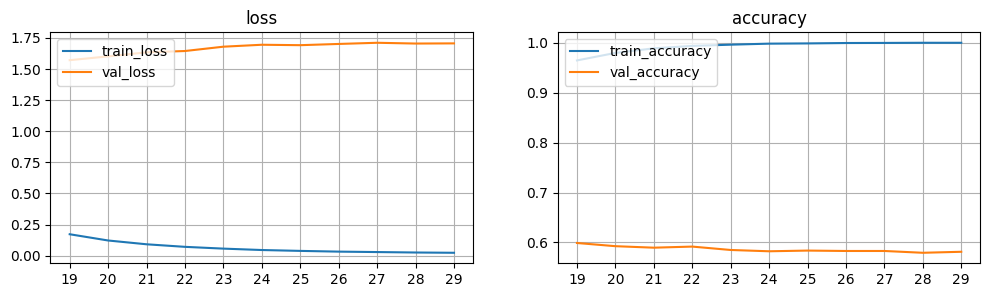

In [64]:
hist = model8.train(train_dl, valid_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [65]:
model8.compile(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=(0.1 / 5 ** 3)),
    loss_fn_cls=torch.nn.CrossEntropyLoss,    
)

{'model_name': 'resnet-18-transfer-08',
 'description': 'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD + his augmentation',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.sgd.SGD'>,
 'optimizer_args': {'weight_decay': 0.0005, 'momentum': 0.9, 'lr': 0.0008},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': {},
 'epoch': 19,
 'step': 13376,
 'metrics': {'train_loss': 0.17175587506294251,
             'train_accuracy': 0.9645555555555556,
             'val_loss': 1.5706547163009643,
             'val_accuracy': 0.599}}

Initial val_loss: 1.5707


100%|██████████| 79/79 [00:01<00:00, 49.14it/s]


Epoch 1/1000: train_loss=0.1232, train_accuracy=0.9814, val_loss=1.5834, val_accuracy=0.5950


100%|██████████| 79/79 [00:01<00:00, 49.80it/s]


Epoch 2/1000: train_loss=0.1154, train_accuracy=0.9824, val_loss=1.5934, val_accuracy=0.5920


100%|██████████| 79/79 [00:01<00:00, 50.25it/s]


Epoch 3/1000: train_loss=0.1090, train_accuracy=0.9846, val_loss=1.5993, val_accuracy=0.5930


100%|██████████| 79/79 [00:01<00:00, 49.41it/s]


Epoch 4/1000: train_loss=0.1029, train_accuracy=0.9864, val_loss=1.5971, val_accuracy=0.5968


100%|██████████| 79/79 [00:01<00:00, 49.44it/s]


Epoch 5/1000: train_loss=0.0986, train_accuracy=0.9874, val_loss=1.6294, val_accuracy=0.5884


100%|██████████| 79/79 [00:01<00:00, 49.05it/s]


Epoch 6/1000: train_loss=0.0930, train_accuracy=0.9886, val_loss=1.6096, val_accuracy=0.5932


100%|██████████| 79/79 [00:01<00:00, 48.51it/s]


Epoch 7/1000: train_loss=0.0879, train_accuracy=0.9899, val_loss=1.6253, val_accuracy=0.5910


100%|██████████| 79/79 [00:01<00:00, 49.20it/s]


Epoch 8/1000: train_loss=0.0832, train_accuracy=0.9910, val_loss=1.6191, val_accuracy=0.5930


100%|██████████| 79/79 [00:01<00:00, 48.55it/s]


Epoch 9/1000: train_loss=0.0791, train_accuracy=0.9921, val_loss=1.6308, val_accuracy=0.5910
Loaded model resnet-18-transfer-08 from checkpoint. epoch=19, step=13376. train_loss=0.1718, train_accuracy=0.9646, val_loss=1.5707, val_accuracy=0.5990


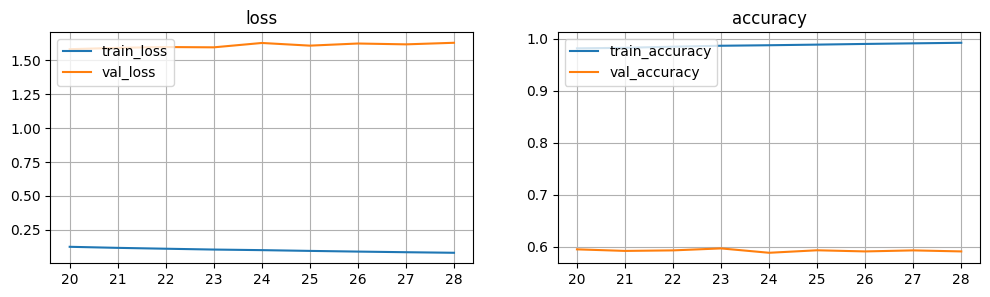

In [66]:
hist = model8.train(train_dl, valid_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [ ]:
model8.evaluate(test_dl, metrics=[utils.metric_accuracy])

{'loss': 1.6003607290267945, 'accuracy': 0.597}

## Model 9

In [69]:
train_dl, valid_dl, test_dl, classes = utils.make_cifar_dataloaders(batch_size=128)

Files already downloaded and verified
Files already downloaded and verified


In [70]:
model9 = utils.register_model(
    'resnet-18-transfer-09', 
    resnet18(), 
    'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD + his augmentation + batch size 128'
).setup(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=0.1),
    loss_fn_cls=torch.nn.CrossEntropyLoss, 
)

Skipping load: checkpoint file does not exist
resnet-18-transfer-09 registered.
Trainable params: 11.2 M. Untrainable params: 0.00. Buffers: 6.00 k.
Compiled


Initial val_loss: 4.6057


100%|██████████| 40/40 [00:01<00:00, 27.12it/s]


Epoch 1/1000: train_loss=3.9641, train_accuracy=0.0910, val_loss=3.7782, val_accuracy=0.1336
Saved checkpoint for resnet-18-transfer-09. epoch=1, step=352. train_loss=3.9641, train_accuracy=0.0910, val_loss=3.7782, val_accuracy=0.1336


100%|██████████| 40/40 [00:01<00:00, 27.86it/s]


Epoch 2/1000: train_loss=3.2933, train_accuracy=0.1941, val_loss=3.0934, val_accuracy=0.2346
Saved checkpoint for resnet-18-transfer-09. epoch=2, step=704. train_loss=3.2933, train_accuracy=0.1941, val_loss=3.0934, val_accuracy=0.2346


100%|██████████| 40/40 [00:01<00:00, 27.48it/s]


Epoch 3/1000: train_loss=2.8258, train_accuracy=0.2771, val_loss=2.7888, val_accuracy=0.2994
Saved checkpoint for resnet-18-transfer-09. epoch=3, step=1056. train_loss=2.8258, train_accuracy=0.2771, val_loss=2.7888, val_accuracy=0.2994


100%|██████████| 40/40 [00:01<00:00, 27.85it/s]


Epoch 4/1000: train_loss=2.4302, train_accuracy=0.3582, val_loss=2.8306, val_accuracy=0.2978


100%|██████████| 40/40 [00:01<00:00, 27.48it/s]


Epoch 5/1000: train_loss=2.1179, train_accuracy=0.4290, val_loss=2.2451, val_accuracy=0.4004
Saved checkpoint for resnet-18-transfer-09. epoch=5, step=1760. train_loss=2.1179, train_accuracy=0.4290, val_loss=2.2451, val_accuracy=0.4004


100%|██████████| 40/40 [00:01<00:00, 27.20it/s]


Epoch 6/1000: train_loss=1.8755, train_accuracy=0.4840, val_loss=2.2016, val_accuracy=0.4192
Saved checkpoint for resnet-18-transfer-09. epoch=6, step=2112. train_loss=1.8755, train_accuracy=0.4840, val_loss=2.2016, val_accuracy=0.4192


100%|██████████| 40/40 [00:01<00:00, 27.41it/s]


Epoch 7/1000: train_loss=1.6686, train_accuracy=0.5291, val_loss=2.1934, val_accuracy=0.4290
Saved checkpoint for resnet-18-transfer-09. epoch=7, step=2464. train_loss=1.6686, train_accuracy=0.5291, val_loss=2.1934, val_accuracy=0.4290


100%|██████████| 40/40 [00:01<00:00, 27.16it/s]


Epoch 8/1000: train_loss=1.5014, train_accuracy=0.5740, val_loss=2.5833, val_accuracy=0.3850


100%|██████████| 40/40 [00:01<00:00, 27.39it/s]


Epoch 9/1000: train_loss=1.3437, train_accuracy=0.6126, val_loss=2.2853, val_accuracy=0.4296


100%|██████████| 40/40 [00:01<00:00, 27.57it/s]


Epoch 10/1000: train_loss=1.1976, train_accuracy=0.6482, val_loss=2.2287, val_accuracy=0.4554


100%|██████████| 40/40 [00:01<00:00, 26.44it/s]


Epoch 11/1000: train_loss=1.0914, train_accuracy=0.6776, val_loss=2.6102, val_accuracy=0.4194


100%|██████████| 40/40 [00:01<00:00, 26.80it/s]


Epoch 12/1000: train_loss=0.9933, train_accuracy=0.7038, val_loss=2.5783, val_accuracy=0.4122


100%|██████████| 40/40 [00:01<00:00, 27.96it/s]


Epoch 13/1000: train_loss=0.8782, train_accuracy=0.7368, val_loss=2.5866, val_accuracy=0.4146


100%|██████████| 40/40 [00:01<00:00, 27.62it/s]


Epoch 14/1000: train_loss=0.8156, train_accuracy=0.7537, val_loss=2.7192, val_accuracy=0.4230


100%|██████████| 40/40 [00:01<00:00, 27.60it/s]


Epoch 15/1000: train_loss=0.7564, train_accuracy=0.7708, val_loss=2.8692, val_accuracy=0.4044


100%|██████████| 40/40 [00:01<00:00, 27.87it/s]


Epoch 16/1000: train_loss=0.7177, train_accuracy=0.7832, val_loss=2.9692, val_accuracy=0.3924


100%|██████████| 40/40 [00:01<00:00, 27.42it/s]


Epoch 17/1000: train_loss=0.6586, train_accuracy=0.7989, val_loss=2.7536, val_accuracy=0.4152
Loaded model resnet-18-transfer-09 from checkpoint. epoch=7, step=2464. train_loss=1.6686, train_accuracy=0.5291, val_loss=2.1934, val_accuracy=0.4290


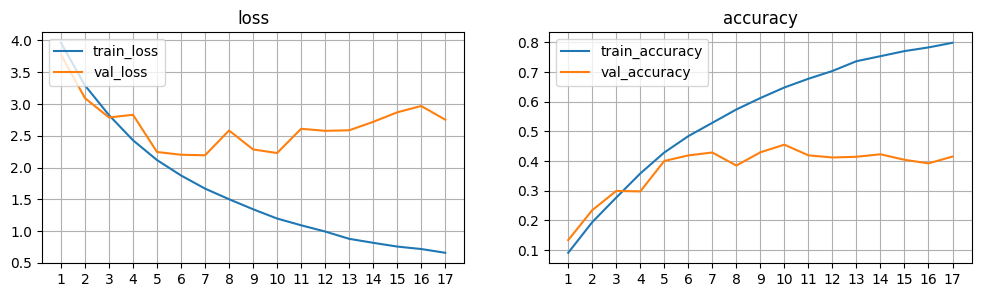

In [71]:
hist = model9.train(train_dl, valid_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [72]:
model9.compile(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=(0.1 / 5)),
    loss_fn_cls=torch.nn.CrossEntropyLoss,    
)

{'model_name': 'resnet-18-transfer-09',
 'description': 'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD + his augmentation + batch '
                'size 128',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.sgd.SGD'>,
 'optimizer_args': {'weight_decay': 0.0005, 'momentum': 0.9, 'lr': 0.02},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': {},
 'epoch': 7,
 'step': 2464,
 'metrics': {'train_loss': 1.6685694382985432,
             'train_accuracy': 0.5290888888888889,
             'val_loss': 2.193389791297913,
             'val_accuracy': 0.429}}

Initial val_loss: 2.1934


100%|██████████| 40/40 [00:01<00:00, 26.24it/s]


Epoch 1/1000: train_loss=0.9216, train_accuracy=0.7368, val_loss=1.6821, val_accuracy=0.5434
Saved checkpoint for resnet-18-transfer-09. epoch=8, step=2816. train_loss=0.9216, train_accuracy=0.7368, val_loss=1.6821, val_accuracy=0.5434


100%|██████████| 40/40 [00:01<00:00, 27.48it/s]


Epoch 2/1000: train_loss=0.5551, train_accuracy=0.8449, val_loss=1.8284, val_accuracy=0.5316


100%|██████████| 40/40 [00:01<00:00, 26.82it/s]


Epoch 3/1000: train_loss=0.2824, train_accuracy=0.9338, val_loss=1.9808, val_accuracy=0.5226


100%|██████████| 40/40 [00:01<00:00, 27.29it/s]


Epoch 4/1000: train_loss=0.1088, train_accuracy=0.9851, val_loss=2.0499, val_accuracy=0.5220


100%|██████████| 40/40 [00:01<00:00, 26.61it/s]


Epoch 5/1000: train_loss=0.0376, train_accuracy=0.9986, val_loss=2.0269, val_accuracy=0.5318


100%|██████████| 40/40 [00:01<00:00, 27.43it/s]


Epoch 6/1000: train_loss=0.0173, train_accuracy=1.0000, val_loss=2.0030, val_accuracy=0.5372


100%|██████████| 40/40 [00:01<00:00, 27.02it/s]


Epoch 7/1000: train_loss=0.0126, train_accuracy=1.0000, val_loss=1.9934, val_accuracy=0.5360


100%|██████████| 40/40 [00:01<00:00, 26.90it/s]


Epoch 8/1000: train_loss=0.0109, train_accuracy=1.0000, val_loss=1.9772, val_accuracy=0.5308


100%|██████████| 40/40 [00:01<00:00, 27.14it/s]


Epoch 9/1000: train_loss=0.0100, train_accuracy=1.0000, val_loss=1.9590, val_accuracy=0.5316


100%|██████████| 40/40 [00:01<00:00, 27.44it/s]


Epoch 10/1000: train_loss=0.0095, train_accuracy=1.0000, val_loss=1.9480, val_accuracy=0.5286


100%|██████████| 40/40 [00:01<00:00, 27.32it/s]


Epoch 11/1000: train_loss=0.0093, train_accuracy=1.0000, val_loss=1.9262, val_accuracy=0.5334
Loaded model resnet-18-transfer-09 from checkpoint. epoch=8, step=2816. train_loss=0.9216, train_accuracy=0.7368, val_loss=1.6821, val_accuracy=0.5434


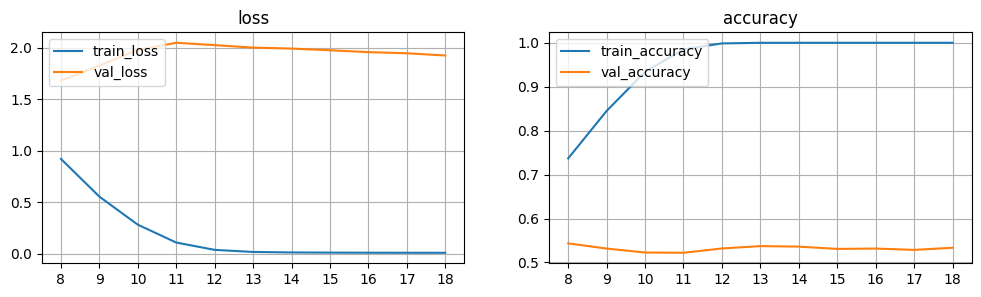

In [73]:
hist = model9.train(train_dl, valid_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [74]:
model9.compile(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=(0.1 / 5 ** 2)),
    loss_fn_cls=torch.nn.CrossEntropyLoss,    
)

{'model_name': 'resnet-18-transfer-09',
 'description': 'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD + his augmentation + batch '
                'size 128',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.sgd.SGD'>,
 'optimizer_args': {'weight_decay': 0.0005, 'momentum': 0.9, 'lr': 0.004},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': {},
 'epoch': 8,
 'step': 2816,
 'metrics': {'train_loss': 0.9216316617859734,
             'train_accuracy': 0.7368444444444444,
             'val_loss': 1.6821275497436523,
             'val_accuracy': 0.5434}}

Initial val_loss: 1.6821


100%|██████████| 40/40 [00:01<00:00, 27.53it/s]


Epoch 1/1000: train_loss=0.5249, train_accuracy=0.8638, val_loss=1.6473, val_accuracy=0.5484
Saved checkpoint for resnet-18-transfer-09. epoch=9, step=3168. train_loss=0.5249, train_accuracy=0.8638, val_loss=1.6473, val_accuracy=0.5484


100%|██████████| 40/40 [00:01<00:00, 27.25it/s]


Epoch 2/1000: train_loss=0.4340, train_accuracy=0.8924, val_loss=1.6851, val_accuracy=0.5484


100%|██████████| 40/40 [00:01<00:00, 27.56it/s]


Epoch 3/1000: train_loss=0.3579, train_accuracy=0.9188, val_loss=1.7213, val_accuracy=0.5440


100%|██████████| 40/40 [00:01<00:00, 26.19it/s]


Epoch 4/1000: train_loss=0.2901, train_accuracy=0.9414, val_loss=1.7589, val_accuracy=0.5438


100%|██████████| 40/40 [00:01<00:00, 27.64it/s]


Epoch 5/1000: train_loss=0.2295, train_accuracy=0.9610, val_loss=1.8075, val_accuracy=0.5360


100%|██████████| 40/40 [00:01<00:00, 28.02it/s]


Epoch 6/1000: train_loss=0.1768, train_accuracy=0.9768, val_loss=1.8460, val_accuracy=0.5358


100%|██████████| 40/40 [00:01<00:00, 27.01it/s]


Epoch 7/1000: train_loss=0.1343, train_accuracy=0.9876, val_loss=1.8905, val_accuracy=0.5318


100%|██████████| 40/40 [00:01<00:00, 27.23it/s]


Epoch 8/1000: train_loss=0.1025, train_accuracy=0.9937, val_loss=1.9158, val_accuracy=0.5330


100%|██████████| 40/40 [00:01<00:00, 23.32it/s]


Epoch 9/1000: train_loss=0.0786, train_accuracy=0.9975, val_loss=1.9448, val_accuracy=0.5298


100%|██████████| 40/40 [00:01<00:00, 27.79it/s]


Epoch 10/1000: train_loss=0.0613, train_accuracy=0.9989, val_loss=1.9696, val_accuracy=0.5322


100%|██████████| 40/40 [00:01<00:00, 27.77it/s]


Epoch 11/1000: train_loss=0.0494, train_accuracy=0.9995, val_loss=1.9914, val_accuracy=0.5278
Loaded model resnet-18-transfer-09 from checkpoint. epoch=9, step=3168. train_loss=0.5249, train_accuracy=0.8638, val_loss=1.6473, val_accuracy=0.5484


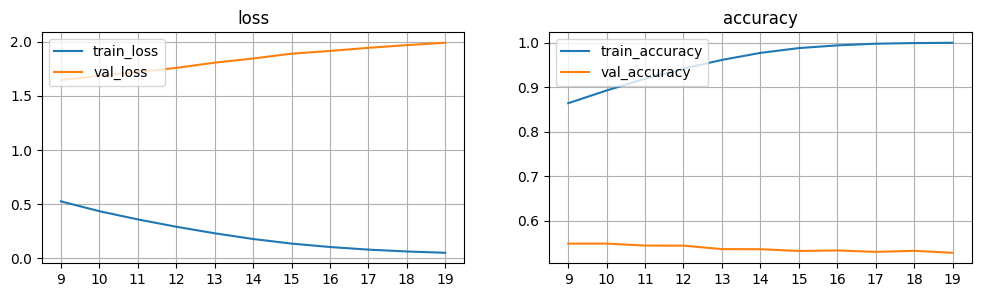

In [75]:
hist = model9.train(train_dl, valid_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [76]:
model9.compile(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=(0.1 / 5 ** 3)),
    loss_fn_cls=torch.nn.CrossEntropyLoss,    
)

{'model_name': 'resnet-18-transfer-09',
 'description': 'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD + his augmentation + batch '
                'size 128',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.sgd.SGD'>,
 'optimizer_args': {'weight_decay': 0.0005, 'momentum': 0.9, 'lr': 0.0008},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': {},
 'epoch': 9,
 'step': 3168,
 'metrics': {'train_loss': 0.5248711085955302,
             'train_accuracy': 0.8637777777777778,
             'val_loss': 1.6472977111816407,
             'val_accuracy': 0.5484}}

Initial val_loss: 1.6473


100%|██████████| 40/40 [00:01<00:00, 26.98it/s]


Epoch 1/1000: train_loss=0.4364, train_accuracy=0.8944, val_loss=1.6471, val_accuracy=0.5536
Saved checkpoint for resnet-18-transfer-09. epoch=10, step=3520. train_loss=0.4364, train_accuracy=0.8944, val_loss=1.6471, val_accuracy=0.5536


100%|██████████| 40/40 [00:01<00:00, 27.80it/s]


Epoch 2/1000: train_loss=0.4196, train_accuracy=0.9002, val_loss=1.6652, val_accuracy=0.5516


100%|██████████| 40/40 [00:01<00:00, 27.58it/s]


Epoch 3/1000: train_loss=0.4039, train_accuracy=0.9055, val_loss=1.6683, val_accuracy=0.5522


100%|██████████| 40/40 [00:01<00:00, 27.45it/s]


Epoch 4/1000: train_loss=0.3872, train_accuracy=0.9110, val_loss=1.6728, val_accuracy=0.5502


100%|██████████| 40/40 [00:01<00:00, 27.88it/s]


Epoch 5/1000: train_loss=0.3718, train_accuracy=0.9165, val_loss=1.6786, val_accuracy=0.5488


100%|██████████| 40/40 [00:01<00:00, 27.60it/s]


Epoch 6/1000: train_loss=0.3565, train_accuracy=0.9211, val_loss=1.6911, val_accuracy=0.5456


100%|██████████| 40/40 [00:01<00:00, 27.55it/s]


Epoch 7/1000: train_loss=0.3427, train_accuracy=0.9265, val_loss=1.7018, val_accuracy=0.5454


100%|██████████| 40/40 [00:01<00:00, 27.68it/s]


Epoch 8/1000: train_loss=0.3297, train_accuracy=0.9300, val_loss=1.7114, val_accuracy=0.5472


100%|██████████| 40/40 [00:01<00:00, 27.79it/s]


Epoch 9/1000: train_loss=0.3157, train_accuracy=0.9355, val_loss=1.7154, val_accuracy=0.5480


100%|██████████| 40/40 [00:01<00:00, 27.52it/s]


Epoch 10/1000: train_loss=0.3019, train_accuracy=0.9391, val_loss=1.7165, val_accuracy=0.5474


100%|██████████| 40/40 [00:01<00:00, 28.07it/s]


Epoch 11/1000: train_loss=0.2869, train_accuracy=0.9454, val_loss=1.7305, val_accuracy=0.5476
Loaded model resnet-18-transfer-09 from checkpoint. epoch=10, step=3520. train_loss=0.4364, train_accuracy=0.8944, val_loss=1.6471, val_accuracy=0.5536


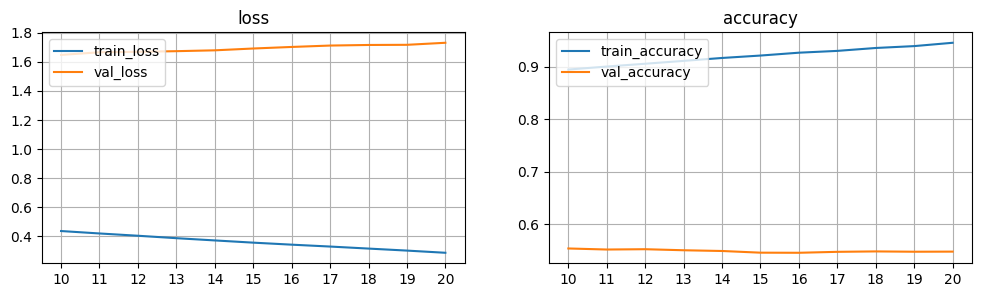

In [77]:
hist = model9.train(train_dl, valid_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [78]:
model9.evaluate(test_dl, metrics=[utils.metric_accuracy])

{'loss': 1.6502607028961183, 'accuracy': 0.5609}

## Model 10

In [82]:
train_dl, test_dl, classes = utils.make_cifar_dataloaders_without_validation()
len(train_dl.dataset), len(test_dl.dataset)

Files already downloaded and verified
Files already downloaded and verified


(50000, 10000)

In [86]:
# utils.delete_model('resnet-18-transfer-02')
model10 = utils.register_model(
    'resnet-18-transfer-10', 
    resnet18(), 
    'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD + his augmentation + use test for validation'
).setup(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=0.1),
    loss_fn_cls=torch.nn.CrossEntropyLoss, 
)

Skipping load: checkpoint file does not exist
resnet-18-transfer-10 registered.
Trainable params: 11.2 M. Untrainable params: 0.00. Buffers: 6.00 k.
Compiled


Initial val_loss: 4.6057


100%|██████████| 157/157 [00:02<00:00, 53.22it/s]


Epoch 1/1000: train_loss=3.9796, train_accuracy=0.0891, val_loss=3.5952, val_accuracy=0.1420
Saved checkpoint for resnet-18-transfer-10. epoch=1, step=782. train_loss=3.9796, train_accuracy=0.0891, val_loss=3.5952, val_accuracy=0.1420


100%|██████████| 157/157 [00:02<00:00, 52.85it/s]


Epoch 2/1000: train_loss=3.3248, train_accuracy=0.1884, val_loss=3.0840, val_accuracy=0.2396
Saved checkpoint for resnet-18-transfer-10. epoch=2, step=1564. train_loss=3.3248, train_accuracy=0.1884, val_loss=3.0840, val_accuracy=0.2396


100%|██████████| 157/157 [00:02<00:00, 52.77it/s]


Epoch 3/1000: train_loss=2.8445, train_accuracy=0.2788, val_loss=2.6458, val_accuracy=0.3188
Saved checkpoint for resnet-18-transfer-10. epoch=3, step=2346. train_loss=2.8445, train_accuracy=0.2788, val_loss=2.6458, val_accuracy=0.3188


100%|██████████| 157/157 [00:02<00:00, 52.33it/s]


Epoch 4/1000: train_loss=2.5321, train_accuracy=0.3387, val_loss=2.5689, val_accuracy=0.3455
Saved checkpoint for resnet-18-transfer-10. epoch=4, step=3128. train_loss=2.5321, train_accuracy=0.3387, val_loss=2.5689, val_accuracy=0.3455


100%|██████████| 157/157 [00:02<00:00, 52.57it/s]


Epoch 5/1000: train_loss=2.3219, train_accuracy=0.3831, val_loss=2.3499, val_accuracy=0.3790
Saved checkpoint for resnet-18-transfer-10. epoch=5, step=3910. train_loss=2.3219, train_accuracy=0.3831, val_loss=2.3499, val_accuracy=0.3790


100%|██████████| 157/157 [00:02<00:00, 53.02it/s]


Epoch 6/1000: train_loss=2.1727, train_accuracy=0.4165, val_loss=2.2823, val_accuracy=0.4045
Saved checkpoint for resnet-18-transfer-10. epoch=6, step=4692. train_loss=2.1727, train_accuracy=0.4165, val_loss=2.2823, val_accuracy=0.4045


100%|██████████| 157/157 [00:02<00:00, 52.59it/s]


Epoch 7/1000: train_loss=2.0784, train_accuracy=0.4389, val_loss=2.2222, val_accuracy=0.4203
Saved checkpoint for resnet-18-transfer-10. epoch=7, step=5474. train_loss=2.0784, train_accuracy=0.4389, val_loss=2.2222, val_accuracy=0.4203


100%|██████████| 157/157 [00:02<00:00, 53.59it/s]


Epoch 8/1000: train_loss=2.0057, train_accuracy=0.4542, val_loss=2.3252, val_accuracy=0.3937


100%|██████████| 157/157 [00:02<00:00, 52.88it/s]


Epoch 9/1000: train_loss=1.9637, train_accuracy=0.4643, val_loss=2.0848, val_accuracy=0.4463
Saved checkpoint for resnet-18-transfer-10. epoch=9, step=7038. train_loss=1.9637, train_accuracy=0.4643, val_loss=2.0848, val_accuracy=0.4463


100%|██████████| 157/157 [00:02<00:00, 52.49it/s]


Epoch 10/1000: train_loss=1.9264, train_accuracy=0.4754, val_loss=2.5213, val_accuracy=0.3763


100%|██████████| 157/157 [00:02<00:00, 52.78it/s]


Epoch 11/1000: train_loss=1.8834, train_accuracy=0.4841, val_loss=2.1705, val_accuracy=0.4367


100%|██████████| 157/157 [00:02<00:00, 53.17it/s]


Epoch 12/1000: train_loss=1.8552, train_accuracy=0.4933, val_loss=2.2613, val_accuracy=0.4205


100%|██████████| 157/157 [00:02<00:00, 52.99it/s]


Epoch 13/1000: train_loss=1.8399, train_accuracy=0.4955, val_loss=2.0406, val_accuracy=0.4647
Saved checkpoint for resnet-18-transfer-10. epoch=13, step=10166. train_loss=1.8399, train_accuracy=0.4955, val_loss=2.0406, val_accuracy=0.4647


100%|██████████| 157/157 [00:02<00:00, 52.34it/s]


Epoch 14/1000: train_loss=1.8205, train_accuracy=0.5006, val_loss=2.0502, val_accuracy=0.4643


100%|██████████| 157/157 [00:02<00:00, 52.80it/s]


Epoch 15/1000: train_loss=1.8123, train_accuracy=0.5024, val_loss=2.0439, val_accuracy=0.4592


100%|██████████| 157/157 [00:03<00:00, 52.08it/s]


Epoch 16/1000: train_loss=1.7910, train_accuracy=0.5083, val_loss=2.0407, val_accuracy=0.4720


100%|██████████| 157/157 [00:02<00:00, 53.65it/s]


Epoch 17/1000: train_loss=1.7753, train_accuracy=0.5122, val_loss=2.1543, val_accuracy=0.4447


100%|██████████| 157/157 [00:02<00:00, 53.58it/s]


Epoch 18/1000: train_loss=1.7704, train_accuracy=0.5141, val_loss=2.1304, val_accuracy=0.4541


100%|██████████| 157/157 [00:02<00:00, 53.01it/s]


Epoch 19/1000: train_loss=1.7617, train_accuracy=0.5157, val_loss=1.8861, val_accuracy=0.5020
Saved checkpoint for resnet-18-transfer-10. epoch=19, step=14858. train_loss=1.7617, train_accuracy=0.5157, val_loss=1.8861, val_accuracy=0.5020


100%|██████████| 157/157 [00:02<00:00, 52.75it/s]


Epoch 20/1000: train_loss=1.7421, train_accuracy=0.5187, val_loss=2.2573, val_accuracy=0.4313


100%|██████████| 157/157 [00:02<00:00, 53.58it/s]


Epoch 21/1000: train_loss=1.7517, train_accuracy=0.5190, val_loss=2.0408, val_accuracy=0.4709


100%|██████████| 157/157 [00:02<00:00, 53.41it/s]


Epoch 22/1000: train_loss=1.7371, train_accuracy=0.5223, val_loss=2.0365, val_accuracy=0.4713


100%|██████████| 157/157 [00:02<00:00, 53.28it/s]


Epoch 23/1000: train_loss=1.7313, train_accuracy=0.5237, val_loss=2.1484, val_accuracy=0.4500


100%|██████████| 157/157 [00:03<00:00, 51.64it/s]


Epoch 24/1000: train_loss=1.7296, train_accuracy=0.5219, val_loss=1.9343, val_accuracy=0.4917


100%|██████████| 157/157 [00:02<00:00, 53.06it/s]


Epoch 25/1000: train_loss=1.7197, train_accuracy=0.5249, val_loss=1.7669, val_accuracy=0.5140
Saved checkpoint for resnet-18-transfer-10. epoch=25, step=19550. train_loss=1.7197, train_accuracy=0.5249, val_loss=1.7669, val_accuracy=0.5140


100%|██████████| 157/157 [00:03<00:00, 50.75it/s]


Epoch 26/1000: train_loss=1.7060, train_accuracy=0.5285, val_loss=1.9400, val_accuracy=0.4933


100%|██████████| 157/157 [00:02<00:00, 52.51it/s]


Epoch 27/1000: train_loss=1.7125, train_accuracy=0.5266, val_loss=1.9323, val_accuracy=0.4881


100%|██████████| 157/157 [00:03<00:00, 51.96it/s]


Epoch 28/1000: train_loss=1.7075, train_accuracy=0.5279, val_loss=2.0761, val_accuracy=0.4623


100%|██████████| 157/157 [00:02<00:00, 52.92it/s]


Epoch 29/1000: train_loss=1.6985, train_accuracy=0.5310, val_loss=2.0654, val_accuracy=0.4706


100%|██████████| 157/157 [00:02<00:00, 54.00it/s]


Epoch 30/1000: train_loss=1.6961, train_accuracy=0.5318, val_loss=1.9387, val_accuracy=0.4969


100%|██████████| 157/157 [00:02<00:00, 52.51it/s]


Epoch 31/1000: train_loss=1.6954, train_accuracy=0.5307, val_loss=1.9474, val_accuracy=0.4873


100%|██████████| 157/157 [00:03<00:00, 52.19it/s]


Epoch 32/1000: train_loss=1.6939, train_accuracy=0.5336, val_loss=2.0496, val_accuracy=0.4763


100%|██████████| 157/157 [00:03<00:00, 52.32it/s]


Epoch 33/1000: train_loss=1.6956, train_accuracy=0.5327, val_loss=2.0261, val_accuracy=0.4663


100%|██████████| 157/157 [00:03<00:00, 51.04it/s]


Epoch 34/1000: train_loss=1.6910, train_accuracy=0.5308, val_loss=2.0247, val_accuracy=0.4772


100%|██████████| 157/157 [00:03<00:00, 52.30it/s]


Epoch 35/1000: train_loss=1.6815, train_accuracy=0.5349, val_loss=2.0041, val_accuracy=0.4700
Loaded model resnet-18-transfer-10 from checkpoint. epoch=25, step=19550. train_loss=1.7197, train_accuracy=0.5249, val_loss=1.7669, val_accuracy=0.5140


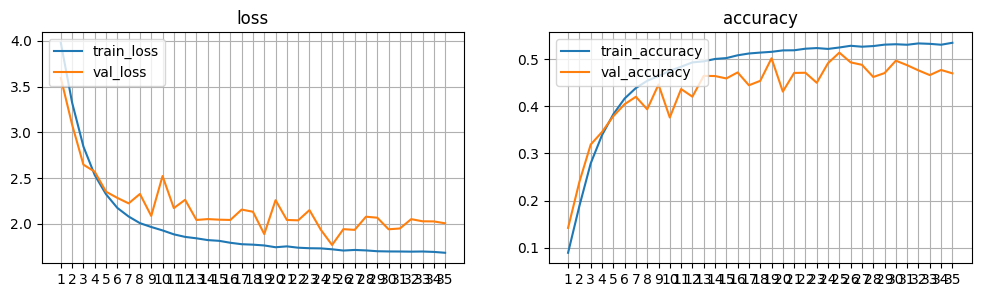

In [87]:
hist = model10.train(train_dl, test_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [88]:
model10.compile(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=(0.1 / 5)),
    loss_fn_cls=torch.nn.CrossEntropyLoss,    
)

{'model_name': 'resnet-18-transfer-10',
 'description': 'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD + his augmentation + use '
                'test for validation',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.sgd.SGD'>,
 'optimizer_args': {'weight_decay': 0.0005, 'momentum': 0.9, 'lr': 0.02},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': {},
 'epoch': 25,
 'step': 19550,
 'metrics': {'train_loss': 1.7197016818237305,
             'train_accuracy': 0.52492,
             'val_loss': 1.766895387840271,
             'val_accuracy': 0.514}}

Initial val_loss: 1.7669


100%|██████████| 157/157 [00:03<00:00, 50.97it/s]


Epoch 1/1000: train_loss=1.1506, train_accuracy=0.6699, val_loss=1.1776, val_accuracy=0.6617
Saved checkpoint for resnet-18-transfer-10. epoch=26, step=20332. train_loss=1.1506, train_accuracy=0.6699, val_loss=1.1776, val_accuracy=0.6617


100%|██████████| 157/157 [00:02<00:00, 52.34it/s]


Epoch 2/1000: train_loss=1.0167, train_accuracy=0.7022, val_loss=1.1537, val_accuracy=0.6680
Saved checkpoint for resnet-18-transfer-10. epoch=27, step=21114. train_loss=1.0167, train_accuracy=0.7022, val_loss=1.1537, val_accuracy=0.6680


100%|██████████| 157/157 [00:02<00:00, 53.37it/s]


Epoch 3/1000: train_loss=0.9706, train_accuracy=0.7121, val_loss=1.1502, val_accuracy=0.6729
Saved checkpoint for resnet-18-transfer-10. epoch=28, step=21896. train_loss=0.9706, train_accuracy=0.7121, val_loss=1.1502, val_accuracy=0.6729


100%|██████████| 157/157 [00:02<00:00, 52.64it/s]


Epoch 4/1000: train_loss=0.9474, train_accuracy=0.7216, val_loss=1.1706, val_accuracy=0.6702


100%|██████████| 157/157 [00:02<00:00, 52.97it/s]


Epoch 5/1000: train_loss=0.9332, train_accuracy=0.7243, val_loss=1.1746, val_accuracy=0.6720


100%|██████████| 157/157 [00:02<00:00, 53.25it/s]


Epoch 6/1000: train_loss=0.9240, train_accuracy=0.7257, val_loss=1.2255, val_accuracy=0.6599


100%|██████████| 157/157 [00:02<00:00, 52.49it/s]


Epoch 7/1000: train_loss=0.9153, train_accuracy=0.7256, val_loss=1.2864, val_accuracy=0.6538


100%|██████████| 157/157 [00:03<00:00, 51.96it/s]


Epoch 8/1000: train_loss=0.9181, train_accuracy=0.7266, val_loss=1.2414, val_accuracy=0.6580


100%|██████████| 157/157 [00:02<00:00, 52.98it/s]


Epoch 9/1000: train_loss=0.9023, train_accuracy=0.7334, val_loss=1.2218, val_accuracy=0.6624


100%|██████████| 157/157 [00:02<00:00, 52.75it/s]


Epoch 10/1000: train_loss=0.8938, train_accuracy=0.7341, val_loss=1.3461, val_accuracy=0.6330


100%|██████████| 157/157 [00:02<00:00, 53.15it/s]


Epoch 11/1000: train_loss=0.8828, train_accuracy=0.7367, val_loss=1.2783, val_accuracy=0.6545


100%|██████████| 157/157 [00:02<00:00, 52.79it/s]


Epoch 12/1000: train_loss=0.8639, train_accuracy=0.7416, val_loss=1.2509, val_accuracy=0.6641


100%|██████████| 157/157 [00:02<00:00, 53.37it/s]


Epoch 13/1000: train_loss=0.8611, train_accuracy=0.7438, val_loss=1.2501, val_accuracy=0.6560
Loaded model resnet-18-transfer-10 from checkpoint. epoch=28, step=21896. train_loss=0.9706, train_accuracy=0.7121, val_loss=1.1502, val_accuracy=0.6729


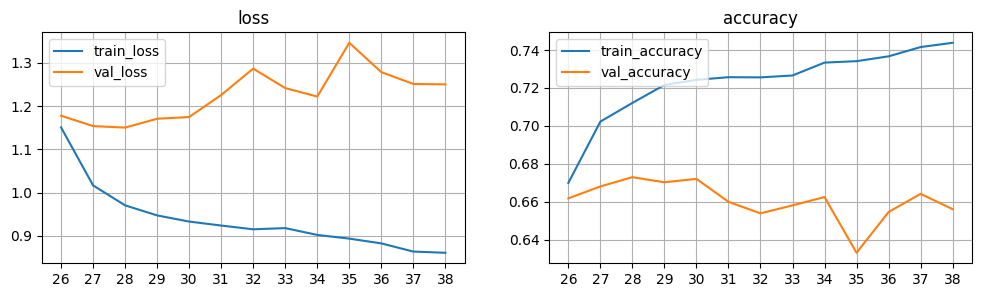

In [89]:
hist = model10.train(train_dl, test_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [90]:
model10.compile(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=(0.1 / 5 ** 2)),
    loss_fn_cls=torch.nn.CrossEntropyLoss,    
)

{'model_name': 'resnet-18-transfer-10',
 'description': 'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD + his augmentation + use '
                'test for validation',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.sgd.SGD'>,
 'optimizer_args': {'weight_decay': 0.0005, 'momentum': 0.9, 'lr': 0.004},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': {},
 'epoch': 28,
 'step': 21896,
 'metrics': {'train_loss': 0.9706283950424194,
             'train_accuracy': 0.71208,
             'val_loss': 1.150206604385376,
             'val_accuracy': 0.6729}}

Initial val_loss: 1.1502


100%|██████████| 157/157 [00:02<00:00, 54.08it/s]


Epoch 1/1000: train_loss=0.7664, train_accuracy=0.7729, val_loss=0.9798, val_accuracy=0.7151
Saved checkpoint for resnet-18-transfer-10. epoch=29, step=22678. train_loss=0.7664, train_accuracy=0.7729, val_loss=0.9798, val_accuracy=0.7151


100%|██████████| 157/157 [00:02<00:00, 53.19it/s]


Epoch 2/1000: train_loss=0.6933, train_accuracy=0.7946, val_loss=0.9695, val_accuracy=0.7195
Saved checkpoint for resnet-18-transfer-10. epoch=30, step=23460. train_loss=0.6933, train_accuracy=0.7946, val_loss=0.9695, val_accuracy=0.7195


100%|██████████| 157/157 [00:02<00:00, 52.79it/s]


Epoch 3/1000: train_loss=0.6593, train_accuracy=0.8017, val_loss=0.9771, val_accuracy=0.7219


100%|██████████| 157/157 [00:02<00:00, 53.31it/s]


Epoch 4/1000: train_loss=0.6299, train_accuracy=0.8123, val_loss=0.9661, val_accuracy=0.7254
Saved checkpoint for resnet-18-transfer-10. epoch=32, step=25024. train_loss=0.6299, train_accuracy=0.8123, val_loss=0.9661, val_accuracy=0.7254


100%|██████████| 157/157 [00:03<00:00, 52.24it/s]


Epoch 5/1000: train_loss=0.6004, train_accuracy=0.8190, val_loss=0.9826, val_accuracy=0.7220


100%|██████████| 157/157 [00:02<00:00, 52.49it/s]


Epoch 6/1000: train_loss=0.5794, train_accuracy=0.8254, val_loss=0.9665, val_accuracy=0.7239


100%|██████████| 157/157 [00:02<00:00, 52.83it/s]


Epoch 7/1000: train_loss=0.5491, train_accuracy=0.8337, val_loss=0.9580, val_accuracy=0.7293
Saved checkpoint for resnet-18-transfer-10. epoch=35, step=27370. train_loss=0.5491, train_accuracy=0.8337, val_loss=0.9580, val_accuracy=0.7293


100%|██████████| 157/157 [00:03<00:00, 51.93it/s]


Epoch 8/1000: train_loss=0.5208, train_accuracy=0.8434, val_loss=0.9769, val_accuracy=0.7330


100%|██████████| 157/157 [00:02<00:00, 52.38it/s]


Epoch 9/1000: train_loss=0.4994, train_accuracy=0.8484, val_loss=0.9944, val_accuracy=0.7238


100%|██████████| 157/157 [00:02<00:00, 52.61it/s]


Epoch 10/1000: train_loss=0.4734, train_accuracy=0.8560, val_loss=0.9983, val_accuracy=0.7246


100%|██████████| 157/157 [00:02<00:00, 53.01it/s]


Epoch 11/1000: train_loss=0.4584, train_accuracy=0.8603, val_loss=1.0133, val_accuracy=0.7253


100%|██████████| 157/157 [00:03<00:00, 52.23it/s]


Epoch 12/1000: train_loss=0.4317, train_accuracy=0.8694, val_loss=1.0123, val_accuracy=0.7218


100%|██████████| 157/157 [00:02<00:00, 52.41it/s]


Epoch 13/1000: train_loss=0.4162, train_accuracy=0.8733, val_loss=1.0158, val_accuracy=0.7252


100%|██████████| 157/157 [00:02<00:00, 53.04it/s]


Epoch 14/1000: train_loss=0.3938, train_accuracy=0.8795, val_loss=1.0134, val_accuracy=0.7273


100%|██████████| 157/157 [00:02<00:00, 52.88it/s]


Epoch 15/1000: train_loss=0.3774, train_accuracy=0.8854, val_loss=1.0419, val_accuracy=0.7210


100%|██████████| 157/157 [00:02<00:00, 52.66it/s]


Epoch 16/1000: train_loss=0.3643, train_accuracy=0.8889, val_loss=1.0557, val_accuracy=0.7197


100%|██████████| 157/157 [00:02<00:00, 52.77it/s]


Epoch 17/1000: train_loss=0.3491, train_accuracy=0.8937, val_loss=1.0578, val_accuracy=0.7264
Loaded model resnet-18-transfer-10 from checkpoint. epoch=35, step=27370. train_loss=0.5491, train_accuracy=0.8337, val_loss=0.9580, val_accuracy=0.7293


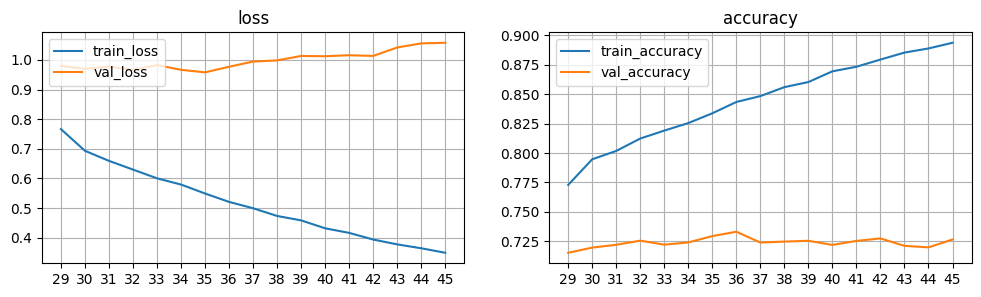

In [91]:
hist = model10.train(train_dl, test_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [92]:
model10.compile(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=(0.1 / 5 ** 3)),
    loss_fn_cls=torch.nn.CrossEntropyLoss,    
)

{'model_name': 'resnet-18-transfer-10',
 'description': 'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD + his augmentation + use '
                'test for validation',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.sgd.SGD'>,
 'optimizer_args': {'weight_decay': 0.0005, 'momentum': 0.9, 'lr': 0.0008},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'NoneType'>,
 'scheduler_args': {},
 'epoch': 35,
 'step': 27370,
 'metrics': {'train_loss': 0.5491076288032531,
             'train_accuracy': 0.83374,
             'val_loss': 0.9579857719421386,
             'val_accuracy': 0.7293}}

Initial val_loss: 0.9580


100%|██████████| 157/157 [00:03<00:00, 51.82it/s]


Epoch 1/1000: train_loss=0.4774, train_accuracy=0.8567, val_loss=0.9381, val_accuracy=0.7344
Saved checkpoint for resnet-18-transfer-10. epoch=36, step=28152. train_loss=0.4774, train_accuracy=0.8567, val_loss=0.9381, val_accuracy=0.7344


100%|██████████| 157/157 [00:03<00:00, 52.20it/s]


Epoch 2/1000: train_loss=0.4575, train_accuracy=0.8649, val_loss=0.9440, val_accuracy=0.7313


100%|██████████| 157/157 [00:02<00:00, 53.33it/s]


Epoch 3/1000: train_loss=0.4454, train_accuracy=0.8691, val_loss=0.9385, val_accuracy=0.7355


100%|██████████| 157/157 [00:02<00:00, 53.31it/s]


Epoch 4/1000: train_loss=0.4349, train_accuracy=0.8726, val_loss=0.9466, val_accuracy=0.7361


100%|██████████| 157/157 [00:02<00:00, 52.99it/s]


Epoch 5/1000: train_loss=0.4259, train_accuracy=0.8736, val_loss=0.9414, val_accuracy=0.7366


100%|██████████| 157/157 [00:02<00:00, 52.60it/s]


Epoch 6/1000: train_loss=0.4146, train_accuracy=0.8783, val_loss=0.9360, val_accuracy=0.7377
Saved checkpoint for resnet-18-transfer-10. epoch=41, step=32062. train_loss=0.4146, train_accuracy=0.8783, val_loss=0.9360, val_accuracy=0.7377


100%|██████████| 157/157 [00:03<00:00, 52.24it/s]


Epoch 7/1000: train_loss=0.4076, train_accuracy=0.8803, val_loss=0.9464, val_accuracy=0.7350


100%|██████████| 157/157 [00:02<00:00, 53.63it/s]


Epoch 8/1000: train_loss=0.3954, train_accuracy=0.8856, val_loss=0.9499, val_accuracy=0.7351


100%|██████████| 157/157 [00:03<00:00, 51.21it/s]


Epoch 9/1000: train_loss=0.3896, train_accuracy=0.8849, val_loss=0.9460, val_accuracy=0.7382


100%|██████████| 157/157 [00:02<00:00, 52.81it/s]


Epoch 10/1000: train_loss=0.3799, train_accuracy=0.8884, val_loss=0.9535, val_accuracy=0.7357


100%|██████████| 157/157 [00:02<00:00, 52.88it/s]


Epoch 11/1000: train_loss=0.3723, train_accuracy=0.8916, val_loss=0.9537, val_accuracy=0.7356


100%|██████████| 157/157 [00:02<00:00, 52.55it/s]


Epoch 12/1000: train_loss=0.3609, train_accuracy=0.8951, val_loss=0.9515, val_accuracy=0.7372


100%|██████████| 157/157 [00:02<00:00, 53.30it/s]


Epoch 13/1000: train_loss=0.3574, train_accuracy=0.8962, val_loss=0.9547, val_accuracy=0.7341


100%|██████████| 157/157 [00:02<00:00, 52.56it/s]


Epoch 14/1000: train_loss=0.3454, train_accuracy=0.8992, val_loss=0.9604, val_accuracy=0.7407


100%|██████████| 157/157 [00:02<00:00, 52.87it/s]


Epoch 15/1000: train_loss=0.3382, train_accuracy=0.9029, val_loss=0.9605, val_accuracy=0.7361


100%|██████████| 157/157 [00:02<00:00, 52.95it/s]


Epoch 16/1000: train_loss=0.3304, train_accuracy=0.9046, val_loss=0.9654, val_accuracy=0.7360
Loaded model resnet-18-transfer-10 from checkpoint. epoch=41, step=32062. train_loss=0.4146, train_accuracy=0.8783, val_loss=0.9360, val_accuracy=0.7377


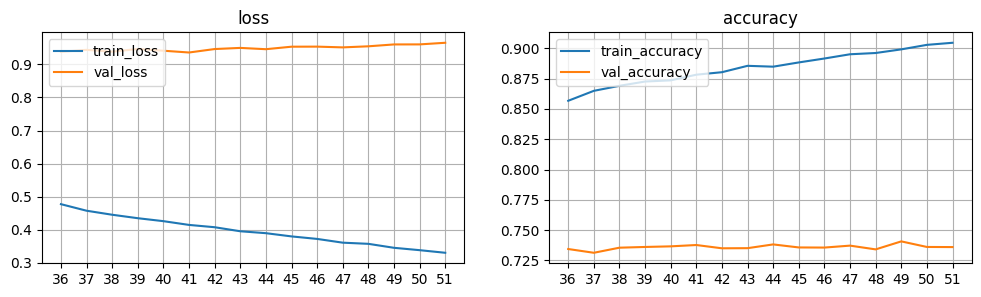

In [93]:
hist = model10.train(train_dl, test_dl, epochs=1000, patience=10, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

## Model 11

In [ ]:
# 0-60      0.1
# 61-120    0.1 / 5 ** 1
# 120-160   0.1 / 5 ** 2
# 160-200   0.1 / 5 ** 3

In [95]:
# utils.delete_model('resnet-18-transfer-02')
model11 = utils.register_model(
    'resnet-18-transfer-11', 
    resnet18(), 
    'CIFAR-100: Trying to replicate success of pytorch-cifar100: SGD + his augmentation + use test for validation + Scheduler'
).setup(
    optimizer_cls=torch.optim.SGD, 
    optimizer_args=dict(weight_decay=5e-4, momentum=0.9, lr=0.1),
    loss_fn_cls=torch.nn.CrossEntropyLoss, 
    scheduler_cls=torch.optim.lr_scheduler.StepLR, 
    scheduler_args=dict(step_size=40, gamma=0.2)
)

resnet-18-transfer-11 fetched from memory.
Trainable params: 11.2 M. Untrainable params: 0.00. Buffers: 6.00 k.
Skipped compilation


Initial val_loss: 4.6062


100%|██████████| 157/157 [00:02<00:00, 52.72it/s]


Epoch 1/160: train_loss=3.9623, train_accuracy=0.0906, val_loss=3.6255, val_accuracy=0.1409
Saved checkpoint for resnet-18-transfer-11. epoch=1, step=782. train_loss=3.9623, train_accuracy=0.0906, val_loss=3.6255, val_accuracy=0.1409


100%|██████████| 157/157 [00:02<00:00, 52.72it/s]


Epoch 2/160: train_loss=3.3362, train_accuracy=0.1858, val_loss=3.0212, val_accuracy=0.2459
Saved checkpoint for resnet-18-transfer-11. epoch=2, step=1564. train_loss=3.3362, train_accuracy=0.1858, val_loss=3.0212, val_accuracy=0.2459


100%|██████████| 157/157 [00:02<00:00, 53.10it/s]


Epoch 3/160: train_loss=2.8754, train_accuracy=0.2710, val_loss=2.7173, val_accuracy=0.3053
Saved checkpoint for resnet-18-transfer-11. epoch=3, step=2346. train_loss=2.8754, train_accuracy=0.2710, val_loss=2.7173, val_accuracy=0.3053


100%|██████████| 157/157 [00:02<00:00, 53.22it/s]


Epoch 4/160: train_loss=2.5468, train_accuracy=0.3340, val_loss=2.5934, val_accuracy=0.3426
Saved checkpoint for resnet-18-transfer-11. epoch=4, step=3128. train_loss=2.5468, train_accuracy=0.3340, val_loss=2.5934, val_accuracy=0.3426


100%|██████████| 157/157 [00:02<00:00, 52.94it/s]


Epoch 5/160: train_loss=2.3310, train_accuracy=0.3796, val_loss=2.4217, val_accuracy=0.3737
Saved checkpoint for resnet-18-transfer-11. epoch=5, step=3910. train_loss=2.3310, train_accuracy=0.3796, val_loss=2.4217, val_accuracy=0.3737


100%|██████████| 157/157 [00:03<00:00, 52.32it/s]


Epoch 6/160: train_loss=2.1761, train_accuracy=0.4175, val_loss=2.2165, val_accuracy=0.4125
Saved checkpoint for resnet-18-transfer-11. epoch=6, step=4692. train_loss=2.1761, train_accuracy=0.4175, val_loss=2.2165, val_accuracy=0.4125


100%|██████████| 157/157 [00:02<00:00, 53.38it/s]


Epoch 7/160: train_loss=2.0801, train_accuracy=0.4410, val_loss=2.0601, val_accuracy=0.4490
Saved checkpoint for resnet-18-transfer-11. epoch=7, step=5474. train_loss=2.0801, train_accuracy=0.4410, val_loss=2.0601, val_accuracy=0.4490


100%|██████████| 157/157 [00:02<00:00, 53.77it/s]


Epoch 8/160: train_loss=2.0167, train_accuracy=0.4531, val_loss=2.0501, val_accuracy=0.4553
Saved checkpoint for resnet-18-transfer-11. epoch=8, step=6256. train_loss=2.0167, train_accuracy=0.4531, val_loss=2.0501, val_accuracy=0.4553


100%|██████████| 157/157 [00:02<00:00, 52.81it/s]


Epoch 9/160: train_loss=1.9641, train_accuracy=0.4668, val_loss=2.0983, val_accuracy=0.4590


100%|██████████| 157/157 [00:03<00:00, 51.98it/s]


Epoch 10/160: train_loss=1.9257, train_accuracy=0.4746, val_loss=2.0216, val_accuracy=0.4718
Saved checkpoint for resnet-18-transfer-11. epoch=10, step=7820. train_loss=1.9257, train_accuracy=0.4746, val_loss=2.0216, val_accuracy=0.4718


100%|██████████| 157/157 [00:02<00:00, 52.64it/s]


Epoch 11/160: train_loss=1.8930, train_accuracy=0.4824, val_loss=1.9889, val_accuracy=0.4713
Saved checkpoint for resnet-18-transfer-11. epoch=11, step=8602. train_loss=1.8930, train_accuracy=0.4824, val_loss=1.9889, val_accuracy=0.4713


100%|██████████| 157/157 [00:02<00:00, 53.19it/s]


Epoch 12/160: train_loss=1.8647, train_accuracy=0.4892, val_loss=2.2723, val_accuracy=0.4271


100%|██████████| 157/157 [00:02<00:00, 53.12it/s]


Epoch 13/160: train_loss=1.8528, train_accuracy=0.4949, val_loss=1.9641, val_accuracy=0.4747
Saved checkpoint for resnet-18-transfer-11. epoch=13, step=10166. train_loss=1.8528, train_accuracy=0.4949, val_loss=1.9641, val_accuracy=0.4747


100%|██████████| 157/157 [00:02<00:00, 52.81it/s]


Epoch 14/160: train_loss=1.8281, train_accuracy=0.4999, val_loss=2.0315, val_accuracy=0.4736


100%|██████████| 157/157 [00:03<00:00, 51.19it/s]


Epoch 15/160: train_loss=1.8175, train_accuracy=0.5033, val_loss=2.0872, val_accuracy=0.4561


100%|██████████| 157/157 [00:03<00:00, 52.30it/s]


Epoch 16/160: train_loss=1.7970, train_accuracy=0.5066, val_loss=2.0533, val_accuracy=0.4596


100%|██████████| 157/157 [00:02<00:00, 53.23it/s]


Epoch 17/160: train_loss=1.7834, train_accuracy=0.5105, val_loss=2.8211, val_accuracy=0.3899


100%|██████████| 157/157 [00:03<00:00, 52.14it/s]


Epoch 18/160: train_loss=1.7745, train_accuracy=0.5120, val_loss=1.9540, val_accuracy=0.4847
Saved checkpoint for resnet-18-transfer-11. epoch=18, step=14076. train_loss=1.7745, train_accuracy=0.5120, val_loss=1.9540, val_accuracy=0.4847


100%|██████████| 157/157 [00:02<00:00, 52.44it/s]


Epoch 19/160: train_loss=1.7624, train_accuracy=0.5177, val_loss=2.1354, val_accuracy=0.4582


100%|██████████| 157/157 [00:03<00:00, 50.47it/s]


Epoch 20/160: train_loss=1.7615, train_accuracy=0.5159, val_loss=2.0455, val_accuracy=0.4619


100%|██████████| 157/157 [00:02<00:00, 52.92it/s]


Epoch 21/160: train_loss=1.7521, train_accuracy=0.5194, val_loss=2.1395, val_accuracy=0.4666


100%|██████████| 157/157 [00:02<00:00, 53.68it/s]


Epoch 22/160: train_loss=1.7471, train_accuracy=0.5222, val_loss=1.9779, val_accuracy=0.4863


100%|██████████| 157/157 [00:02<00:00, 52.94it/s]


Epoch 23/160: train_loss=1.7341, train_accuracy=0.5263, val_loss=2.1719, val_accuracy=0.4537


100%|██████████| 157/157 [00:03<00:00, 51.51it/s]


Epoch 24/160: train_loss=1.7294, train_accuracy=0.5241, val_loss=2.4131, val_accuracy=0.4138


100%|██████████| 157/157 [00:02<00:00, 53.35it/s]


Epoch 25/160: train_loss=1.7272, train_accuracy=0.5251, val_loss=2.0296, val_accuracy=0.4712


100%|██████████| 157/157 [00:03<00:00, 49.19it/s]


Epoch 26/160: train_loss=1.7251, train_accuracy=0.5240, val_loss=1.9894, val_accuracy=0.4778


100%|██████████| 157/157 [00:04<00:00, 38.05it/s]


Epoch 27/160: train_loss=1.7142, train_accuracy=0.5289, val_loss=1.9899, val_accuracy=0.4920


100%|██████████| 157/157 [00:11<00:00, 14.19it/s]


Epoch 28/160: train_loss=1.7046, train_accuracy=0.5296, val_loss=1.8673, val_accuracy=0.5157
Saved checkpoint for resnet-18-transfer-11. epoch=28, step=21896. train_loss=1.7046, train_accuracy=0.5296, val_loss=1.8673, val_accuracy=0.5157


100%|██████████| 157/157 [00:26<00:00,  5.94it/s]


Epoch 29/160: train_loss=1.7036, train_accuracy=0.5300, val_loss=1.8756, val_accuracy=0.5034


100%|██████████| 157/157 [00:09<00:00, 17.16it/s]


Epoch 30/160: train_loss=1.7094, train_accuracy=0.5288, val_loss=2.0251, val_accuracy=0.4782


100%|██████████| 157/157 [00:25<00:00,  6.09it/s]


Epoch 31/160: train_loss=1.6977, train_accuracy=0.5305, val_loss=2.0270, val_accuracy=0.4754


100%|██████████| 157/157 [00:18<00:00,  8.46it/s]


Epoch 32/160: train_loss=1.6995, train_accuracy=0.5317, val_loss=1.9189, val_accuracy=0.4880


100%|██████████| 157/157 [00:18<00:00,  8.61it/s]


Epoch 33/160: train_loss=1.6916, train_accuracy=0.5338, val_loss=2.1511, val_accuracy=0.4601


100%|██████████| 157/157 [00:07<00:00, 21.33it/s]


Epoch 34/160: train_loss=1.6948, train_accuracy=0.5337, val_loss=1.8885, val_accuracy=0.5002


100%|██████████| 157/157 [00:08<00:00, 17.52it/s]


Epoch 35/160: train_loss=1.6901, train_accuracy=0.5339, val_loss=2.0552, val_accuracy=0.4690


100%|██████████| 157/157 [00:07<00:00, 20.71it/s]


Epoch 36/160: train_loss=1.6854, train_accuracy=0.5347, val_loss=1.8755, val_accuracy=0.5035


100%|██████████| 157/157 [00:08<00:00, 17.91it/s]


Epoch 37/160: train_loss=1.6944, train_accuracy=0.5330, val_loss=2.3464, val_accuracy=0.4486


100%|██████████| 157/157 [00:07<00:00, 22.01it/s]


Epoch 38/160: train_loss=1.6807, train_accuracy=0.5344, val_loss=1.8439, val_accuracy=0.5080
Saved checkpoint for resnet-18-transfer-11. epoch=38, step=29716. train_loss=1.6807, train_accuracy=0.5344, val_loss=1.8439, val_accuracy=0.5080


100%|██████████| 157/157 [00:07<00:00, 21.02it/s]


Epoch 39/160: train_loss=1.6802, train_accuracy=0.5373, val_loss=1.9081, val_accuracy=0.5028


100%|██████████| 157/157 [00:09<00:00, 17.40it/s]


Epoch 40/160: train_loss=1.6757, train_accuracy=0.5381, val_loss=1.8535, val_accuracy=0.5072


100%|██████████| 157/157 [00:09<00:00, 16.59it/s]


Epoch 41/160: train_loss=1.6719, train_accuracy=0.5390, val_loss=1.8862, val_accuracy=0.5017


100%|██████████| 157/157 [00:08<00:00, 17.83it/s]


Epoch 42/160: train_loss=1.1067, train_accuracy=0.6814, val_loss=1.1239, val_accuracy=0.6751
Saved checkpoint for resnet-18-transfer-11. epoch=42, step=32844. train_loss=1.1067, train_accuracy=0.6814, val_loss=1.1239, val_accuracy=0.6751


100%|██████████| 157/157 [00:07<00:00, 21.81it/s]


Epoch 43/160: train_loss=0.9664, train_accuracy=0.7171, val_loss=1.1335, val_accuracy=0.6775


100%|██████████| 157/157 [00:06<00:00, 23.67it/s]


Epoch 44/160: train_loss=0.9164, train_accuracy=0.7301, val_loss=1.1178, val_accuracy=0.6796
Saved checkpoint for resnet-18-transfer-11. epoch=44, step=34408. train_loss=0.9164, train_accuracy=0.7301, val_loss=1.1178, val_accuracy=0.6796


100%|██████████| 157/157 [00:07<00:00, 21.93it/s]


Epoch 45/160: train_loss=0.8924, train_accuracy=0.7349, val_loss=1.1880, val_accuracy=0.6646


100%|██████████| 157/157 [00:14<00:00, 10.63it/s]


Epoch 46/160: train_loss=0.8795, train_accuracy=0.7392, val_loss=1.2481, val_accuracy=0.6632


100%|██████████| 157/157 [00:08<00:00, 18.13it/s]


Epoch 47/160: train_loss=0.8762, train_accuracy=0.7395, val_loss=1.2377, val_accuracy=0.6625


100%|██████████| 157/157 [00:09<00:00, 17.18it/s]


Epoch 48/160: train_loss=0.8775, train_accuracy=0.7389, val_loss=1.2510, val_accuracy=0.6593


100%|██████████| 157/157 [00:06<00:00, 24.27it/s]


Epoch 49/160: train_loss=0.8616, train_accuracy=0.7422, val_loss=1.2440, val_accuracy=0.6600


100%|██████████| 157/157 [00:14<00:00, 10.78it/s]


Epoch 50/160: train_loss=0.8644, train_accuracy=0.7408, val_loss=1.2799, val_accuracy=0.6561


100%|██████████| 157/157 [00:10<00:00, 15.18it/s]


Epoch 51/160: train_loss=0.8560, train_accuracy=0.7432, val_loss=1.2402, val_accuracy=0.6599


100%|██████████| 157/157 [00:19<00:00,  8.14it/s]


Epoch 52/160: train_loss=0.8410, train_accuracy=0.7478, val_loss=1.3039, val_accuracy=0.6537


100%|██████████| 157/157 [00:12<00:00, 12.68it/s]


Epoch 53/160: train_loss=0.8331, train_accuracy=0.7509, val_loss=1.3193, val_accuracy=0.6544


100%|██████████| 157/157 [00:17<00:00,  9.18it/s]


Epoch 54/160: train_loss=0.8280, train_accuracy=0.7492, val_loss=1.3050, val_accuracy=0.6555


100%|██████████| 157/157 [00:12<00:00, 12.62it/s]


Epoch 55/160: train_loss=0.8178, train_accuracy=0.7554, val_loss=1.2521, val_accuracy=0.6608


100%|██████████| 157/157 [00:12<00:00, 12.90it/s]


Epoch 56/160: train_loss=0.8105, train_accuracy=0.7569, val_loss=1.2768, val_accuracy=0.6587


100%|██████████| 157/157 [00:10<00:00, 14.45it/s]


Epoch 57/160: train_loss=0.7941, train_accuracy=0.7599, val_loss=1.3346, val_accuracy=0.6497


100%|██████████| 157/157 [00:16<00:00,  9.53it/s]


Epoch 58/160: train_loss=0.7938, train_accuracy=0.7623, val_loss=1.2614, val_accuracy=0.6625


100%|██████████| 157/157 [00:06<00:00, 24.34it/s]


Epoch 59/160: train_loss=0.7773, train_accuracy=0.7645, val_loss=1.3116, val_accuracy=0.6516


100%|██████████| 157/157 [00:08<00:00, 17.88it/s]


Epoch 60/160: train_loss=0.7683, train_accuracy=0.7688, val_loss=1.3036, val_accuracy=0.6563


100%|██████████| 157/157 [00:08<00:00, 19.20it/s]


Epoch 61/160: train_loss=0.7575, train_accuracy=0.7726, val_loss=1.2969, val_accuracy=0.6581


100%|██████████| 157/157 [00:08<00:00, 17.63it/s]


Epoch 62/160: train_loss=0.7458, train_accuracy=0.7739, val_loss=1.3499, val_accuracy=0.6454


100%|██████████| 157/157 [00:07<00:00, 21.07it/s]


Epoch 63/160: train_loss=0.7489, train_accuracy=0.7708, val_loss=1.3019, val_accuracy=0.6545


100%|██████████| 157/157 [00:08<00:00, 17.54it/s]


Epoch 64/160: train_loss=0.7329, train_accuracy=0.7788, val_loss=1.2919, val_accuracy=0.6584


100%|██████████| 157/157 [00:07<00:00, 20.37it/s]


Epoch 65/160: train_loss=0.7312, train_accuracy=0.7778, val_loss=1.3203, val_accuracy=0.6520


100%|██████████| 157/157 [00:09<00:00, 15.80it/s]


Epoch 66/160: train_loss=0.7177, train_accuracy=0.7830, val_loss=1.4109, val_accuracy=0.6423


100%|██████████| 157/157 [00:05<00:00, 28.68it/s]


Epoch 67/160: train_loss=0.7128, train_accuracy=0.7837, val_loss=1.3351, val_accuracy=0.6591


100%|██████████| 157/157 [00:08<00:00, 18.36it/s]


Epoch 68/160: train_loss=0.7098, train_accuracy=0.7853, val_loss=1.3127, val_accuracy=0.6625


100%|██████████| 157/157 [00:06<00:00, 23.52it/s]


Epoch 69/160: train_loss=0.7063, train_accuracy=0.7847, val_loss=1.3203, val_accuracy=0.6556


100%|██████████| 157/157 [00:06<00:00, 22.44it/s]


Epoch 70/160: train_loss=0.6908, train_accuracy=0.7894, val_loss=1.3328, val_accuracy=0.6571


100%|██████████| 157/157 [00:06<00:00, 24.94it/s]


Epoch 71/160: train_loss=0.6931, train_accuracy=0.7884, val_loss=1.2537, val_accuracy=0.6629


100%|██████████| 157/157 [00:08<00:00, 17.73it/s]


Epoch 72/160: train_loss=0.6846, train_accuracy=0.7932, val_loss=1.3278, val_accuracy=0.6605


100%|██████████| 157/157 [00:10<00:00, 15.43it/s]


Epoch 73/160: train_loss=0.6825, train_accuracy=0.7943, val_loss=1.3298, val_accuracy=0.6607


100%|██████████| 157/157 [00:10<00:00, 15.68it/s]


Epoch 74/160: train_loss=0.6737, train_accuracy=0.7943, val_loss=1.2862, val_accuracy=0.6677


100%|██████████| 157/157 [00:05<00:00, 27.59it/s]


Epoch 75/160: train_loss=0.6562, train_accuracy=0.7984, val_loss=1.3427, val_accuracy=0.6581


100%|██████████| 157/157 [00:11<00:00, 13.91it/s]


Epoch 76/160: train_loss=0.6710, train_accuracy=0.7947, val_loss=1.3462, val_accuracy=0.6553


100%|██████████| 157/157 [00:08<00:00, 18.77it/s]


Epoch 77/160: train_loss=0.6628, train_accuracy=0.7971, val_loss=1.3531, val_accuracy=0.6624


100%|██████████| 157/157 [00:04<00:00, 33.33it/s]


Epoch 78/160: train_loss=0.6646, train_accuracy=0.7984, val_loss=1.2787, val_accuracy=0.6729


100%|██████████| 157/157 [00:05<00:00, 26.96it/s]


Epoch 79/160: train_loss=0.6469, train_accuracy=0.8017, val_loss=1.2370, val_accuracy=0.6729


100%|██████████| 157/157 [00:05<00:00, 27.49it/s]


Epoch 80/160: train_loss=0.6595, train_accuracy=0.7998, val_loss=1.2506, val_accuracy=0.6748


100%|██████████| 157/157 [00:07<00:00, 21.70it/s]


Epoch 81/160: train_loss=0.6411, train_accuracy=0.8045, val_loss=1.3779, val_accuracy=0.6533


100%|██████████| 157/157 [00:07<00:00, 20.19it/s]


Epoch 82/160: train_loss=0.3329, train_accuracy=0.9032, val_loss=0.9734, val_accuracy=0.7434
Saved checkpoint for resnet-18-transfer-11. epoch=82, step=64124. train_loss=0.3329, train_accuracy=0.9032, val_loss=0.9734, val_accuracy=0.7434


100%|██████████| 157/157 [00:07<00:00, 21.66it/s]


Epoch 83/160: train_loss=0.2315, train_accuracy=0.9360, val_loss=0.9701, val_accuracy=0.7474
Saved checkpoint for resnet-18-transfer-11. epoch=83, step=64906. train_loss=0.2315, train_accuracy=0.9360, val_loss=0.9701, val_accuracy=0.7474


100%|██████████| 157/157 [00:06<00:00, 23.55it/s]


Epoch 84/160: train_loss=0.1911, train_accuracy=0.9495, val_loss=0.9748, val_accuracy=0.7522


100%|██████████| 157/157 [00:13<00:00, 11.98it/s]


Epoch 85/160: train_loss=0.1660, train_accuracy=0.9573, val_loss=0.9895, val_accuracy=0.7491


100%|██████████| 157/157 [00:18<00:00,  8.61it/s]


Epoch 86/160: train_loss=0.1487, train_accuracy=0.9614, val_loss=0.9931, val_accuracy=0.7502


100%|██████████| 157/157 [00:17<00:00,  9.06it/s]


Epoch 87/160: train_loss=0.1329, train_accuracy=0.9668, val_loss=1.0003, val_accuracy=0.7462


100%|██████████| 157/157 [00:07<00:00, 21.90it/s]


Epoch 88/160: train_loss=0.1227, train_accuracy=0.9709, val_loss=0.9980, val_accuracy=0.7510


100%|██████████| 157/157 [00:06<00:00, 25.21it/s]


Epoch 89/160: train_loss=0.1156, train_accuracy=0.9725, val_loss=1.0088, val_accuracy=0.7493


100%|██████████| 157/157 [00:06<00:00, 22.70it/s]


Epoch 90/160: train_loss=0.1074, train_accuracy=0.9742, val_loss=1.0062, val_accuracy=0.7469


100%|██████████| 157/157 [00:05<00:00, 26.56it/s]


Epoch 91/160: train_loss=0.0991, train_accuracy=0.9776, val_loss=1.0066, val_accuracy=0.7500


100%|██████████| 157/157 [00:07<00:00, 21.77it/s]


Epoch 92/160: train_loss=0.0957, train_accuracy=0.9788, val_loss=1.0137, val_accuracy=0.7521


100%|██████████| 157/157 [00:07<00:00, 22.25it/s]


Epoch 93/160: train_loss=0.0883, train_accuracy=0.9801, val_loss=1.0308, val_accuracy=0.7461


100%|██████████| 157/157 [00:07<00:00, 21.54it/s]


Epoch 94/160: train_loss=0.0854, train_accuracy=0.9813, val_loss=1.0280, val_accuracy=0.7481


100%|██████████| 157/157 [00:29<00:00,  5.23it/s]


Epoch 95/160: train_loss=0.0811, train_accuracy=0.9826, val_loss=1.0137, val_accuracy=0.7507


100%|██████████| 157/157 [00:04<00:00, 33.65it/s]


Epoch 96/160: train_loss=0.0783, train_accuracy=0.9837, val_loss=1.0168, val_accuracy=0.7511


100%|██████████| 157/157 [00:04<00:00, 35.09it/s]


Epoch 97/160: train_loss=0.0735, train_accuracy=0.9852, val_loss=1.0204, val_accuracy=0.7476


100%|██████████| 157/157 [00:04<00:00, 36.24it/s]


Epoch 98/160: train_loss=0.0748, train_accuracy=0.9845, val_loss=1.0438, val_accuracy=0.7460


100%|██████████| 157/157 [00:07<00:00, 21.47it/s]


Epoch 99/160: train_loss=0.0745, train_accuracy=0.9840, val_loss=1.0312, val_accuracy=0.7442


100%|██████████| 157/157 [00:10<00:00, 14.32it/s]


Epoch 100/160: train_loss=0.0703, train_accuracy=0.9864, val_loss=1.0266, val_accuracy=0.7466


100%|██████████| 157/157 [00:07<00:00, 22.24it/s]


Epoch 101/160: train_loss=0.0669, train_accuracy=0.9873, val_loss=1.0207, val_accuracy=0.7491


100%|██████████| 157/157 [00:06<00:00, 24.95it/s]


Epoch 102/160: train_loss=0.0657, train_accuracy=0.9870, val_loss=1.0204, val_accuracy=0.7482


100%|██████████| 157/157 [00:05<00:00, 27.42it/s]


Epoch 103/160: train_loss=0.0693, train_accuracy=0.9854, val_loss=1.0393, val_accuracy=0.7475


100%|██████████| 157/157 [02:38<00:00,  1.01s/it]


Epoch 104/160: train_loss=0.0670, train_accuracy=0.9868, val_loss=1.0512, val_accuracy=0.7454


100%|██████████| 157/157 [00:08<00:00, 17.57it/s]


Epoch 105/160: train_loss=0.0664, train_accuracy=0.9870, val_loss=1.0347, val_accuracy=0.7508


100%|██████████| 157/157 [00:08<00:00, 18.17it/s]


Epoch 106/160: train_loss=0.0664, train_accuracy=0.9869, val_loss=1.0428, val_accuracy=0.7482


100%|██████████| 157/157 [00:14<00:00, 10.67it/s]


Epoch 107/160: train_loss=0.0651, train_accuracy=0.9870, val_loss=1.0443, val_accuracy=0.7436


100%|██████████| 157/157 [00:08<00:00, 19.38it/s]


Epoch 108/160: train_loss=0.0673, train_accuracy=0.9868, val_loss=1.0608, val_accuracy=0.7449


100%|██████████| 157/157 [00:15<00:00,  9.82it/s]


Epoch 109/160: train_loss=0.0713, train_accuracy=0.9849, val_loss=1.0471, val_accuracy=0.7487


100%|██████████| 157/157 [00:08<00:00, 19.56it/s]


Epoch 110/160: train_loss=0.0711, train_accuracy=0.9850, val_loss=1.0790, val_accuracy=0.7405


100%|██████████| 157/157 [00:06<00:00, 23.35it/s]


Epoch 111/160: train_loss=0.0760, train_accuracy=0.9836, val_loss=1.0712, val_accuracy=0.7416


100%|██████████| 157/157 [00:09<00:00, 15.91it/s]


Epoch 112/160: train_loss=0.0684, train_accuracy=0.9861, val_loss=1.0982, val_accuracy=0.7379


100%|██████████| 157/157 [00:09<00:00, 17.32it/s]


Epoch 113/160: train_loss=0.0714, train_accuracy=0.9852, val_loss=1.0956, val_accuracy=0.7397


100%|██████████| 157/157 [00:09<00:00, 17.36it/s]


Epoch 114/160: train_loss=0.0731, train_accuracy=0.9848, val_loss=1.0961, val_accuracy=0.7354


100%|██████████| 157/157 [00:09<00:00, 16.68it/s]


Epoch 115/160: train_loss=0.0796, train_accuracy=0.9826, val_loss=1.1165, val_accuracy=0.7335


100%|██████████| 157/157 [00:07<00:00, 21.42it/s]


Epoch 116/160: train_loss=0.0817, train_accuracy=0.9825, val_loss=1.1099, val_accuracy=0.7297


100%|██████████| 157/157 [00:07<00:00, 20.54it/s]


Epoch 117/160: train_loss=0.0778, train_accuracy=0.9832, val_loss=1.1016, val_accuracy=0.7336


100%|██████████| 157/157 [00:17<00:00,  8.92it/s]


Epoch 118/160: train_loss=0.0798, train_accuracy=0.9832, val_loss=1.1190, val_accuracy=0.7308


100%|██████████| 157/157 [00:07<00:00, 20.07it/s]


Epoch 119/160: train_loss=0.0871, train_accuracy=0.9807, val_loss=1.1158, val_accuracy=0.7265


100%|██████████| 157/157 [00:07<00:00, 21.64it/s]


Epoch 120/160: train_loss=0.0888, train_accuracy=0.9799, val_loss=1.1297, val_accuracy=0.7313


100%|██████████| 157/157 [00:04<00:00, 39.09it/s]


Epoch 121/160: train_loss=0.0943, train_accuracy=0.9786, val_loss=1.1547, val_accuracy=0.7244


100%|██████████| 157/157 [00:07<00:00, 19.79it/s]


Epoch 122/160: train_loss=0.0533, train_accuracy=0.9902, val_loss=1.0194, val_accuracy=0.7485


100%|██████████| 157/157 [00:08<00:00, 17.73it/s]


Epoch 123/160: train_loss=0.0383, train_accuracy=0.9942, val_loss=1.0098, val_accuracy=0.7540


100%|██████████| 157/157 [00:08<00:00, 18.11it/s]


Epoch 124/160: train_loss=0.0335, train_accuracy=0.9950, val_loss=1.0086, val_accuracy=0.7536


100%|██████████| 157/157 [00:21<00:00,  7.28it/s]


Epoch 125/160: train_loss=0.0300, train_accuracy=0.9959, val_loss=1.0060, val_accuracy=0.7549


100%|██████████| 157/157 [00:03<00:00, 42.11it/s]


Epoch 126/160: train_loss=0.0291, train_accuracy=0.9962, val_loss=1.0046, val_accuracy=0.7551


100%|██████████| 157/157 [00:03<00:00, 43.19it/s]


Epoch 127/160: train_loss=0.0270, train_accuracy=0.9967, val_loss=0.9994, val_accuracy=0.7553


100%|██████████| 157/157 [00:03<00:00, 43.19it/s]


Epoch 128/160: train_loss=0.0269, train_accuracy=0.9964, val_loss=1.0028, val_accuracy=0.7554


100%|██████████| 157/157 [00:03<00:00, 43.10it/s]


Epoch 129/160: train_loss=0.0248, train_accuracy=0.9971, val_loss=0.9955, val_accuracy=0.7574


100%|██████████| 157/157 [00:03<00:00, 43.26it/s]


Epoch 130/160: train_loss=0.0233, train_accuracy=0.9979, val_loss=0.9879, val_accuracy=0.7565


100%|██████████| 157/157 [00:03<00:00, 43.09it/s]


Epoch 131/160: train_loss=0.0235, train_accuracy=0.9974, val_loss=0.9866, val_accuracy=0.7603


100%|██████████| 157/157 [00:03<00:00, 43.14it/s]


Epoch 132/160: train_loss=0.0224, train_accuracy=0.9974, val_loss=0.9958, val_accuracy=0.7558


100%|██████████| 157/157 [00:03<00:00, 41.88it/s]


Epoch 133/160: train_loss=0.0217, train_accuracy=0.9977, val_loss=0.9896, val_accuracy=0.7577


100%|██████████| 157/157 [00:03<00:00, 43.00it/s]


Epoch 134/160: train_loss=0.0223, train_accuracy=0.9975, val_loss=0.9899, val_accuracy=0.7602


100%|██████████| 157/157 [00:03<00:00, 42.91it/s]


Epoch 135/160: train_loss=0.0208, train_accuracy=0.9980, val_loss=0.9886, val_accuracy=0.7592


100%|██████████| 157/157 [00:03<00:00, 42.98it/s]


Epoch 136/160: train_loss=0.0204, train_accuracy=0.9981, val_loss=0.9946, val_accuracy=0.7579


100%|██████████| 157/157 [00:03<00:00, 43.43it/s]


Epoch 137/160: train_loss=0.0202, train_accuracy=0.9983, val_loss=0.9853, val_accuracy=0.7553


100%|██████████| 157/157 [00:04<00:00, 36.61it/s]


Epoch 138/160: train_loss=0.0195, train_accuracy=0.9980, val_loss=0.9834, val_accuracy=0.7583


100%|██████████| 157/157 [00:04<00:00, 38.08it/s]


Epoch 139/160: train_loss=0.0189, train_accuracy=0.9984, val_loss=0.9881, val_accuracy=0.7587


100%|██████████| 157/157 [00:09<00:00, 15.85it/s]


Epoch 140/160: train_loss=0.0203, train_accuracy=0.9980, val_loss=0.9869, val_accuracy=0.7572


100%|██████████| 157/157 [00:09<00:00, 16.56it/s]


Epoch 141/160: train_loss=0.0203, train_accuracy=0.9979, val_loss=0.9860, val_accuracy=0.7582


100%|██████████| 157/157 [00:04<00:00, 31.70it/s]


Epoch 142/160: train_loss=0.0193, train_accuracy=0.9981, val_loss=0.9810, val_accuracy=0.7577


100%|██████████| 157/157 [00:09<00:00, 15.93it/s]


Epoch 143/160: train_loss=0.0189, train_accuracy=0.9984, val_loss=0.9800, val_accuracy=0.7557


100%|██████████| 157/157 [00:09<00:00, 16.02it/s]


Epoch 144/160: train_loss=0.0183, train_accuracy=0.9984, val_loss=0.9743, val_accuracy=0.7585


100%|██████████| 157/157 [00:22<00:00,  6.91it/s]


Epoch 145/160: train_loss=0.0186, train_accuracy=0.9984, val_loss=0.9765, val_accuracy=0.7578


100%|██████████| 157/157 [00:22<00:00,  6.96it/s]


Epoch 146/160: train_loss=0.0186, train_accuracy=0.9984, val_loss=0.9757, val_accuracy=0.7571


100%|██████████| 157/157 [00:22<00:00,  6.87it/s]


Epoch 147/160: train_loss=0.0189, train_accuracy=0.9979, val_loss=0.9751, val_accuracy=0.7610


100%|██████████| 157/157 [00:22<00:00,  6.95it/s]


Epoch 148/160: train_loss=0.0186, train_accuracy=0.9983, val_loss=0.9727, val_accuracy=0.7596


100%|██████████| 157/157 [00:22<00:00,  6.84it/s]


Epoch 149/160: train_loss=0.0184, train_accuracy=0.9985, val_loss=0.9703, val_accuracy=0.7620


100%|██████████| 157/157 [00:21<00:00,  7.15it/s]


Epoch 150/160: train_loss=0.0183, train_accuracy=0.9984, val_loss=0.9721, val_accuracy=0.7578


100%|██████████| 157/157 [00:07<00:00, 22.04it/s]


Epoch 151/160: train_loss=0.0181, train_accuracy=0.9984, val_loss=0.9703, val_accuracy=0.7569


100%|██████████| 157/157 [00:07<00:00, 20.60it/s]


Epoch 152/160: train_loss=0.0179, train_accuracy=0.9983, val_loss=0.9748, val_accuracy=0.7577


100%|██████████| 157/157 [00:08<00:00, 17.96it/s]


Epoch 153/160: train_loss=0.0184, train_accuracy=0.9981, val_loss=0.9678, val_accuracy=0.7587
Saved checkpoint for resnet-18-transfer-11. epoch=153, step=119646. train_loss=0.0184, train_accuracy=0.9981, val_loss=0.9678, val_accuracy=0.7587


100%|██████████| 157/157 [00:11<00:00, 14.16it/s]


Epoch 154/160: train_loss=0.0185, train_accuracy=0.9982, val_loss=0.9643, val_accuracy=0.7596
Saved checkpoint for resnet-18-transfer-11. epoch=154, step=120428. train_loss=0.0185, train_accuracy=0.9982, val_loss=0.9643, val_accuracy=0.7596


100%|██████████| 157/157 [00:08<00:00, 19.44it/s]


Epoch 155/160: train_loss=0.0181, train_accuracy=0.9983, val_loss=0.9676, val_accuracy=0.7576


100%|██████████| 157/157 [00:03<00:00, 48.26it/s]


Epoch 156/160: train_loss=0.0172, train_accuracy=0.9987, val_loss=0.9638, val_accuracy=0.7600
Saved checkpoint for resnet-18-transfer-11. epoch=156, step=121992. train_loss=0.0172, train_accuracy=0.9987, val_loss=0.9638, val_accuracy=0.7600


100%|██████████| 157/157 [00:06<00:00, 23.72it/s]


Epoch 157/160: train_loss=0.0176, train_accuracy=0.9986, val_loss=0.9663, val_accuracy=0.7583


100%|██████████| 157/157 [00:06<00:00, 23.67it/s]


Epoch 158/160: train_loss=0.0175, train_accuracy=0.9986, val_loss=0.9679, val_accuracy=0.7586


100%|██████████| 157/157 [00:24<00:00,  6.44it/s]


Epoch 159/160: train_loss=0.0172, train_accuracy=0.9987, val_loss=0.9661, val_accuracy=0.7603


100%|██████████| 157/157 [00:02<00:00, 53.24it/s]


Epoch 160/160: train_loss=0.0169, train_accuracy=0.9988, val_loss=0.9673, val_accuracy=0.7595
Loaded model resnet-18-transfer-11 from checkpoint. epoch=156, step=121992. train_loss=0.0172, train_accuracy=0.9987, val_loss=0.9638, val_accuracy=0.7600


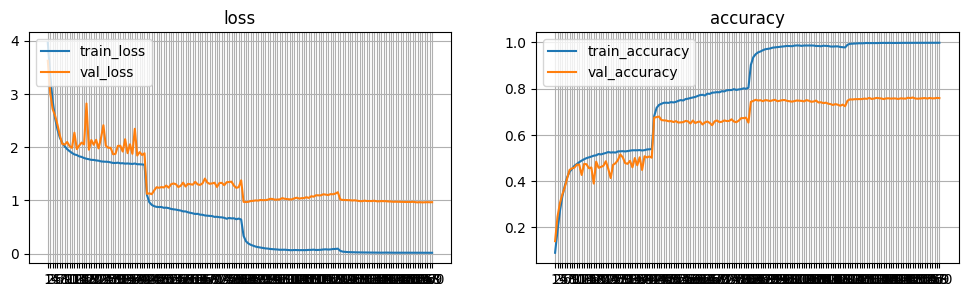

In [96]:
hist = model11.train(train_dl, test_dl, epochs=160, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [107]:
file_path = '../ckpts/04-resnet/resnet18-11-hist.pkl'

if Path(file_path).exists():
    with open(file_path, 'rb') as f:
        best_hist = pickle.load(f)
else:
    with open(file_path, 'wb') as f:
        best_hist = dict(hist)
        pickle.dump(best_hist, f)

In [135]:
# utils.delete_model('resnet-18-transfer-02')
model12 = utils.register_model(
    'resnet-18-transfer-12', 
    resnet18(), 
    'CIFAR-100: now that I replicated 0.76 accuracy on pytorch-cifar100 with SGD + his augmentation + use test for validation + Scheduler, will try Adam'
).setup(
    optimizer_cls=torch.optim.Adam, 
    optimizer_args=dict(weight_decay=5e-4, lr=0.001),
    loss_fn_cls=torch.nn.CrossEntropyLoss, 
    scheduler_cls=torch.optim.lr_scheduler.StepLR, 
    scheduler_args=dict(step_size=40, gamma=0.2)
)

Loaded model resnet-18-transfer-12 from checkpoint. epoch=46, step=35972. train_loss=0.7801, train_accuracy=0.7677, val_loss=1.0446, val_accuracy=0.7063
resnet-18-transfer-12 registered.
Trainable params: 11.2 M. Untrainable params: 0.00. Buffers: 6.00 k.
Skipped compilation


In [131]:
hist = model12.train(train_dl, test_dl, epochs=160, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/amitaharoni/miniconda3/envs/torch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4210/1980469359.py", line 1, in <module>
    hist = model12.train(train_dl, test_dl, epochs=160, metrics=[utils.metric_accuracy])
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/amitaharoni/workspace/cv-sprint/models/utils.py", line 325, in train
  File "/home/amitaharoni/workspace/cv-sprint/models/utils.py", line 435, in evaluate
    self.model.eval()
                      
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/amitaharoni/miniconda3/envs/torch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
      

In [114]:
file_path = '../ckpts/04-resnet/resnet18-12-hist-before-manual.pkl'

if Path(file_path).exists():
    with open(file_path, 'rb') as f:
        best_hist = pickle.load(f)
else:
    with open(file_path, 'wb') as f:
        best_hist = dict(hist)
        pickle.dump(best_hist, f)

In [139]:
model13 = model12.fork(
    'resnet-18-transfer-13', 
    'CIFAR-100: Fork of 12 for cosine annealing attempt'
).compile(
    optimizer_cls=torch.optim.Adam, 
    optimizer_args=dict(weight_decay=5e-4, lr=0.001),
    loss_fn_cls=torch.nn.CrossEntropyLoss, 
    scheduler_cls=torch.optim.lr_scheduler.CosineAnnealingLR, 
    scheduler_args=dict(T_max=20)
)

resnet-18-transfer-13 fetched from memory.


Initial val_loss: 1.0446


100%|██████████| 157/157 [00:02<00:00, 54.32it/s]


Epoch 1/160: train_loss=1.1655, train_accuracy=0.6615, val_loss=1.3810, val_accuracy=0.6190


100%|██████████| 157/157 [00:02<00:00, 53.19it/s]


Epoch 2/160: train_loss=1.1838, train_accuracy=0.6570, val_loss=1.3258, val_accuracy=0.6330


100%|██████████| 157/157 [00:02<00:00, 54.88it/s]


Epoch 3/160: train_loss=1.1759, train_accuracy=0.6622, val_loss=1.3461, val_accuracy=0.6303


100%|██████████| 157/157 [00:02<00:00, 54.69it/s]


Epoch 4/160: train_loss=1.1617, train_accuracy=0.6640, val_loss=1.3572, val_accuracy=0.6240


100%|██████████| 157/157 [00:02<00:00, 54.60it/s]


Epoch 5/160: train_loss=1.1416, train_accuracy=0.6667, val_loss=1.3129, val_accuracy=0.6314


100%|██████████| 157/157 [00:02<00:00, 54.65it/s]


Epoch 6/160: train_loss=1.1223, train_accuracy=0.6730, val_loss=1.3040, val_accuracy=0.6417


100%|██████████| 157/157 [00:02<00:00, 54.60it/s]


Epoch 7/160: train_loss=1.0841, train_accuracy=0.6838, val_loss=1.2557, val_accuracy=0.6479


100%|██████████| 157/157 [00:02<00:00, 54.12it/s]


Epoch 8/160: train_loss=1.0604, train_accuracy=0.6900, val_loss=1.2789, val_accuracy=0.6440


100%|██████████| 157/157 [00:02<00:00, 54.67it/s]


Epoch 9/160: train_loss=1.0093, train_accuracy=0.7048, val_loss=1.2217, val_accuracy=0.6608


100%|██████████| 157/157 [00:02<00:00, 53.90it/s]


Epoch 10/160: train_loss=0.9634, train_accuracy=0.7164, val_loss=1.2410, val_accuracy=0.6581


100%|██████████| 157/157 [00:02<00:00, 54.59it/s]


Epoch 11/160: train_loss=0.9166, train_accuracy=0.7311, val_loss=1.1794, val_accuracy=0.6733


100%|██████████| 157/157 [00:02<00:00, 54.80it/s]


Epoch 12/160: train_loss=0.8602, train_accuracy=0.7466, val_loss=1.1065, val_accuracy=0.6907


100%|██████████| 157/157 [00:02<00:00, 55.49it/s]


Epoch 13/160: train_loss=0.8052, train_accuracy=0.7607, val_loss=1.1077, val_accuracy=0.6901


100%|██████████| 157/157 [00:02<00:00, 54.50it/s]


Epoch 14/160: train_loss=0.7539, train_accuracy=0.7747, val_loss=1.0668, val_accuracy=0.7023


100%|██████████| 157/157 [00:02<00:00, 55.09it/s]


Epoch 15/160: train_loss=0.6974, train_accuracy=0.7921, val_loss=1.0397, val_accuracy=0.7099
Saved checkpoint for resnet-18-transfer-13. epoch=61, step=47702. train_loss=0.6974, train_accuracy=0.7921, val_loss=1.0397, val_accuracy=0.7099


100%|██████████| 157/157 [00:02<00:00, 54.61it/s]


Epoch 16/160: train_loss=0.6487, train_accuracy=0.8071, val_loss=1.0335, val_accuracy=0.7094
Saved checkpoint for resnet-18-transfer-13. epoch=62, step=48484. train_loss=0.6487, train_accuracy=0.8071, val_loss=1.0335, val_accuracy=0.7094


100%|██████████| 157/157 [00:02<00:00, 55.35it/s]


Epoch 17/160: train_loss=0.6112, train_accuracy=0.8177, val_loss=1.0071, val_accuracy=0.7204
Saved checkpoint for resnet-18-transfer-13. epoch=63, step=49266. train_loss=0.6112, train_accuracy=0.8177, val_loss=1.0071, val_accuracy=0.7204


100%|██████████| 157/157 [00:02<00:00, 55.40it/s]


Epoch 18/160: train_loss=0.5803, train_accuracy=0.8275, val_loss=1.0019, val_accuracy=0.7232
Saved checkpoint for resnet-18-transfer-13. epoch=64, step=50048. train_loss=0.5803, train_accuracy=0.8275, val_loss=1.0019, val_accuracy=0.7232


100%|██████████| 157/157 [00:02<00:00, 55.25it/s]


Epoch 19/160: train_loss=0.5560, train_accuracy=0.8333, val_loss=0.9956, val_accuracy=0.7249
Saved checkpoint for resnet-18-transfer-13. epoch=65, step=50830. train_loss=0.5560, train_accuracy=0.8333, val_loss=0.9956, val_accuracy=0.7249


100%|██████████| 157/157 [00:02<00:00, 55.46it/s]


Epoch 20/160: train_loss=0.5440, train_accuracy=0.8393, val_loss=0.9956, val_accuracy=0.7256


100%|██████████| 157/157 [00:02<00:00, 55.15it/s]


Epoch 21/160: train_loss=0.5330, train_accuracy=0.8420, val_loss=0.9885, val_accuracy=0.7263
Saved checkpoint for resnet-18-transfer-13. epoch=67, step=52394. train_loss=0.5330, train_accuracy=0.8420, val_loss=0.9885, val_accuracy=0.7263


100%|██████████| 157/157 [00:02<00:00, 55.12it/s]


Epoch 22/160: train_loss=0.5360, train_accuracy=0.8422, val_loss=0.9957, val_accuracy=0.7254


100%|██████████| 157/157 [00:02<00:00, 54.04it/s]


Epoch 23/160: train_loss=0.5421, train_accuracy=0.8392, val_loss=0.9990, val_accuracy=0.7251


100%|██████████| 157/157 [00:02<00:00, 54.75it/s]


Epoch 24/160: train_loss=0.5488, train_accuracy=0.8368, val_loss=1.0043, val_accuracy=0.7257


100%|██████████| 157/157 [00:02<00:00, 53.54it/s]


Epoch 25/160: train_loss=0.5663, train_accuracy=0.8299, val_loss=1.0291, val_accuracy=0.7184


100%|██████████| 157/157 [00:02<00:00, 54.00it/s]


Epoch 26/160: train_loss=0.5899, train_accuracy=0.8233, val_loss=1.0509, val_accuracy=0.7108


100%|██████████| 157/157 [00:02<00:00, 54.69it/s]


Epoch 27/160: train_loss=0.6210, train_accuracy=0.8136, val_loss=1.0783, val_accuracy=0.7034


100%|██████████| 157/157 [00:02<00:00, 54.84it/s]


Epoch 28/160: train_loss=0.6681, train_accuracy=0.7966, val_loss=1.1140, val_accuracy=0.7006


100%|██████████| 157/157 [00:03<00:00, 51.34it/s]


Epoch 29/160: train_loss=0.7209, train_accuracy=0.7806, val_loss=1.1336, val_accuracy=0.6890


100%|██████████| 157/157 [00:02<00:00, 55.38it/s]


Epoch 30/160: train_loss=0.7773, train_accuracy=0.7646, val_loss=1.1725, val_accuracy=0.6843


100%|██████████| 157/157 [00:02<00:00, 55.00it/s]


Epoch 31/160: train_loss=0.8261, train_accuracy=0.7517, val_loss=1.2283, val_accuracy=0.6677


100%|██████████| 157/157 [00:02<00:00, 55.11it/s]


Epoch 32/160: train_loss=0.8871, train_accuracy=0.7331, val_loss=1.2337, val_accuracy=0.6660


100%|██████████| 157/157 [00:02<00:00, 54.61it/s]


Epoch 33/160: train_loss=0.9273, train_accuracy=0.7239, val_loss=1.2567, val_accuracy=0.6496


100%|██████████| 157/157 [00:02<00:00, 55.26it/s]


Epoch 34/160: train_loss=0.9816, train_accuracy=0.7089, val_loss=1.2424, val_accuracy=0.6548


100%|██████████| 157/157 [00:02<00:00, 54.67it/s]


Epoch 35/160: train_loss=1.0127, train_accuracy=0.7004, val_loss=1.3107, val_accuracy=0.6430


100%|██████████| 157/157 [00:02<00:00, 54.05it/s]


Epoch 36/160: train_loss=1.0471, train_accuracy=0.6931, val_loss=1.3211, val_accuracy=0.6436


100%|██████████| 157/157 [00:02<00:00, 54.08it/s]


Epoch 37/160: train_loss=1.0675, train_accuracy=0.6874, val_loss=1.3318, val_accuracy=0.6337


100%|██████████| 157/157 [00:02<00:00, 54.47it/s]


Epoch 38/160: train_loss=1.0945, train_accuracy=0.6807, val_loss=1.3981, val_accuracy=0.6174


100%|██████████| 157/157 [00:02<00:00, 54.12it/s]


Epoch 39/160: train_loss=1.1008, train_accuracy=0.6784, val_loss=1.3161, val_accuracy=0.6374


100%|██████████| 157/157 [00:02<00:00, 53.34it/s]


Epoch 40/160: train_loss=1.1234, train_accuracy=0.6706, val_loss=1.3298, val_accuracy=0.6313


100%|██████████| 157/157 [00:02<00:00, 54.08it/s]


Epoch 41/160: train_loss=1.1192, train_accuracy=0.6743, val_loss=1.3460, val_accuracy=0.6333


100%|██████████| 157/157 [00:02<00:00, 54.39it/s]


Epoch 42/160: train_loss=1.1156, train_accuracy=0.6737, val_loss=1.3409, val_accuracy=0.6293


100%|██████████| 157/157 [00:02<00:00, 52.78it/s]


Epoch 43/160: train_loss=1.1079, train_accuracy=0.6747, val_loss=1.2767, val_accuracy=0.6392


100%|██████████| 157/157 [00:02<00:00, 54.03it/s]


Epoch 44/160: train_loss=1.0935, train_accuracy=0.6804, val_loss=1.3430, val_accuracy=0.6303


100%|██████████| 157/157 [00:02<00:00, 53.90it/s]


Epoch 45/160: train_loss=1.0691, train_accuracy=0.6864, val_loss=1.2814, val_accuracy=0.6466


100%|██████████| 157/157 [00:02<00:00, 54.76it/s]


Epoch 46/160: train_loss=1.0543, train_accuracy=0.6896, val_loss=1.2661, val_accuracy=0.6493


100%|██████████| 157/157 [00:03<00:00, 51.89it/s]


Epoch 47/160: train_loss=1.0249, train_accuracy=0.6992, val_loss=1.2453, val_accuracy=0.6497


100%|██████████| 157/157 [00:02<00:00, 53.92it/s]


Epoch 48/160: train_loss=0.9943, train_accuracy=0.7075, val_loss=1.2098, val_accuracy=0.6632


100%|██████████| 157/157 [00:02<00:00, 54.40it/s]


Epoch 49/160: train_loss=0.9525, train_accuracy=0.7197, val_loss=1.2343, val_accuracy=0.6578


100%|██████████| 157/157 [00:03<00:00, 50.58it/s]


Epoch 50/160: train_loss=0.9043, train_accuracy=0.7319, val_loss=1.1757, val_accuracy=0.6788


100%|██████████| 157/157 [00:02<00:00, 53.23it/s]


Epoch 51/160: train_loss=0.8557, train_accuracy=0.7439, val_loss=1.1795, val_accuracy=0.6775


100%|██████████| 157/157 [00:02<00:00, 53.99it/s]


Epoch 52/160: train_loss=0.7998, train_accuracy=0.7642, val_loss=1.1405, val_accuracy=0.6873


100%|██████████| 157/157 [00:02<00:00, 54.22it/s]


Epoch 53/160: train_loss=0.7500, train_accuracy=0.7768, val_loss=1.1033, val_accuracy=0.6950


100%|██████████| 157/157 [00:02<00:00, 54.04it/s]


Epoch 54/160: train_loss=0.6971, train_accuracy=0.7911, val_loss=1.0509, val_accuracy=0.7103


100%|██████████| 157/157 [00:02<00:00, 53.82it/s]


Epoch 55/160: train_loss=0.6403, train_accuracy=0.8096, val_loss=1.0677, val_accuracy=0.7067


100%|██████████| 157/157 [00:02<00:00, 54.02it/s]


Epoch 56/160: train_loss=0.5984, train_accuracy=0.8225, val_loss=1.0308, val_accuracy=0.7160


100%|██████████| 157/157 [00:02<00:00, 54.23it/s]


Epoch 57/160: train_loss=0.5517, train_accuracy=0.8360, val_loss=1.0127, val_accuracy=0.7246


100%|██████████| 157/157 [00:02<00:00, 54.34it/s]


Epoch 58/160: train_loss=0.5204, train_accuracy=0.8449, val_loss=1.0107, val_accuracy=0.7199


100%|██████████| 157/157 [00:03<00:00, 50.36it/s]


Epoch 59/160: train_loss=0.5010, train_accuracy=0.8515, val_loss=1.0038, val_accuracy=0.7275


100%|██████████| 157/157 [00:02<00:00, 52.49it/s]


Epoch 60/160: train_loss=0.4907, train_accuracy=0.8564, val_loss=1.0099, val_accuracy=0.7224


100%|██████████| 157/157 [00:02<00:00, 54.67it/s]


Epoch 61/160: train_loss=0.4888, train_accuracy=0.8566, val_loss=1.0020, val_accuracy=0.7247
Loaded model resnet-18-transfer-13 from checkpoint. epoch=67, step=52394. train_loss=0.5330, train_accuracy=0.8420, val_loss=0.9885, val_accuracy=0.7263


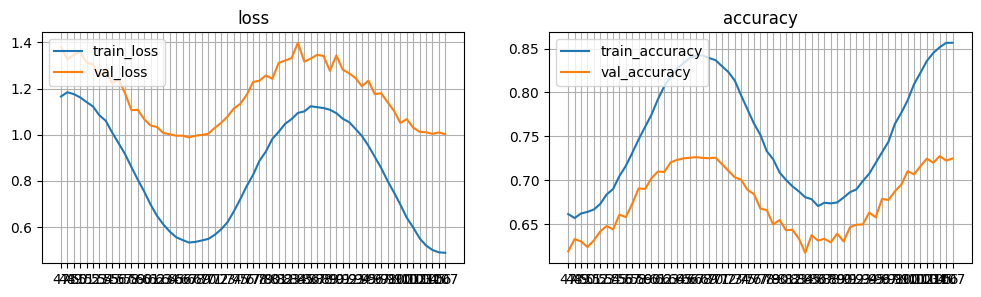

In [141]:
hist = model13.train(train_dl, test_dl, epochs=160, metrics=[utils.metric_accuracy], patience=40)
utils.plot_metrics(hist)

In [147]:
model13.compile(
    optimizer_cls=torch.optim.Adam, 
    optimizer_args=dict(weight_decay=5e-4, lr=0.001 * 0.5 ** 3),
    loss_fn_cls=torch.nn.CrossEntropyLoss, 
    scheduler_cls=torch.optim.lr_scheduler.CosineAnnealingLR, 
    scheduler_args=dict(T_max=40)
)

{'model_name': 'resnet-18-transfer-13',
 'description': 'CIFAR-100: Clone of 12 for further processing',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.adam.Adam'>,
 'optimizer_args': {'weight_decay': 0.0005, 'lr': 0.000125},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'torch.optim.lr_scheduler.CosineAnnealingLR'>,
 'scheduler_args': {'T_max': 40},
 'epoch': 67,
 'step': 52394,
 'metrics': {'train_loss': 0.5329930682754517,
             'train_accuracy': 0.84198,
             'val_loss': 0.9884661501884461,
             'val_accuracy': 0.7263}}

Initial val_loss: 0.9885


100%|██████████| 157/157 [00:02<00:00, 54.30it/s]


Epoch 1/40: train_loss=0.5902, train_accuracy=0.8232, val_loss=1.0267, val_accuracy=0.7159


100%|██████████| 157/157 [00:02<00:00, 54.91it/s]


Epoch 2/40: train_loss=0.5858, train_accuracy=0.8247, val_loss=1.0435, val_accuracy=0.7143


100%|██████████| 157/157 [00:02<00:00, 54.55it/s]


Epoch 3/40: train_loss=0.5796, train_accuracy=0.8255, val_loss=1.0227, val_accuracy=0.7205


100%|██████████| 157/157 [00:02<00:00, 53.93it/s]


Epoch 4/40: train_loss=0.5727, train_accuracy=0.8286, val_loss=1.0407, val_accuracy=0.7169


100%|██████████| 157/157 [00:02<00:00, 54.15it/s]


Epoch 5/40: train_loss=0.5625, train_accuracy=0.8314, val_loss=1.0396, val_accuracy=0.7180


100%|██████████| 157/157 [00:02<00:00, 54.45it/s]


Epoch 6/40: train_loss=0.5472, train_accuracy=0.8354, val_loss=1.0496, val_accuracy=0.7114


100%|██████████| 157/157 [00:02<00:00, 54.46it/s]


Epoch 7/40: train_loss=0.5410, train_accuracy=0.8360, val_loss=1.0493, val_accuracy=0.7157


100%|██████████| 157/157 [00:02<00:00, 52.95it/s]


Epoch 8/40: train_loss=0.5375, train_accuracy=0.8370, val_loss=1.0589, val_accuracy=0.7145


100%|██████████| 157/157 [00:02<00:00, 54.72it/s]


Epoch 9/40: train_loss=0.5315, train_accuracy=0.8390, val_loss=1.0655, val_accuracy=0.7164


100%|██████████| 157/157 [00:02<00:00, 54.56it/s]


Epoch 10/40: train_loss=0.5175, train_accuracy=0.8438, val_loss=1.0509, val_accuracy=0.7174


100%|██████████| 157/157 [00:02<00:00, 54.19it/s]


Epoch 11/40: train_loss=0.5095, train_accuracy=0.8465, val_loss=1.0661, val_accuracy=0.7154


100%|██████████| 157/157 [00:02<00:00, 54.15it/s]


Epoch 12/40: train_loss=0.5012, train_accuracy=0.8479, val_loss=1.0687, val_accuracy=0.7189


100%|██████████| 157/157 [00:02<00:00, 54.92it/s]


Epoch 13/40: train_loss=0.4924, train_accuracy=0.8524, val_loss=1.0760, val_accuracy=0.7136


100%|██████████| 157/157 [00:02<00:00, 54.89it/s]


Epoch 14/40: train_loss=0.4857, train_accuracy=0.8541, val_loss=1.0733, val_accuracy=0.7160


100%|██████████| 157/157 [00:02<00:00, 54.58it/s]


Epoch 15/40: train_loss=0.4815, train_accuracy=0.8557, val_loss=1.0656, val_accuracy=0.7185


100%|██████████| 157/157 [00:02<00:00, 55.07it/s]


Epoch 16/40: train_loss=0.4675, train_accuracy=0.8573, val_loss=1.0625, val_accuracy=0.7221


100%|██████████| 157/157 [00:02<00:00, 54.66it/s]


Epoch 17/40: train_loss=0.4587, train_accuracy=0.8632, val_loss=1.0711, val_accuracy=0.7188


100%|██████████| 157/157 [00:02<00:00, 53.75it/s]


Epoch 18/40: train_loss=0.4522, train_accuracy=0.8647, val_loss=1.0671, val_accuracy=0.7187


100%|██████████| 157/157 [00:02<00:00, 54.32it/s]


Epoch 19/40: train_loss=0.4435, train_accuracy=0.8664, val_loss=1.0763, val_accuracy=0.7172


100%|██████████| 157/157 [00:02<00:00, 54.82it/s]


Epoch 20/40: train_loss=0.4335, train_accuracy=0.8697, val_loss=1.0695, val_accuracy=0.7188


100%|██████████| 157/157 [00:02<00:00, 54.67it/s]


Epoch 21/40: train_loss=0.4314, train_accuracy=0.8710, val_loss=1.0701, val_accuracy=0.7180


100%|██████████| 157/157 [00:02<00:00, 54.59it/s]


Epoch 22/40: train_loss=0.4203, train_accuracy=0.8736, val_loss=1.0719, val_accuracy=0.7195


100%|██████████| 157/157 [00:02<00:00, 55.19it/s]


Epoch 23/40: train_loss=0.4177, train_accuracy=0.8734, val_loss=1.0720, val_accuracy=0.7192


100%|██████████| 157/157 [00:02<00:00, 54.91it/s]


Epoch 24/40: train_loss=0.4071, train_accuracy=0.8789, val_loss=1.0697, val_accuracy=0.7196


100%|██████████| 157/157 [00:02<00:00, 53.58it/s]


Epoch 25/40: train_loss=0.3958, train_accuracy=0.8825, val_loss=1.0722, val_accuracy=0.7206


100%|██████████| 157/157 [00:02<00:00, 54.73it/s]


Epoch 26/40: train_loss=0.3907, train_accuracy=0.8834, val_loss=1.0778, val_accuracy=0.7217


100%|██████████| 157/157 [00:02<00:00, 54.18it/s]


Epoch 27/40: train_loss=0.3844, train_accuracy=0.8861, val_loss=1.0777, val_accuracy=0.7197


100%|██████████| 157/157 [00:02<00:00, 54.66it/s]


Epoch 28/40: train_loss=0.3850, train_accuracy=0.8857, val_loss=1.0821, val_accuracy=0.7224


100%|██████████| 157/157 [00:02<00:00, 54.70it/s]


Epoch 29/40: train_loss=0.3766, train_accuracy=0.8899, val_loss=1.0739, val_accuracy=0.7233


100%|██████████| 157/157 [00:02<00:00, 54.42it/s]


Epoch 30/40: train_loss=0.3681, train_accuracy=0.8907, val_loss=1.0863, val_accuracy=0.7198


100%|██████████| 157/157 [00:02<00:00, 54.73it/s]


Epoch 31/40: train_loss=0.3649, train_accuracy=0.8912, val_loss=1.0817, val_accuracy=0.7213


100%|██████████| 157/157 [00:02<00:00, 53.68it/s]


Epoch 32/40: train_loss=0.3618, train_accuracy=0.8928, val_loss=1.0749, val_accuracy=0.7228


100%|██████████| 157/157 [00:02<00:00, 55.06it/s]


Epoch 33/40: train_loss=0.3593, train_accuracy=0.8948, val_loss=1.0748, val_accuracy=0.7222


100%|██████████| 157/157 [00:02<00:00, 54.69it/s]


Epoch 34/40: train_loss=0.3538, train_accuracy=0.8970, val_loss=1.0775, val_accuracy=0.7198


100%|██████████| 157/157 [00:02<00:00, 54.51it/s]


Epoch 35/40: train_loss=0.3510, train_accuracy=0.8974, val_loss=1.0751, val_accuracy=0.7227


100%|██████████| 157/157 [00:02<00:00, 54.47it/s]


Epoch 36/40: train_loss=0.3523, train_accuracy=0.8971, val_loss=1.0757, val_accuracy=0.7227


100%|██████████| 157/157 [00:02<00:00, 54.24it/s]


Epoch 37/40: train_loss=0.3493, train_accuracy=0.8981, val_loss=1.0729, val_accuracy=0.7254


100%|██████████| 157/157 [00:02<00:00, 54.36it/s]


Epoch 38/40: train_loss=0.3542, train_accuracy=0.8951, val_loss=1.0757, val_accuracy=0.7241


100%|██████████| 157/157 [00:02<00:00, 54.35it/s]


Epoch 39/40: train_loss=0.3444, train_accuracy=0.8994, val_loss=1.0786, val_accuracy=0.7222


100%|██████████| 157/157 [00:02<00:00, 54.55it/s]


Epoch 40/40: train_loss=0.3494, train_accuracy=0.8984, val_loss=1.0689, val_accuracy=0.7224
Loaded model resnet-18-transfer-13 from checkpoint. epoch=67, step=52394. train_loss=0.5330, train_accuracy=0.8420, val_loss=0.9885, val_accuracy=0.7263


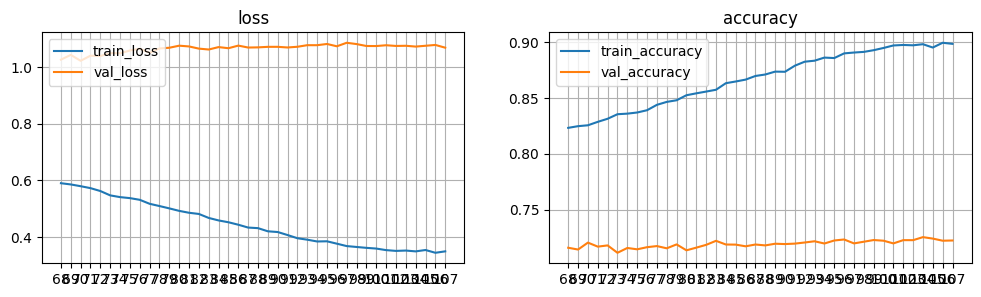

In [148]:
hist = model13.train(train_dl, test_dl, epochs=40, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

In [149]:
model13.compile(
    optimizer_cls=torch.optim.Adam, 
    optimizer_args=dict(weight_decay=5e-4, lr=0.001 * 0.5 ** 4),
    loss_fn_cls=torch.nn.CrossEntropyLoss, 
    scheduler_cls=torch.optim.lr_scheduler.CosineAnnealingLR, 
    scheduler_args=dict(T_max=40)
)

{'model_name': 'resnet-18-transfer-13',
 'description': 'CIFAR-100: Clone of 12 for further processing',
 'persisted': True,
 'compiled': True,
 'optimizer_cls': <class 'torch.optim.adam.Adam'>,
 'optimizer_args': {'weight_decay': 0.0005, 'lr': 6.25e-05},
 'loss_fn_cls': <class 'torch.nn.modules.loss.CrossEntropyLoss'>,
 'loss_fn_args': {},
 'scheduler_cls': <class 'torch.optim.lr_scheduler.CosineAnnealingLR'>,
 'scheduler_args': {'T_max': 40},
 'epoch': 67,
 'step': 52394,
 'metrics': {'train_loss': 0.5329930682754517,
             'train_accuracy': 0.84198,
             'val_loss': 0.9884661501884461,
             'val_accuracy': 0.7263}}

In [150]:
hist = model13.train(train_dl, test_dl, epochs=40, metrics=[utils.metric_accuracy])
utils.plot_metrics(hist)

Initial val_loss: 0.9885


100%|██████████| 157/157 [00:02<00:00, 54.62it/s]


Epoch 1/40: train_loss=0.5574, train_accuracy=0.8328, val_loss=1.0190, val_accuracy=0.7248


100%|██████████| 157/157 [00:02<00:00, 54.75it/s]


Epoch 2/40: train_loss=0.5546, train_accuracy=0.8337, val_loss=1.0138, val_accuracy=0.7221


 16%|█▌        | 126/782 [00:06<00:32, 20.28it/s]